<a href="https://colab.research.google.com/github/Aishaamalik/Climate-Change-Prediction/blob/main/PROJECT_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CLIMATE CHANGE DATA
----


# 1: Exploration

## 1: IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2: FUNCTION TO LOAD & EXPLORE THE DATASET

In [10]:
def load_and_explore_data(file_path='climate_change_dataset.csv'):
    """Load and explore the climate change dataset"""

    print("="*60)
    print("CLIMATE CHANGE DATA EXPLORATION")
    print("="*60)

    print("\n1. Loading dataset...")
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded successfully with shape: {df.shape}")

    print(f"\n2. Dataset Overview:")
    print(f"   - Rows: {len(df)}")
    print(f"   - Columns: {len(df.columns)}")
    print(f"   - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print(f"\n3. Column Information:")
    print(df.info())

    print(f"\n4. First 5 rows:")
    print(df.head())

    print(f"\n5. Statistical Summary:")
    print(df.describe())

    print(f"\n6. Missing Values:")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("✓ No missing values found!")
    else:
        print(missing_values[missing_values > 0])

    print(f"\n7. Unique values per column:")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"   {col}: {unique_count} unique values")

        if df[col].dtype == 'object' and unique_count <= 20:
            print(f"      Values: {list(df[col].unique())}")

    return df
df = load_and_explore_data()

CLIMATE CHANGE DATA EXPLORATION

1. Loading dataset...
✓ Dataset loaded successfully with shape: (1000, 10)

2. Dataset Overview:
   - Rows: 1000
   - Columns: 10
   - Memory usage: 0.13 MB

3. Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non

## 3: Analyze Countries and Time Period

In [11]:
def analyze_country_year(df):
    print(f"\n8. Countries in dataset:")
    country_counts = df['Country'].value_counts()
    print(f"   Total countries: {len(country_counts)}")
    print(f"   Records per country:")
    print(country_counts)

    print(f"\n9. Time period analysis:")
    print(f"   Year range: {df['Year'].min()} - {df['Year'].max()}")
    print(f"   Total years covered: {df['Year'].nunique()}")
    year_counts = df['Year'].value_counts().sort_index()
    print(f"   Records per year range:")
    print(f"   Min records in a year: {year_counts.min()}")
    print(f"   Max records in a year: {year_counts.max()}")
    print(f"   Average records per year: {year_counts.mean():.1f}")
analyze_country_year(df)


8. Countries in dataset:
   Total countries: 15
   Records per country:
Country
Indonesia       75
Russia          74
USA             73
South Africa    73
India           70
China           67
Argentina       67
Canada          67
Brazil          67
France          66
UK              65
Japan           63
Germany         61
Australia       57
Mexico          55
Name: count, dtype: int64

9. Time period analysis:
   Year range: 2000 - 2023
   Total years covered: 24
   Records per year range:
   Min records in a year: 30
   Max records in a year: 53
   Average records per year: 41.7


## 4: Climate Statistics Summary

In [13]:
def summarize_climate_stats(df):
    print(f"\n10. Key Climate Statistics:")

    print(f"    Temperature:")
    print(f"      - Average: {df['Avg Temperature (°C)'].mean():.2f}°C")
    print(f"      - Range: {df['Avg Temperature (°C)'].min():.2f}°C to {df['Avg Temperature (°C)'].max():.2f}°C")
    print(f"      - Standard deviation: {df['Avg Temperature (°C)'].std():.2f}°C")

    print(f"    CO2 Emissions:")
    print(f"      - Average: {df['CO2 Emissions (Tons/Capita)'].mean():.2f} tons/capita")
    print(f"      - Range: {df['CO2 Emissions (Tons/Capita)'].min():.2f} to {df['CO2 Emissions (Tons/Capita)'].max():.2f} tons/capita")

    print(f"    Renewable Energy:")
    print(f"      - Average: {df['Renewable Energy (%)'].mean():.2f}%")
    print(f"      - Range: {df['Renewable Energy (%)'].min():.2f}% to {df['Renewable Energy (%)'].max():.2f}%")

    print(f"    Forest Area:")
    print(f"      - Average: {df['Forest Area (%)'].mean():.2f}%")
    print(f"      - Range: {df['Forest Area (%)'].min():.2f}% to {df['Forest Area (%)'].max():.2f}%")
summarize_climate_stats(df)



10. Key Climate Statistics:
    Temperature:
      - Average: 19.88°C
      - Range: 5.00°C to 34.90°C
      - Standard deviation: 8.54°C
    CO2 Emissions:
      - Average: 10.43 tons/capita
      - Range: 0.50 to 20.00 tons/capita
    Renewable Energy:
      - Average: 27.30%
      - Range: 5.10% to 50.00%
    Forest Area:
      - Average: 40.57%
      - Range: 10.10% to 70.00%


## 5: Data Quality Checks

In [17]:
def check_data_quality(df):
    print(f"\n11. Data Quality Checks:")

    duplicates = df.duplicated().sum()
    print(f"    Duplicate rows: {duplicates}")

    negative_checks = {
        'CO2 Emissions (Tons/Capita)': (df['CO2 Emissions (Tons/Capita)'] < 0).sum(),
        'Renewable Energy (%)': (df['Renewable Energy (%)'] < 0).sum(),
        'Forest Area (%)': (df['Forest Area (%)'] < 0).sum(),
        'Population': (df['Population'] < 0).sum()
    }

    print(f"    Negative values check:")
    for col, count in negative_checks.items():
        print(f"      {col}: {count} negative values")

    print(f"    Range validation:")
    renewable_over_100 = (df['Renewable Energy (%)'] > 100).sum()
    forest_over_100 = (df['Forest Area (%)'] > 100).sum()
    print(f"      Renewable Energy > 100%: {renewable_over_100}")
    print(f"      Forest Area > 100%: {forest_over_100}")
check_data_quality(df)




11. Data Quality Checks:
    Duplicate rows: 0
    Negative values check:
      CO2 Emissions (Tons/Capita): 0 negative values
      Renewable Energy (%): 0 negative values
      Forest Area (%): 0 negative values
      Population: 0 negative values
    Range validation:
      Renewable Energy > 100%: 0
      Forest Area > 100%: 0


## 6: Correlation Analysis

In [19]:
def correlation_with_temperature(df):
    print(f"\n12. Quick Correlation Analysis:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    temp_correlations = df[numerical_cols].corr()['Avg Temperature (°C)'].sort_values(ascending=False)

    print(f"    Correlations with Temperature:")
    for col, corr in temp_correlations.items():
        if col != 'Avg Temperature (°C)':
            print(f"      {col}: {corr:.3f}")
correlation_with_temperature(df)




12. Quick Correlation Analysis:
    Correlations with Temperature:
      Sea Level Rise (mm): 0.059
      Extreme Weather Events: 0.035
      Year: 0.021
      CO2 Emissions (Tons/Capita): 0.012
      Population: 0.004
      Rainfall (mm): -0.005
      Forest Area (%): -0.017
      Renewable Energy (%): -0.065


## 7: Summary Report

In [20]:
def print_summary(df):
    summary = {
        'total_records': len(df),
        'total_columns': len(df.columns),
        'countries': df['Country'].nunique(),
        'year_range': f"{df['Year'].min()}-{df['Year'].max()}",
        'missing_values': df.isnull().sum().sum(),
        'duplicates': df.duplicated().sum(),
        'avg_temperature': df['Avg Temperature (°C)'].mean(),
        'avg_co2': df['CO2 Emissions (Tons/Capita)'].mean(),
        'avg_renewable': df['Renewable Energy (%)'].mean()
    }

    print(f"\n" + "="*50)
    print("EXPLORATION SUMMARY")
    print("="*50)
    for key, value in summary.items():
        print(f"{key.replace('_', ' ').title()}: {value}")
print_summary(df)


EXPLORATION SUMMARY
Total Records: 1000
Total Columns: 10
Countries: 15
Year Range: 2000-2023
Missing Values: 0
Duplicates: 0
Avg Temperature: 19.8831
Avg Co2: 10.425799999999999
Avg Renewable: 27.3005


## 8: Creating Basic Plots


13. Creating basic exploratory plots...


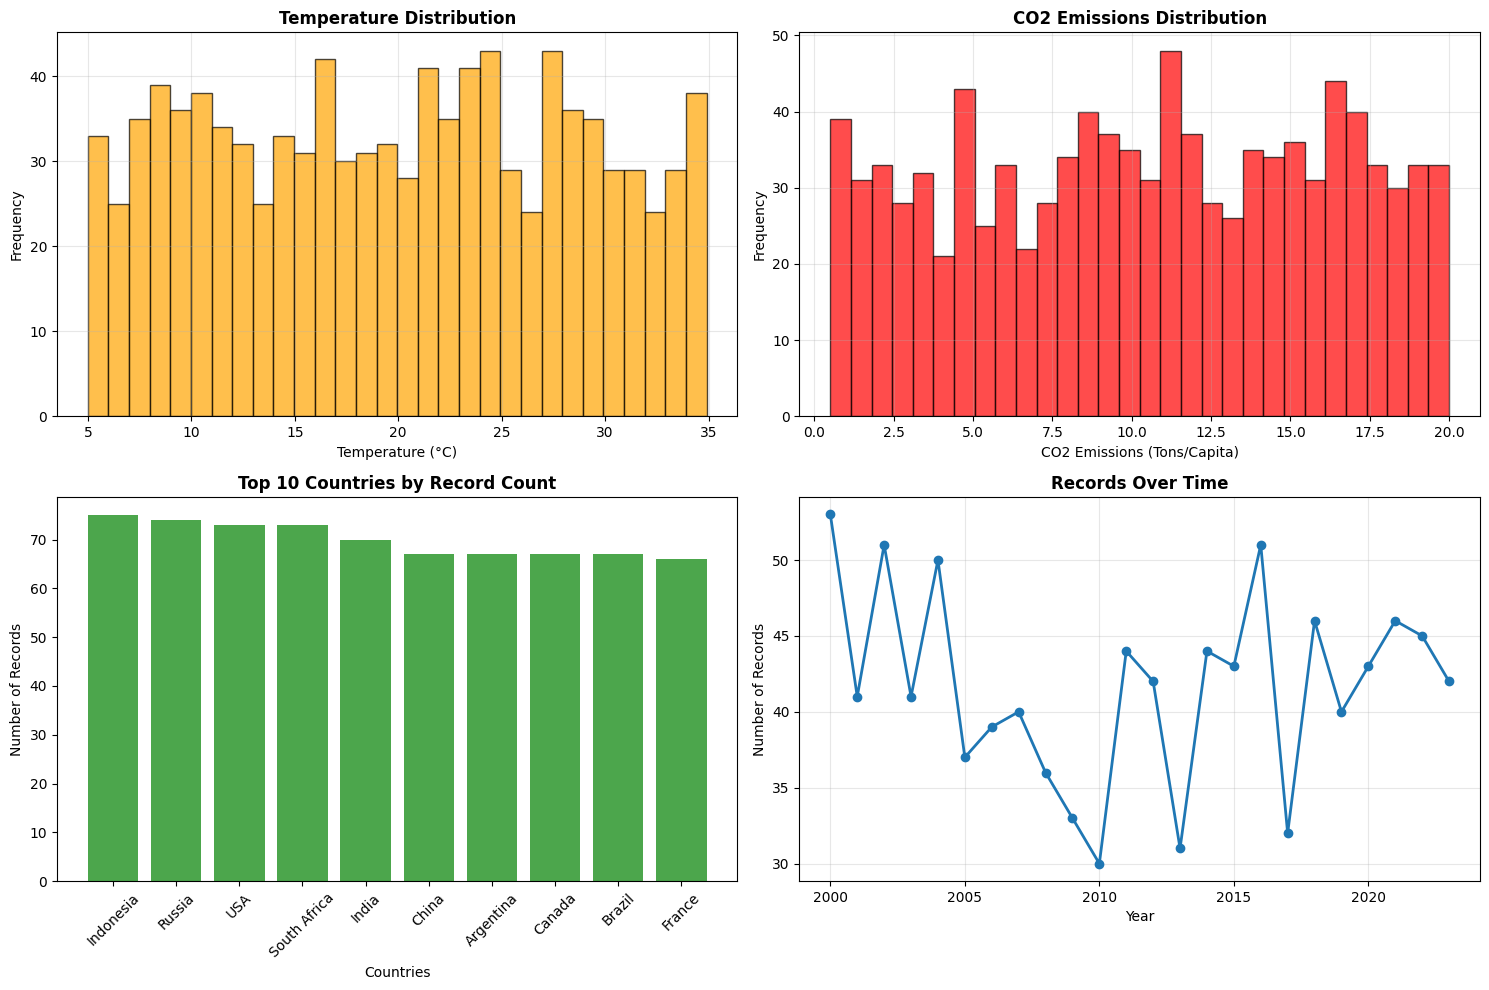

In [22]:
def create_basic_plots(df):
    print(f"\n13. Creating basic exploratory plots...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    axes[0, 0].hist(df['Avg Temperature (°C)'], bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 0].set_title('Temperature Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Temperature (°C)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].hist(df['CO2 Emissions (Tons/Capita)'], bins=30, alpha=0.7, color='red', edgecolor='black')
    axes[0, 1].set_title('CO2 Emissions Distribution', fontweight='bold')
    axes[0, 1].set_xlabel('CO2 Emissions (Tons/Capita)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)

    top_countries = df['Country'].value_counts().head(10)
    axes[1, 0].bar(range(len(top_countries)), top_countries.values, color='green', alpha=0.7)
    axes[1, 0].set_title('Top 10 Countries by Record Count', fontweight='bold')
    axes[1, 0].set_xlabel('Countries')
    axes[1, 0].set_ylabel('Number of Records')
    axes[1, 0].set_xticks(range(len(top_countries)))
    axes[1, 0].set_xticklabels(top_countries.index, rotation=45)

    year_counts = df['Year'].value_counts().sort_index()
    axes[1, 1].plot(year_counts.index, year_counts.values, marker='o', linewidth=2)
    axes[1, 1].set_title('Records Over Time', fontweight='bold')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Number of Records')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
create_basic_plots(df)



----

# 2: Data Cleaning and PreProcessing

### 1: IMPORT LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')


### 2: LOAD DATA

In [26]:
def load_data(file_path='climate_change_dataset.csv'):
    """Load the dataset for cleaning"""
    print("DATA CLEANING AND PREPROCESSING")

    print("\n1. Loading dataset...")
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded with shape: {df.shape}")
    return df
df_original = load_data()


DATA CLEANING AND PREPROCESSING

1. Loading dataset...
✓ Dataset loaded with shape: (1000, 10)


### 3: HANDLING MISSING VALUES

In [28]:

def handle_missing_values(df):
    """Handle missing values in the dataset"""
    print("\n2. Checking for missing values...")

    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    if missing_values.sum() == 0:
        print("✓ No missing values found!")
        return df, {}

    print("Missing values found:")
    missing_info = {}
    for col in missing_values[missing_values > 0].index:
        count = missing_values[col]
        percentage = missing_percentage[col]
        print(f"  {col}: {count} ({percentage:.2f}%)")
        missing_info[col] = {'count': count, 'percentage': percentage}

    df_clean = df.copy()
    strategies_applied = {}

    for col in missing_info.keys():
        if missing_info[col]['percentage'] < 5:
            if df[col].dtype in ['int64', 'float64']:
                median_val = df[col].median()
                df_clean[col].fillna(median_val, inplace=True)
                strategies_applied[col] = f"Filled with median: {median_val:.2f}"
            else:
                mode_val = df[col].mode()[0]
                df_clean[col].fillna(mode_val, inplace=True)
                strategies_applied[col] = f"Filled with mode: {mode_val}"
        elif missing_info[col]['percentage'] < 15:
            df_clean[col].fillna(method='ffill', inplace=True)
            df_clean[col].fillna(method='bfill', inplace=True)
            strategies_applied[col] = "Forward/backward fill applied"
        else:
            if df[col].dtype == 'object':
                df_clean[col].fillna('Unknown', inplace=True)
                strategies_applied[col] = "Filled with 'Unknown'"
            else:
                df_clean[col].fillna(df[col].mean(), inplace=True)
                strategies_applied[col] = f"Filled with mean: {df[col].mean():.2f}"

    print("\nStrategies applied:")
    for col, strategy in strategies_applied.items():
        print(f"  {col}: {strategy}")

    return df_clean, strategies_applied
df_clean, missing_strategies = handle_missing_values(df_original)



2. Checking for missing values...
✓ No missing values found!


### 4: HANDLING DUPLICATES

In [29]:
def handle_duplicates(df):
    """Handle duplicate records"""
    print("\n3. Checking for duplicate records...")

    duplicates = df.duplicated()
    duplicate_count = duplicates.sum()

    if duplicate_count == 0:
        print("✓ No duplicate records found!")
        return df, 0

    print(f"Found {duplicate_count} duplicate records")

    df_clean = df.drop_duplicates()

    print(f"✓ Removed {duplicate_count} duplicate records")
    print(f"Dataset shape after removing duplicates: {df_clean.shape}")

    return df_clean, duplicate_count
df_clean, duplicates_removed = handle_duplicates(df_clean)



3. Checking for duplicate records...
✓ No duplicate records found!


### 5: DETECT OUTLINERS

In [30]:
def detect_outliers(df):
    """Detect outliers using multiple methods"""
    print("\n4. Detecting outliers...")

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outliers_info = {}

    for col in numerical_cols:
        if col in ['Year']:
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

        z_scores = np.abs(stats.zscore(df[col]))
        z_outliers = df[z_scores > 3].index

        combined_outliers = list(set(iqr_outliers) | set(z_outliers))

        outliers_info[col] = {
            'count': len(combined_outliers),
            'percentage': (len(combined_outliers) / len(df)) * 100,
            'indices': combined_outliers,
            'bounds': {'lower': lower_bound, 'upper': upper_bound}
        }

        print(f"  {col}: {len(combined_outliers)} outliers ({outliers_info[col]['percentage']:.2f}%)")

    return outliers_info
outliers_info = detect_outliers(df_clean)


4. Detecting outliers...
  Avg Temperature (°C): 0 outliers (0.00%)
  CO2 Emissions (Tons/Capita): 0 outliers (0.00%)
  Sea Level Rise (mm): 0 outliers (0.00%)
  Rainfall (mm): 0 outliers (0.00%)
  Population: 0 outliers (0.00%)
  Renewable Energy (%): 0 outliers (0.00%)
  Extreme Weather Events: 0 outliers (0.00%)
  Forest Area (%): 0 outliers (0.00%)


### 6: HANDLE OUTLIERS

In [31]:

def handle_outliers(df, outliers_details, method='cap'):
    """Handle outliers in the dataset"""
    print(f"\n5. Handling outliers using {method} method...")

    df_clean = df.copy()
    outliers_handled = {}

    for col, details in outliers_details.items():
        if details['count'] == 0:
            continue

        if method == 'cap':
            lower_bound = details['bounds']['lower']
            upper_bound = details['bounds']['upper']

            original_count = len(df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)])

            df_clean[col] = np.clip(df_clean[col], lower_bound, upper_bound)

            outliers_handled[col] = f"Capped {original_count} values to [{lower_bound:.2f}, {upper_bound:.2f}]"

        elif method == 'remove':
            mask = ~df_clean.index.isin(details['indices'])
            df_clean = df_clean[mask]
            outliers_handled[col] = f"Removed {len(details['indices'])} outlier rows"

    print("Outliers handled:")
    for col, action in outliers_handled.items():
        print(f"  {col}: {action}")

    return df_clean, outliers_handled
df_clean, outliers_handled = handle_outliers(df_clean, outliers_info, method='cap')



5. Handling outliers using cap method...
Outliers handled:


###  7: VALIDATE DATA RANGES

In [32]:

def validate_data_ranges(df):
    """Validate data ranges and fix unrealistic values"""
    print("\n6. Validating data ranges...")

    validation_issues = {}
    df_clean = df.copy()

    temp_col = 'Avg Temperature (°C)'
    if temp_col in df.columns:
        extreme_temps = df_clean[(df_clean[temp_col] < -50) | (df_clean[temp_col] > 50)]
        if len(extreme_temps) > 0:
            validation_issues[temp_col] = f"Found {len(extreme_temps)} extreme temperature values"
            print(f"  Warning: {len(extreme_temps)} extreme temperature values found")

    percentage_cols = ['Renewable Energy (%)', 'Forest Area (%)']
    for col in percentage_cols:
        if col in df.columns:
            invalid_percent = df_clean[(df_clean[col] < 0) | (df_clean[col] > 100)]
            if len(invalid_percent) > 0:
                validation_issues[col] = f"Found {len(invalid_percent)} invalid percentage values"
                print(f"  Warning: {len(invalid_percent)} invalid percentage values in {col}")
                df_clean[col] = np.clip(df_clean[col], 0, 100)

    pop_col = 'Population'
    if pop_col in df.columns:
        negative_pop = df_clean[df_clean[pop_col] <= 0]
        if len(negative_pop) > 0:
            validation_issues[pop_col] = f"Found {len(negative_pop)} negative/zero population values"
            print(f"  Warning: {len(negative_pop)} negative/zero population values")

    co2_col = 'CO2 Emissions (Tons/Capita)'
    if co2_col in df.columns:
        negative_co2 = df_clean[df_clean[co2_col] < 0]
        if len(negative_co2) > 0:
            validation_issues[co2_col] = f"Found {len(negative_co2)} negative CO2 values"
            print(f"  Warning: {len(negative_co2)} negative CO2 emission values")
            df_clean.loc[df_clean[co2_col] < 0, co2_col] = 0

    if not validation_issues:
        print("✓ All data ranges are valid!")

    return df_clean, validation_issues
df_clean, validation_issues = validate_data_ranges(df_clean)



6. Validating data ranges...
✓ All data ranges are valid!


### 8: FIX DATA QUALITY ISSSUES

In [33]:

def fix_data_issues(df):
    """Fix specific data quality issues"""
    print("\n7. Fixing data quality issues...")

    df_clean = df.copy()
    fixes_applied = []

    if 'Year' in df.columns:
        if df_clean['Year'].dtype == 'object':
            df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')
            fixes_applied.append("Converted Year column to numeric")

    if 'Country' in df.columns:
        df_clean['Country'] = df_clean['Country'].str.strip()
        original_countries = df_clean['Country'].nunique()

        country_counts_before = len(df_clean['Country'].unique())
        df_clean['Country'] = df_clean['Country'].str.title()
        country_counts_after = len(df_clean['Country'].unique())

        if country_counts_before != country_counts_after:
            fixes_applied.append(f"Standardized country names: {country_counts_before} -> {country_counts_after}")

    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if col == 'Year' or col == 'Population':
            df_clean[col] = df_clean[col].round(0).astype('int64')
        elif 'Temperature' in col:
            df_clean[col] = df_clean[col].round(1)
        elif '%' in col:
            df_clean[col] = df_clean[col].round(1)
        else:
            df_clean[col] = df_clean[col].round(2)

    fixes_applied.append("Rounded numerical values to appropriate decimal places")

    if 'Sea Level Rise (mm)' in df_clean.columns:
        extreme_sea_level = df_clean[df_clean['Sea Level Rise (mm)'] > 10]
        if len(extreme_sea_level) > 0:
            median_sea_level = df_clean['Sea Level Rise (mm)'].median()
            df_clean.loc[df_clean['Sea Level Rise (mm)'] > 10, 'Sea Level Rise (mm)'] = median_sea_level
            fixes_applied.append(f"Fixed {len(extreme_sea_level)} extreme sea level rise values")

    print("Data quality fixes applied:")
    for fix in fixes_applied:
        print(f"  ✓ {fix}")

    return df_clean, fixes_applied
df_clean, fixes_applied = fix_data_issues(df_clean)



7. Fixing data quality issues...
Data quality fixes applied:
  ✓ Rounded numerical values to appropriate decimal places


### 9: CLEANING VISUALIZATION


8. Creating data cleaning visualization plots...


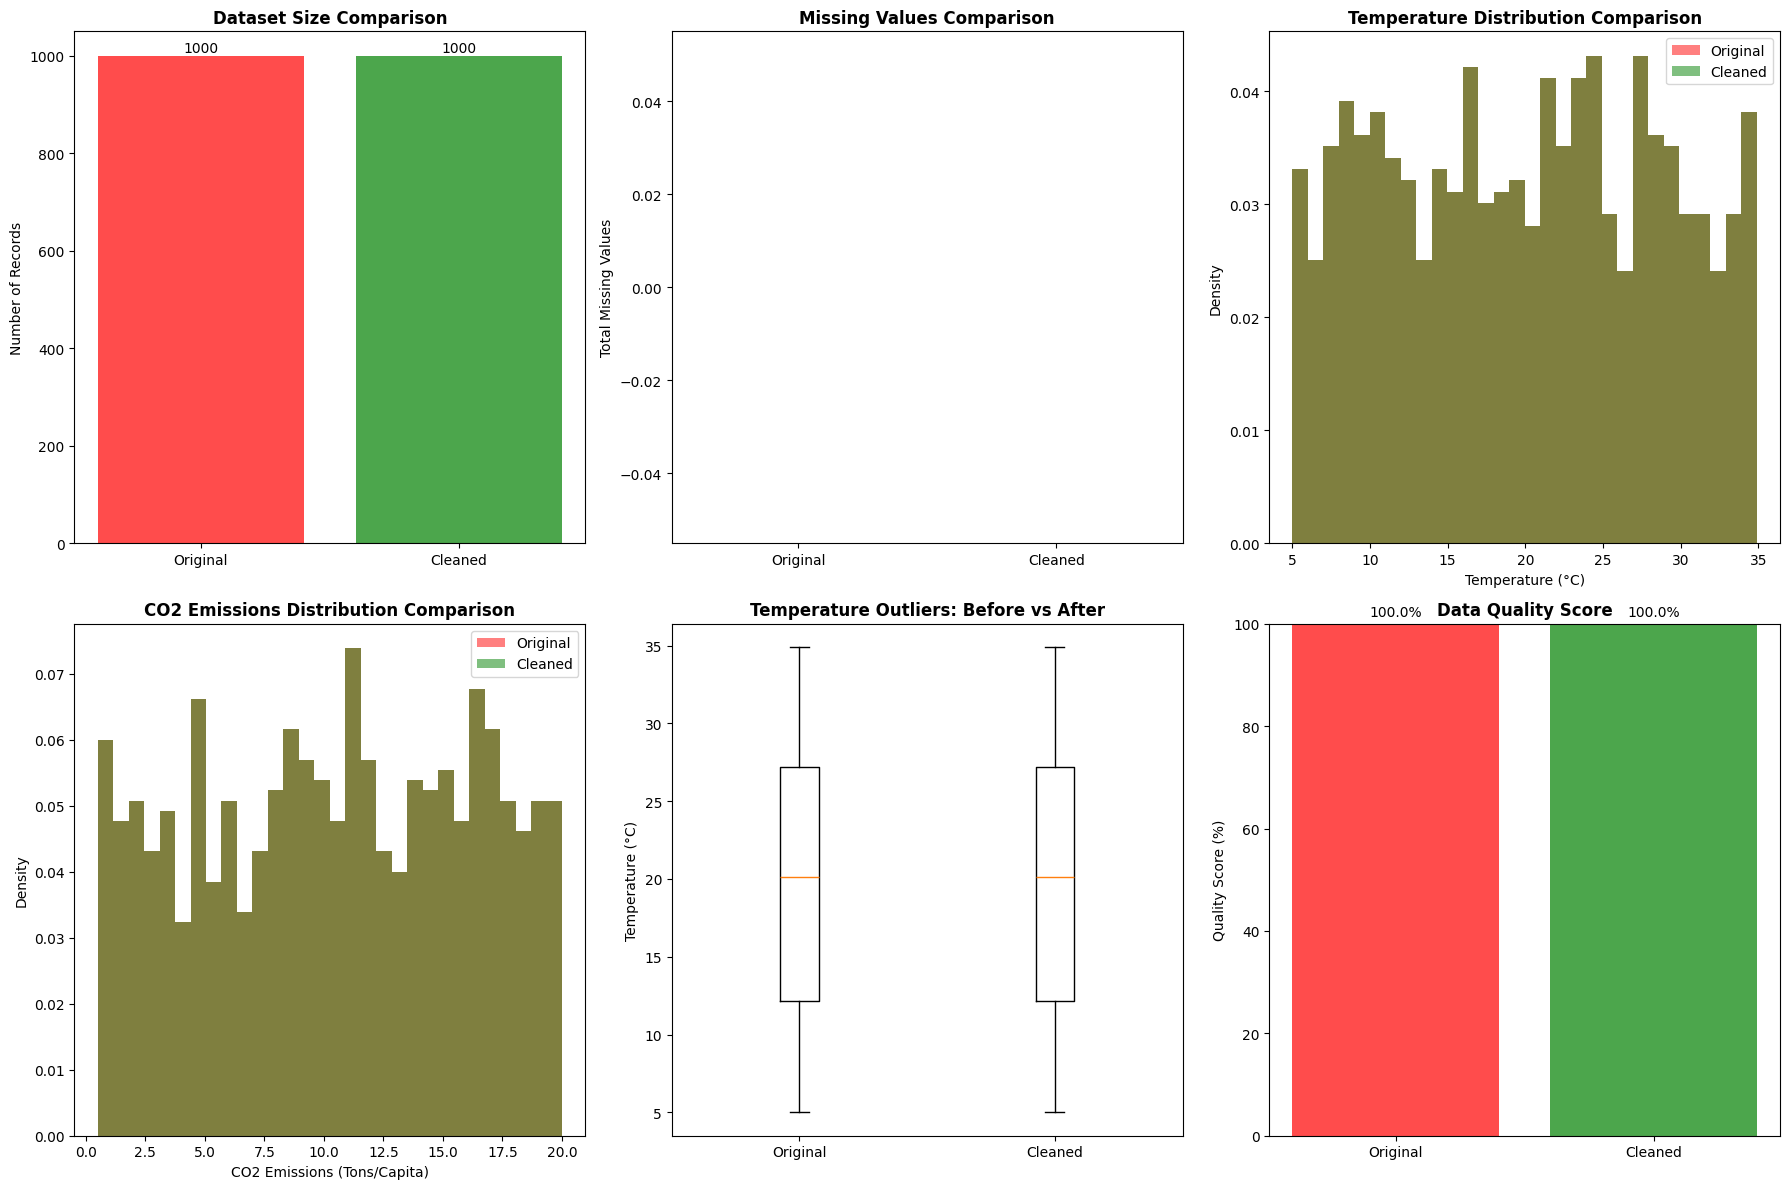

In [36]:

def create_cleaning_plots(df_original, df_clean):
    """Create plots to visualize the cleaning process"""
    print("\n8. Creating data cleaning visualization plots...")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    categories = ['Original', 'Cleaned']
    shapes = [df_original.shape[0], df_clean.shape[0]]
    axes[0, 0].bar(categories, shapes, color=['red', 'green'], alpha=0.7)
    axes[0, 0].set_title('Dataset Size Comparison', fontweight='bold')
    axes[0, 0].set_ylabel('Number of Records')
    for i, v in enumerate(shapes):
        axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')

    missing_original = df_original.isnull().sum().sum()
    missing_clean = df_clean.isnull().sum().sum()
    axes[0, 1].bar(['Original', 'Cleaned'], [missing_original, missing_clean],
                   color=['orange', 'blue'], alpha=0.7)
    axes[0, 1].set_title('Missing Values Comparison', fontweight='bold')
    axes[0, 1].set_ylabel('Total Missing Values')

    axes[0, 2].hist(df_original['Avg Temperature (°C)'], bins=30, alpha=0.5,
                    label='Original', color='red', density=True)
    axes[0, 2].hist(df_clean['Avg Temperature (°C)'], bins=30, alpha=0.5,
                    label='Cleaned', color='green', density=True)
    axes[0, 2].set_title('Temperature Distribution Comparison', fontweight='bold')
    axes[0, 2].set_xlabel('Temperature (°C)')
    axes[0, 2].set_ylabel('Density')
    axes[0, 2].legend()

    axes[1, 0].hist(df_original['CO2 Emissions (Tons/Capita)'], bins=30, alpha=0.5,
                    label='Original', color='red', density=True)
    axes[1, 0].hist(df_clean['CO2 Emissions (Tons/Capita)'], bins=30, alpha=0.5,
                    label='Cleaned', color='green', density=True)
    axes[1, 0].set_title('CO2 Emissions Distribution Comparison', fontweight='bold')
    axes[1, 0].set_xlabel('CO2 Emissions (Tons/Capita)')
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].legend()

    axes[1, 1].boxplot([df_original['Avg Temperature (°C)'], df_clean['Avg Temperature (°C)']],
                       labels=['Original', 'Cleaned'])
    axes[1, 1].set_title('Temperature Outliers: Before vs After', fontweight='bold')
    axes[1, 1].set_ylabel('Temperature (°C)')

    original_score = calculate_data_quality_score(df_original)
    clean_score = calculate_data_quality_score(df_clean)

    axes[1, 2].bar(['Original', 'Cleaned'], [original_score, clean_score],
                   color=['red', 'green'], alpha=0.7)
    axes[1, 2].set_title('Data Quality Score', fontweight='bold')
    axes[1, 2].set_ylabel('Quality Score (%)')
    axes[1, 2].set_ylim(0, 100)
    for i, v in enumerate([original_score, clean_score]):
        axes[1, 2].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

def calculate_data_quality_score(df):
    """Calculate a simple data quality score"""
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()

    completeness_score = ((total_cells - missing_cells) / total_cells) * 100

    return completeness_score

create_cleaning_plots(df_original, df_clean)



### 10: QUALITY SCORING

In [39]:

def generate_cleaning_report(df_original, df_clean, fixes_applied):
    """Generate a comprehensive cleaning report"""
    print("DATA CLEANING REPORT")

    print(f"\nOriginal dataset shape: {df_original.shape}")
    print(f"Cleaned dataset shape: {df_clean.shape}")
    print(f"Records removed: {df_original.shape[0] - df_clean.shape[0]}")

    print(f"\nMissing values:")
    print(f"  Original: {df_original.isnull().sum().sum()}")
    print(f"  Cleaned: {df_clean.isnull().sum().sum()}")

    print(f"\nDuplicate records:")
    print(f"  Original: {df_original.duplicated().sum()}")
    print(f"  Cleaned: {df_clean.duplicated().sum()}")

    print(f"\nData quality score:")
    original_score = calculate_data_quality_score(df_original)
    clean_score = calculate_data_quality_score(df_clean)
    print(f"  Original: {original_score:.2f}%")
    print(f"  Cleaned: {clean_score:.2f}%")
    print(f"  Improvement: {clean_score - original_score:.2f}%")

    print(f"\nData cleaning actions performed:")
    for fix in fixes_applied:
        print(f"  ✓ {fix}")

    print(f"\nStatistical comparison for key variables:")
    key_vars = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Renewable Energy (%)']

    for var in key_vars:
        if var in df_original.columns and var in df_clean.columns:
            print(f"\n  {var}:")
            print(f"    Original - Mean: {df_original[var].mean():.2f}, Std: {df_original[var].std():.2f}")
            print(f"    Cleaned  - Mean: {df_clean[var].mean():.2f}, Std: {df_clean[var].std():.2f}")

generate_cleaning_report(df_original, df_clean, fixes_applied)



DATA CLEANING REPORT

Original dataset shape: (1000, 10)
Cleaned dataset shape: (1000, 10)
Records removed: 0

Missing values:
  Original: 0
  Cleaned: 0

Duplicate records:
  Original: 0
  Cleaned: 0

Data quality score:
  Original: 100.00%
  Cleaned: 100.00%
  Improvement: 0.00%

Data cleaning actions performed:
  ✓ Rounded numerical values to appropriate decimal places

Statistical comparison for key variables:

  Avg Temperature (°C):
    Original - Mean: 19.88, Std: 8.54
    Cleaned  - Mean: 19.88, Std: 8.54

  CO2 Emissions (Tons/Capita):
    Original - Mean: 10.43, Std: 5.61
    Cleaned  - Mean: 10.43, Std: 5.61

  Renewable Energy (%):
    Original - Mean: 27.30, Std: 12.97
    Cleaned  - Mean: 27.30, Std: 12.97


In [40]:
cleaned_file_path = '/content/cleaned_climate_change_dataset.csv'
df.to_csv(cleaned_file_path, index=False)
from google.colab import files
files.download(cleaned_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

# 3: Feature Engineering

## 1: Importing Liberaries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import warnings

warnings.filterwarnings('ignore')

## 2; Loading clean dataset

In [45]:

def load_cleaned_data(file_path='climate_change_dataset.csv'):
    """Load the cleaned dataset"""
    print("FEATURE ENGINEERING")

    print("\n1. Loading cleaned dataset...")
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded with shape: {df.shape}")
    return df
df_original = load_cleaned_data()


FEATURE ENGINEERING

1. Loading cleaned dataset...
✓ Dataset loaded with shape: (1000, 10)


## 3: Time Feature

In [46]:
def create_time_features(df):
    """Create time-based features"""
    print("\n2. Creating time-based features...")

    df_features = df.copy()

    df_features['Decade'] = (df_features['Year'] // 10) * 10

    min_year = df_features['Year'].min()
    df_features['Years_Since_Start'] = df_features['Year'] - min_year

    def categorize_time_period(year):
        if year < 2005:
            return 'Early_2000s'
        elif year < 2010:
            return 'Mid_2000s'
        elif year < 2015:
            return 'Early_2010s'
        elif year < 2020:
            return 'Late_2010s'
        else:
            return 'Early_2020s'

    df_features['Time_Period'] = df_features['Year'].apply(categorize_time_period)

    print(f"   ✓ Added time features: Decade, Years_Since_Start, Time_Period")
    print(f"   ✓ Decades covered: {sorted(df_features['Decade'].unique())}")

    return df_features
df = create_time_features(df_original)



2. Creating time-based features...
   ✓ Added time features: Decade, Years_Since_Start, Time_Period
   ✓ Decades covered: [np.int64(2000), np.int64(2010), np.int64(2020)]


## 4: Creating categorical features

In [47]:

def create_categorical_features(df):
    """Create categorical features from continuous variables"""
    print("\n3. Creating categorical features...")

    df_features = df.copy()

    def categorize_temperature(temp):
        if temp < 10:
            return 'Cold'
        elif temp < 20:
            return 'Moderate'
        elif temp < 30:
            return 'Warm'
        else:
            return 'Hot'

    df_features['Temperature_Category'] = df_features['Avg Temperature (°C)'].apply(categorize_temperature)

    co2_quantiles = df_features['CO2 Emissions (Tons/Capita)'].quantile([0.33, 0.67])
    def categorize_co2(co2):
        if co2 <= co2_quantiles.iloc[0]:
            return 'Low_CO2'
        elif co2 <= co2_quantiles.iloc[1]:
            return 'Medium_CO2'
        else:
            return 'High_CO2'

    df_features['CO2_Level'] = df_features['CO2 Emissions (Tons/Capita)'].apply(categorize_co2)

    renewable_quantiles = df_features['Renewable Energy (%)'].quantile([0.33, 0.67])
    def categorize_renewable(renewable):
        if renewable <= renewable_quantiles.iloc[0]:
            return 'Low_Renewable'
        elif renewable <= renewable_quantiles.iloc[1]:
            return 'Medium_Renewable'
        else:
            return 'High_Renewable'

    df_features['Renewable_Level'] = df_features['Renewable Energy (%)'].apply(categorize_renewable)

    pop_quantiles = df_features['Population'].quantile([0.25, 0.5, 0.75])
    def categorize_population(pop):
        if pop <= pop_quantiles.iloc[0]:
            return 'Small'
        elif pop <= pop_quantiles.iloc[1]:
            return 'Medium'
        elif pop <= pop_quantiles.iloc[2]:
            return 'Large'
        else:
            return 'Very_Large'

    df_features['Population_Size'] = df_features['Population'].apply(categorize_population)

    print(f"   ✓ Added categorical features: Temperature_Category, CO2_Level, Renewable_Level, Population_Size")

    return df_features
df = create_categorical_features(df)



3. Creating categorical features...
   ✓ Added categorical features: Temperature_Category, CO2_Level, Renewable_Level, Population_Size


## 5: Creating Deriived Features

In [48]:

def create_derived_features(df):
    """Create derived mathematical features"""
    print("\n4. Creating derived features...")

    df_features = df.copy()

    df_features['CO2_per_Population'] = df_features['CO2 Emissions (Tons/Capita)'] * df_features['Population'] / 1e6

    df_features['Renewable_CO2_Ratio'] = df_features['Renewable Energy (%)'] / (df_features['CO2 Emissions (Tons/Capita)'] + 1)

    df_features['Forest_per_Population'] = df_features['Forest Area (%)'] * 1000000 / df_features['Population']

    df_features['Extreme_Weather_Intensity'] = df_features['Extreme Weather Events'] / (df_features['Population'] / 1e6)

    df_features['Environmental_Pressure'] = (
        df_features['CO2 Emissions (Tons/Capita)'] * df_features['Population'] / 1e6 -
        df_features['Renewable Energy (%)'] -
        df_features['Forest Area (%)']
    )

    df_features['Sea_Level_Impact'] = df_features['Sea Level Rise (mm)'] * df_features['Population'] / 1e6

    df_features['Rainfall_per_Forest'] = df_features['Rainfall (mm)'] / (df_features['Forest Area (%)'] + 1)

    base_year = df_features['Year'].min()
    df_features['Temp_Year_Interaction'] = df_features['Avg Temperature (°C)'] * (df_features['Year'] - base_year)

    df_features['Sustainability_Index'] = (
        df_features['Renewable Energy (%)'] +
        df_features['Forest Area (%)'] -
        df_features['CO2 Emissions (Tons/Capita)'] * 5
    )

    df_features['Climate_Vulnerability'] = (
        df_features['Avg Temperature (°C)'] * 0.3 +
        df_features['Sea Level Rise (mm)'] * 2 +
        df_features['Extreme Weather Events'] * 1.5 -
        df_features['Forest Area (%)'] * 0.1
    )

    df_features['Eco_Economic_Balance'] = (
        df_features['Renewable Energy (%)'] * df_features['Population'] / 1e6 /
        (df_features['CO2 Emissions (Tons/Capita)'] + 1)
    )

    df_features = df_features.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df_features.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_features[col].isna().any():
            df_features[col].fillna(df_features[col].median(), inplace=True)

    print(f"   ✓ Added {12} derived features")
    print(f"   ✓ Key derived features: Environmental_Pressure, Sustainability_Index, Climate_Vulnerability")

    return df_features
df = create_derived_features(df)



4. Creating derived features...
   ✓ Added 12 derived features
   ✓ Key derived features: Environmental_Pressure, Sustainability_Index, Climate_Vulnerability


## 6: Creating Interaction Freatures

In [49]:

def create_interaction_features(df):
    """Create interaction features between important variables"""
    print("\n5. Creating interaction features...")

    df_features = df.copy()

    df_features['Temp_CO2_Interaction'] = df_features['Avg Temperature (°C)'] * df_features['CO2 Emissions (Tons/Capita)']
    df_features['Temp_Renewable_Interaction'] = df_features['Avg Temperature (°C)'] * df_features['Renewable Energy (%)']
    df_features['Temp_Forest_Interaction'] = df_features['Avg Temperature (°C)'] * df_features['Forest Area (%)']

    df_features['CO2_Renewable_Interaction'] = df_features['CO2 Emissions (Tons/Capita)'] * df_features['Renewable Energy (%)']
    df_features['CO2_Forest_Interaction'] = df_features['CO2 Emissions (Tons/Capita)'] * df_features['Forest Area (%)']
    df_features['CO2_Population_Interaction'] = df_features['CO2 Emissions (Tons/Capita)'] * np.log(df_features['Population'] + 1)

    df_features['Renewable_Forest_Interaction'] = df_features['Renewable Energy (%)'] * df_features['Forest Area (%)']
    df_features['Weather_SeaLevel_Interaction'] = df_features['Extreme Weather Events'] * df_features['Sea Level Rise (mm)']

    df_features['Population_Forest_Interaction'] = np.log(df_features['Population'] + 1) * df_features['Forest Area (%)']
    df_features['Population_Renewable_Interaction'] = np.log(df_features['Population'] + 1) * df_features['Renewable Energy (%)']

    df_features['Year_Temp_Trend'] = (df_features['Year'] - df_features['Year'].min()) * df_features['Avg Temperature (°C)']
    df_features['Year_CO2_Trend'] = (df_features['Year'] - df_features['Year'].min()) * df_features['CO2 Emissions (Tons/Capita)']

    print(f"   ✓ Added {12} interaction features")
    print(f"   ✓ Key interactions: Temperature-CO2, CO2-Renewable, Population-Environment")

    return df_features
df = create_interaction_features(df)



5. Creating interaction features...
   ✓ Added 12 interaction features
   ✓ Key interactions: Temperature-CO2, CO2-Renewable, Population-Environment


## 7: Creating Ratio Features

In [50]:

def create_ratio_features(df):
    """Create ratio and relative features"""
    print("\n6. Creating ratio features...")

    df_features = df.copy()

    df_features['Forest_Renewable_Ratio'] = df_features['Forest Area (%)'] / (df_features['Renewable Energy (%)'] + 1)
    df_features['CO2_Forest_Ratio'] = df_features['CO2 Emissions (Tons/Capita)'] / (df_features['Forest Area (%)'] + 1)
    df_features['Renewable_CO2_Ratio'] = df_features['Renewable Energy (%)'] / (df_features['CO2 Emissions (Tons/Capita)'] + 1)

    df_features['Temp_Rainfall_Ratio'] = df_features['Avg Temperature (°C)'] / (df_features['Rainfall (mm)'] / 100)
    df_features['Weather_Population_Ratio'] = df_features['Extreme Weather Events'] / (df_features['Population'] / 1e6)
    df_features['SeaLevel_Forest_Ratio'] = df_features['Sea Level Rise (mm)'] / (df_features['Forest Area (%)'] + 1)

    df_features['Environmental_Efficiency'] = (df_features['Renewable Energy (%)'] + df_features['Forest Area (%)']) / (df_features['CO2 Emissions (Tons/Capita)'] + 1)
    df_features['Population_Efficiency'] = df_features['Population'] / ((df_features['CO2 Emissions (Tons/Capita)'] + 1) * 1e6)

    global_temp_avg = df_features['Avg Temperature (°C)'].mean()
    global_co2_avg = df_features['CO2 Emissions (Tons/Capita)'].mean()
    global_renewable_avg = df_features['Renewable Energy (%)'].mean()

    df_features['Temp_vs_Global'] = df_features['Avg Temperature (°C)'] / global_temp_avg
    df_features['CO2_vs_Global'] = df_features['CO2 Emissions (Tons/Capita)'] / global_co2_avg
    df_features['Renewable_vs_Global'] = df_features['Renewable Energy (%)'] / global_renewable_avg

    print(f"   ✓ Added {11} ratio features")
    print(f"   ✓ Key ratios: Environmental_Efficiency, relative to global averages")

    return df_features
df = create_ratio_features(df)



6. Creating ratio features...
   ✓ Added 11 ratio features
   ✓ Key ratios: Environmental_Efficiency, relative to global averages


## 8: Enciding Categorical Variables

In [51]:
def encode_categorical_variables(df):
    """Encode categorical variables"""
    print("\n7. Encoding categorical variables...")

    df_features = df.copy()
    categorical_cols = ['Country', 'Temperature_Category', 'CO2_Level', 'Renewable_Level',
                       'Population_Size', 'Time_Period']

    ordinal_mappings = {
        'Temperature_Category': {'Cold': 0, 'Moderate': 1, 'Warm': 2, 'Hot': 3},
        'CO2_Level': {'Low_CO2': 0, 'Medium_CO2': 1, 'High_CO2': 2},
        'Renewable_Level': {'Low_Renewable': 0, 'Medium_Renewable': 1, 'High_Renewable': 2},
        'Population_Size': {'Small': 0, 'Medium': 1, 'Large': 2, 'Very_Large': 3},
        'Time_Period': {'Early_2000s': 0, 'Mid_2000s': 1, 'Early_2010s': 2, 'Late_2010s': 3, 'Early_2020s': 4}
    }

    for col, mapping in ordinal_mappings.items():
        if col in df_features.columns:
            df_features[f'{col}_Encoded'] = df_features[col].map(mapping)

    if 'Country' in df_features.columns:
        top_countries = df_features['Country'].value_counts().head(10).index
        for country in top_countries:
            df_features[f'Country_{country}'] = (df_features['Country'] == country).astype(int)

    print(f"   ✓ Encoded categorical variables")
    print(f"   ✓ Added one-hot encoding for top 10 countries")

    return df_features
df = encode_categorical_variables(df)



7. Encoding categorical variables...
   ✓ Encoded categorical variables
   ✓ Added one-hot encoding for top 10 countries


## 9: Creating Aggregated Features

In [52]:

def create_aggregated_features(df):
    """Create aggregated features by country and year"""
    print("\n8. Creating aggregated features...")

    df_features = df.copy()

    def calculate_trend(series):
        """Calculate linear trend slope"""
        if len(series) < 2:
            return 0
        x = np.arange(len(series))
        try:
            slope = np.polyfit(x, series, 1)[0]
            return slope
        except:
            return 0

    country_stats = df_features.groupby('Country').agg({
        'Avg Temperature (°C)': ['mean', 'std', 'min', 'max'],
        'CO2 Emissions (Tons/Capita)': ['mean', 'std'],
        'Renewable Energy (%)': ['mean', 'std'],
        'Forest Area (%)': ['mean', 'std'],
        'Population': ['mean', 'max'],
        'Extreme Weather Events': ['mean', 'sum']
    }).round(3)

    co2_trends = df_features.groupby('Country')['CO2 Emissions (Tons/Capita)'].apply(calculate_trend)
    renewable_trends = df_features.groupby('Country')['Renewable Energy (%)'].apply(calculate_trend)

    country_stats.columns = ['_'.join(col).strip() for col in country_stats.columns]
    country_stats = country_stats.add_prefix('Country_')

    country_stats['Country_CO2_Emissions_(Tons/Capita)_trend'] = co2_trends
    country_stats['Country_Renewable_Energy_(%)_trend'] = renewable_trends

    df_features = df_features.merge(country_stats, left_on='Country', right_index=True, how='left')

    year_stats = df_features.groupby('Year').agg({
        'Avg Temperature (°C)': 'mean',
        'CO2 Emissions (Tons/Capita)': 'mean',
        'Renewable Energy (%)': 'mean',
        'Extreme Weather Events': 'sum'
    }).round(3)

    year_stats = year_stats.add_prefix('Year_Global_')
    df_features = df_features.merge(year_stats, left_on='Year', right_index=True, how='left')

    df_features = df_features.sort_values(['Country', 'Year'])

    for col in ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Renewable Energy (%)']:
        df_features[f'{col}_3yr_mean'] = df_features.groupby('Country')[col].rolling(window=3, min_periods=1).mean().values
        df_features[f'{col}_3yr_trend'] = df_features.groupby('Country')[col].rolling(window=3, min_periods=2).apply(
            lambda x: np.polyfit(range(len(x)), x, 1)[0] if len(x) >= 2 else 0
        ).values

    for col in ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Renewable Energy (%)']:
        country_mean_col = f'Country_{col}_mean'
        if country_mean_col in df_features.columns:
            df_features[f'{col}_deviation_from_country_avg'] = df_features[col] - df_features[country_mean_col]

    print(f"   ✓ Added country-level aggregated features")
    print(f"   ✓ Added year-level global features")
    print(f"   ✓ Added rolling statistics and trends")

    return df_features
df = create_aggregated_features(df)



8. Creating aggregated features...
   ✓ Added country-level aggregated features
   ✓ Added year-level global features
   ✓ Added rolling statistics and trends


## 10: Feature Scarling and Normalization

In [55]:

def feature_scaling_and_normalization(df, numerical_features):
    """Apply scaling and normalization to numerical features"""
    print("\n9. Applying feature scaling...")

    df_scaled = df.copy()

    scaler_standard = StandardScaler()
    standard_features = [col for col in numerical_features if 'Encoded' not in col and not col.startswith('Country_')]

    if standard_features:
        df_scaled[standard_features] = scaler_standard.fit_transform(df_scaled[standard_features])
        print(f"   ✓ Applied StandardScaler to {len(standard_features)} features")

    minmax_scaler = MinMaxScaler()
    percentage_features = [col for col in numerical_features if '%' in col or 'Ratio' in col]

    if percentage_features:
        df_scaled[percentage_features] = minmax_scaler.fit_transform(df_scaled[percentage_features])
        print(f"   ✓ Applied MinMaxScaler to {len(percentage_features)} features")

    return df_scaled, scaler_standard, minmax_scaler

def feature_selection_analysis(df):
    """Analyze feature importance and select best features"""
    print("\n10. Analyzing feature importance...")

    target_col = 'Avg Temperature (°C)'
    feature_cols = [col for col in df.columns if col not in [target_col, 'Country', 'Year'] and df[col].dtype in ['int64', 'float64']]

    X = df[feature_cols].fillna(df[feature_cols].median())
    y = df[target_col]

    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(X, y)

    feature_scores = pd.DataFrame({
        'Feature': feature_cols,
        'F_Score': selector.scores_,
        'P_Value': selector.pvalues_
    }).sort_values('F_Score', ascending=False)

    mi_scores = mutual_info_regression(X, y, random_state=42)
    feature_scores['MI_Score'] = mi_scores

    feature_scores['Combined_Score'] = (
        feature_scores['F_Score'] / feature_scores['F_Score'].max() * 0.5 +
        feature_scores['MI_Score'] / feature_scores['MI_Score'].max() * 0.5
    )
    top_features = feature_scores.head(20)

    print(f"   ✓ Analyzed {len(feature_cols)} features")
    print(f"   ✓ Top 10 features by combined score:")
    for idx, row in top_features.head(10).iterrows():
        print(f"      {row['Feature']}: {row['Combined_Score']:.4f}")

    return feature_scores, top_features['Feature'].tolist()
feature_scores, top_features = feature_selection_analysis(df)



10. Analyzing feature importance...
   ✓ Analyzed 86 features
   ✓ Top 10 features by combined score:
      Avg Temperature (°C)_deviation_from_country_avg: 0.5000
      Temperature_Category_Encoded: 0.0383
      Avg Temperature (°C)_3yr_trend: 0.0035
      Temp_Forest_Interaction: 0.0035
      Temp_Renewable_Interaction: 0.0053
      Temp_CO2_Interaction: 0.0079
      Temp_Rainfall_Ratio: 0.0024
      Avg Temperature (°C)_3yr_mean: 0.0019
      Temp_Year_Interaction: 0.0015
      Year_Temp_Trend: 0.0025


## 11: Create Feature Plots


11. Creating feature engineering plots...


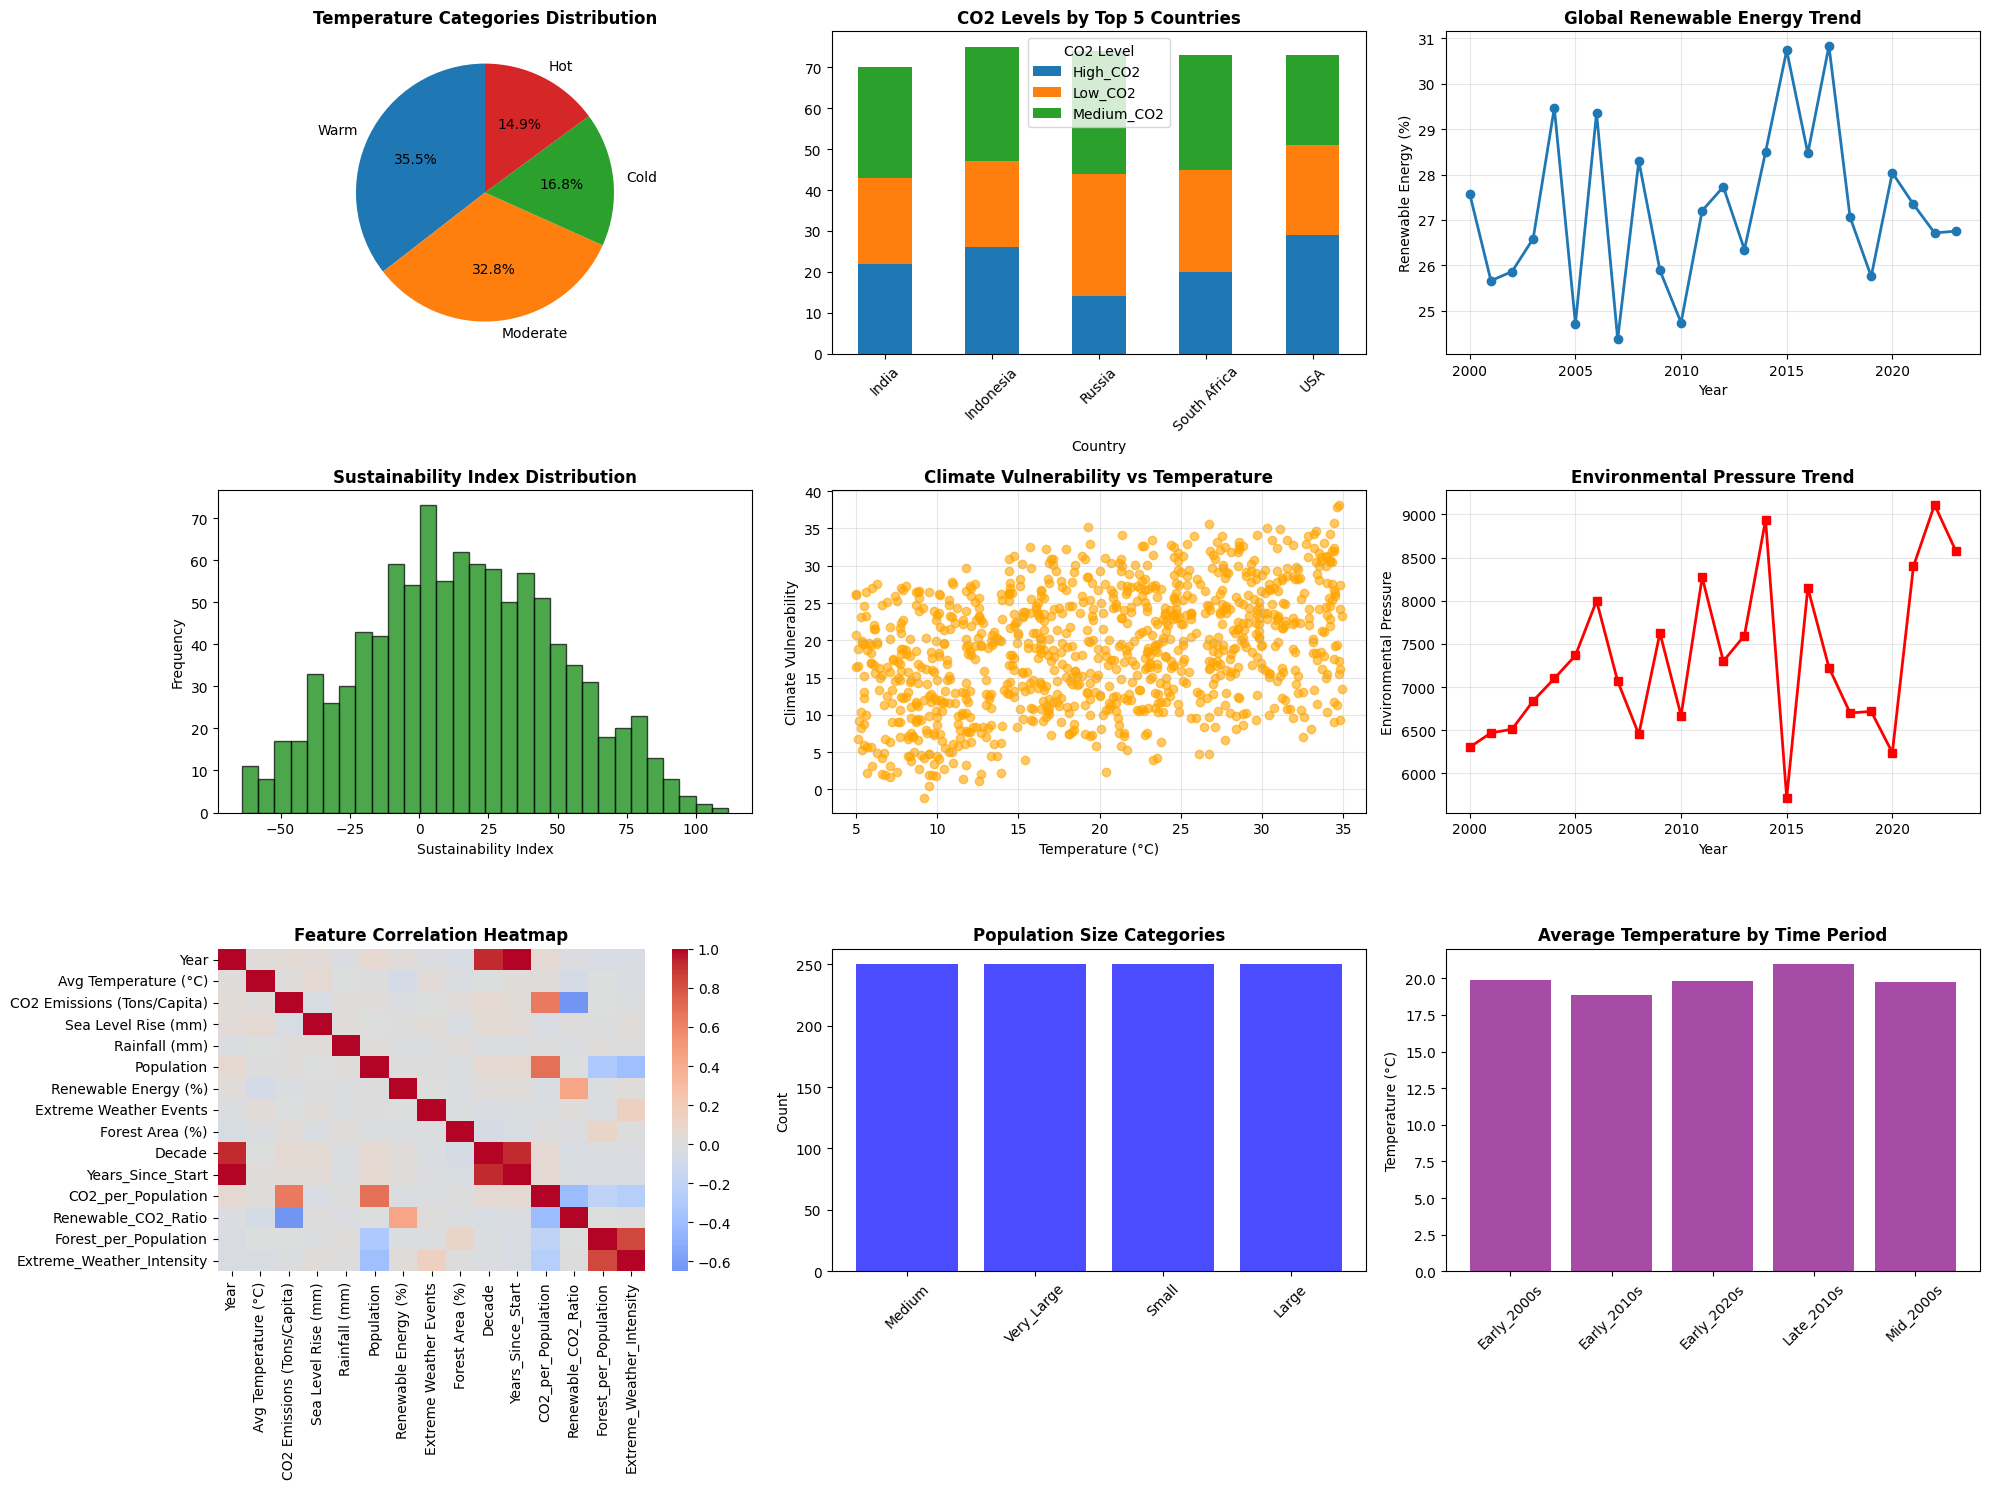

In [56]:

def create_feature_plots(df):
    """Create visualization plots for feature engineering"""
    print("\n11. Creating feature engineering plots...")

    fig, axes = plt.subplots(3, 3, figsize=(20, 15))

    temp_counts = df['Temperature_Category'].value_counts()
    axes[0, 0].pie(temp_counts.values, labels=temp_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Temperature Categories Distribution', fontweight='bold')

    top_countries = df['Country'].value_counts().head(5).index
    co2_by_country = df[df['Country'].isin(top_countries)].groupby(['Country', 'CO2_Level']).size().unstack(fill_value=0)
    co2_by_country.plot(kind='bar', stacked=True, ax=axes[0, 1])
    axes[0, 1].set_title('CO2 Levels by Top 5 Countries', fontweight='bold')
    axes[0, 1].legend(title='CO2 Level')
    axes[0, 1].tick_params(axis='x', rotation=45)

    renewable_trend = df.groupby('Year')['Renewable Energy (%)'].mean()
    axes[0, 2].plot(renewable_trend.index, renewable_trend.values, marker='o', linewidth=2)
    axes[0, 2].set_title('Global Renewable Energy Trend', fontweight='bold')
    axes[0, 2].set_xlabel('Year')
    axes[0, 2].set_ylabel('Renewable Energy (%)')
    axes[0, 2].grid(True, alpha=0.3)

    if 'Sustainability_Index' in df.columns:
        axes[1, 0].hist(df['Sustainability_Index'], bins=30, alpha=0.7, color='green', edgecolor='black')
        axes[1, 0].set_title('Sustainability Index Distribution', fontweight='bold')
        axes[1, 0].set_xlabel('Sustainability Index')
        axes[1, 0].set_ylabel('Frequency')

    if 'Climate_Vulnerability' in df.columns:
        axes[1, 1].scatter(df['Avg Temperature (°C)'], df['Climate_Vulnerability'], alpha=0.6, color='orange')
        axes[1, 1].set_title('Climate Vulnerability vs Temperature', fontweight='bold')
        axes[1, 1].set_xlabel('Temperature (°C)')
        axes[1, 1].set_ylabel('Climate Vulnerability')
        axes[1, 1].grid(True, alpha=0.3)

    if 'Environmental_Pressure' in df.columns:
        env_pressure_trend = df.groupby('Year')['Environmental_Pressure'].mean()
        axes[1, 2].plot(env_pressure_trend.index, env_pressure_trend.values, marker='s', linewidth=2, color='red')
        axes[1, 2].set_title('Environmental Pressure Trend', fontweight='bold')
        axes[1, 2].set_xlabel('Year')
        axes[1, 2].set_ylabel('Environmental Pressure')
        axes[1, 2].grid(True, alpha=0.3)

    numerical_cols = df.select_dtypes(include=[np.number]).columns[:15]  # Limit to avoid clutter
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, ax=axes[2, 0])
    axes[2, 0].set_title('Feature Correlation Heatmap', fontweight='bold')

    if 'Population_Size' in df.columns:
        pop_counts = df['Population_Size'].value_counts()
        axes[2, 1].bar(pop_counts.index, pop_counts.values, color='blue', alpha=0.7)
        axes[2, 1].set_title('Population Size Categories', fontweight='bold')
        axes[2, 1].set_ylabel('Count')
        axes[2, 1].tick_params(axis='x', rotation=45)

    if 'Time_Period' in df.columns:
        time_temp = df.groupby('Time_Period')['Avg Temperature (°C)'].mean()
        axes[2, 2].bar(time_temp.index, time_temp.values, color='purple', alpha=0.7)
        axes[2, 2].set_title('Average Temperature by Time Period', fontweight='bold')
        axes[2, 2].set_ylabel('Temperature (°C)')
        axes[2, 2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
create_feature_plots(df)


## 12: Generationg Feature Report

In [58]:

def generate_feature_report(df_original, df_final):
    """Generate a comprehensive feature engineering report"""
    print("FEATURE ENGINEERING REPORT")

    print(f"\nOriginal dataset:")
    print(f"  Shape: {df_original.shape}")
    print(f"  Features: {df_original.shape[1]}")

    print(f"\nFinal dataset:")
    print(f"  Shape: {df_final.shape}")
    print(f"  Features: {df_final.shape[1]}")
    print(f"  New features added: {df_final.shape[1] - df_original.shape[1]}")

    original_features = set(df_original.columns)
    all_features = set(df_final.columns)
    new_features = all_features - original_features

    feature_categories = {
        'Time Features': [f for f in new_features if any(x in f.lower() for x in ['decade', 'year', 'time', 'period'])],
        'Categorical Features': [f for f in new_features if any(x in f.lower() for x in ['category', 'level', 'size', 'encoded'])],
        'Derived Features': [f for f in new_features if any(x in f.lower() for x in ['ratio', 'index', 'pressure', 'efficiency', 'vulnerability'])],
        'Interaction Features': [f for f in new_features if 'interaction' in f.lower()],
        'Aggregated Features': [f for f in new_features if any(x in f.lower() for x in ['country_', 'year_', '3yr', 'mean', 'std', 'trend'])],
        'Country Encoding': [f for f in new_features if f.startswith('Country_') and not any(x in f for x in ['mean', 'std', 'trend'])],
        'Other Features': []
    }

    classified_features = set()
    for category_features in feature_categories.values():
        classified_features.update(category_features)

    feature_categories['Other Features'] = list(new_features - classified_features)

    print(f"\nFeature categories created:")
    for category, features in feature_categories.items():
        if features:
            print(f"  {category}: {len(features)} features")
            if len(features) <= 5:
                print(f"    Examples: {features}")
            else:
                print(f"    Examples: {features[:5]}...")

    print(f"\nData quality:")
    print(f"  Missing values: {df_final.isnull().sum().sum()}")
    print(f"  Infinite values: {np.isinf(df_final.select_dtypes(include=[np.number])).sum().sum()}")
    print(f"  Duplicate rows: {df_final.duplicated().sum()}")

    memory_original = df_original.memory_usage(deep=True).sum() / 1024**2
    memory_final = df_final.memory_usage(deep=True).sum() / 1024**2
    print(f"\nMemory usage:")
    print(f"  Original: {memory_original:.2f} MB")
    print(f"  Final: {memory_final:.2f} MB")
    print(f"  Increase: {((memory_final - memory_original) / memory_original * 100):.1f}%")

    numerical_features = df_final.select_dtypes(include=[np.number]).columns
    categorical_features = df_final.select_dtypes(include=['object']).columns

    print(f"\nFeature types:")
    print(f"  Numerical features: {len(numerical_features)}")
    print(f"  Categorical features: {len(categorical_features)}")

    key_derived = ['Sustainability_Index', 'Climate_Vulnerability', 'Environmental_Pressure']
    available_key = [f for f in key_derived if f in df_final.columns]

    if available_key:
        print(f"\nKey derived features statistics:")
        for feature in available_key:
            stats = df_final[feature].describe()
            print(f"  {feature}:")
            print(f"    Mean: {stats['mean']:.3f}, Std: {stats['std']:.3f}")
            print(f"    Range: [{stats['min']:.3f}, {stats['max']:.3f}]")

    print(f"\n✓ Feature engineering completed successfully!")
    print(f"✓ Dataset ready for model training with {df_final.shape[1]} features")

    # Feature engineering summary
    summary_stats = {
        'original_features': df_original.shape[1],
        'final_features': df_final.shape[1],
        'new_features': df_final.shape[1] - df_original.shape[1],
        'memory_increase_mb': memory_final - memory_original,
        'missing_values': df_final.isnull().sum().sum()
    }

    print(f"\nFeature Engineering Summary:")
    print(f"Original features: {summary_stats['original_features']}")
    print(f"Final features: {summary_stats['final_features']}")
    print(f"New features added: {summary_stats['new_features']}")
    print(f"Memory increase: {summary_stats['memory_increase_mb']:.2f} MB")
    print(f"Data quality: {df_final.shape[0]} rows, {summary_stats['missing_values']} missing values")
generate_feature_report(df_original, df)


FEATURE ENGINEERING REPORT

Original dataset:
  Shape: (1000, 10)
  Features: 10

Final dataset:
  Shape: (1000, 94)
  Features: 94
  New features added: 84

Feature categories created:
  Time Features: 11 features
    Examples: ['Time_Period_Encoded', 'Temp_Year_Interaction', 'Time_Period', 'Year_Global_Avg Temperature (°C)', 'Year_Global_Renewable Energy (%)']...
  Categorical Features: 12 features
    Examples: ['Time_Period_Encoded', 'Sea_Level_Impact', 'SeaLevel_Forest_Ratio', 'Temperature_Category_Encoded', 'Renewable_Level_Encoded']...
  Derived Features: 11 features
    Examples: ['Temp_Rainfall_Ratio', 'Weather_Population_Ratio', 'Climate_Vulnerability', 'Environmental_Pressure', 'SeaLevel_Forest_Ratio']...
  Interaction Features: 11 features
    Examples: ['Renewable_Forest_Interaction', 'CO2_Forest_Interaction', 'Temp_Year_Interaction', 'Temp_CO2_Interaction', 'Population_Forest_Interaction']...
  Aggregated Features: 42 features
    Examples: ['Country_India', 'Country_Popu

In [59]:
cleaned_file_path = '/content/engineered_climate_change_dataset.csv'
df.to_csv(cleaned_file_path, index=False)
from google.colab import files
files.download(cleaned_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

----

# 4: Data Visulization

## 1: Importing Liberies

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import warnings

warnings.filterwarnings('ignore')

## 2: Loading Engineered Dataset

In [60]:

def load_engineered_data(file_path='engineered_climate_change_dataset.csv'):
    """Load the engineered dataset"""
    print("DATA VISUALIZATION AND ANALYSIS")

    print("\n1. Loading engineered dataset...")
    df = pd.read_csv(file_path)
    print(f"✓ Loaded engineered dataset with shape: {df.shape}")
    return df
df = load_engineered_data()


DATA VISUALIZATION AND ANALYSIS

1. Loading engineered dataset...
✓ Loaded engineered dataset with shape: (1000, 94)


## 3: Creating Distribution Plots


2. Creating distribution plots...


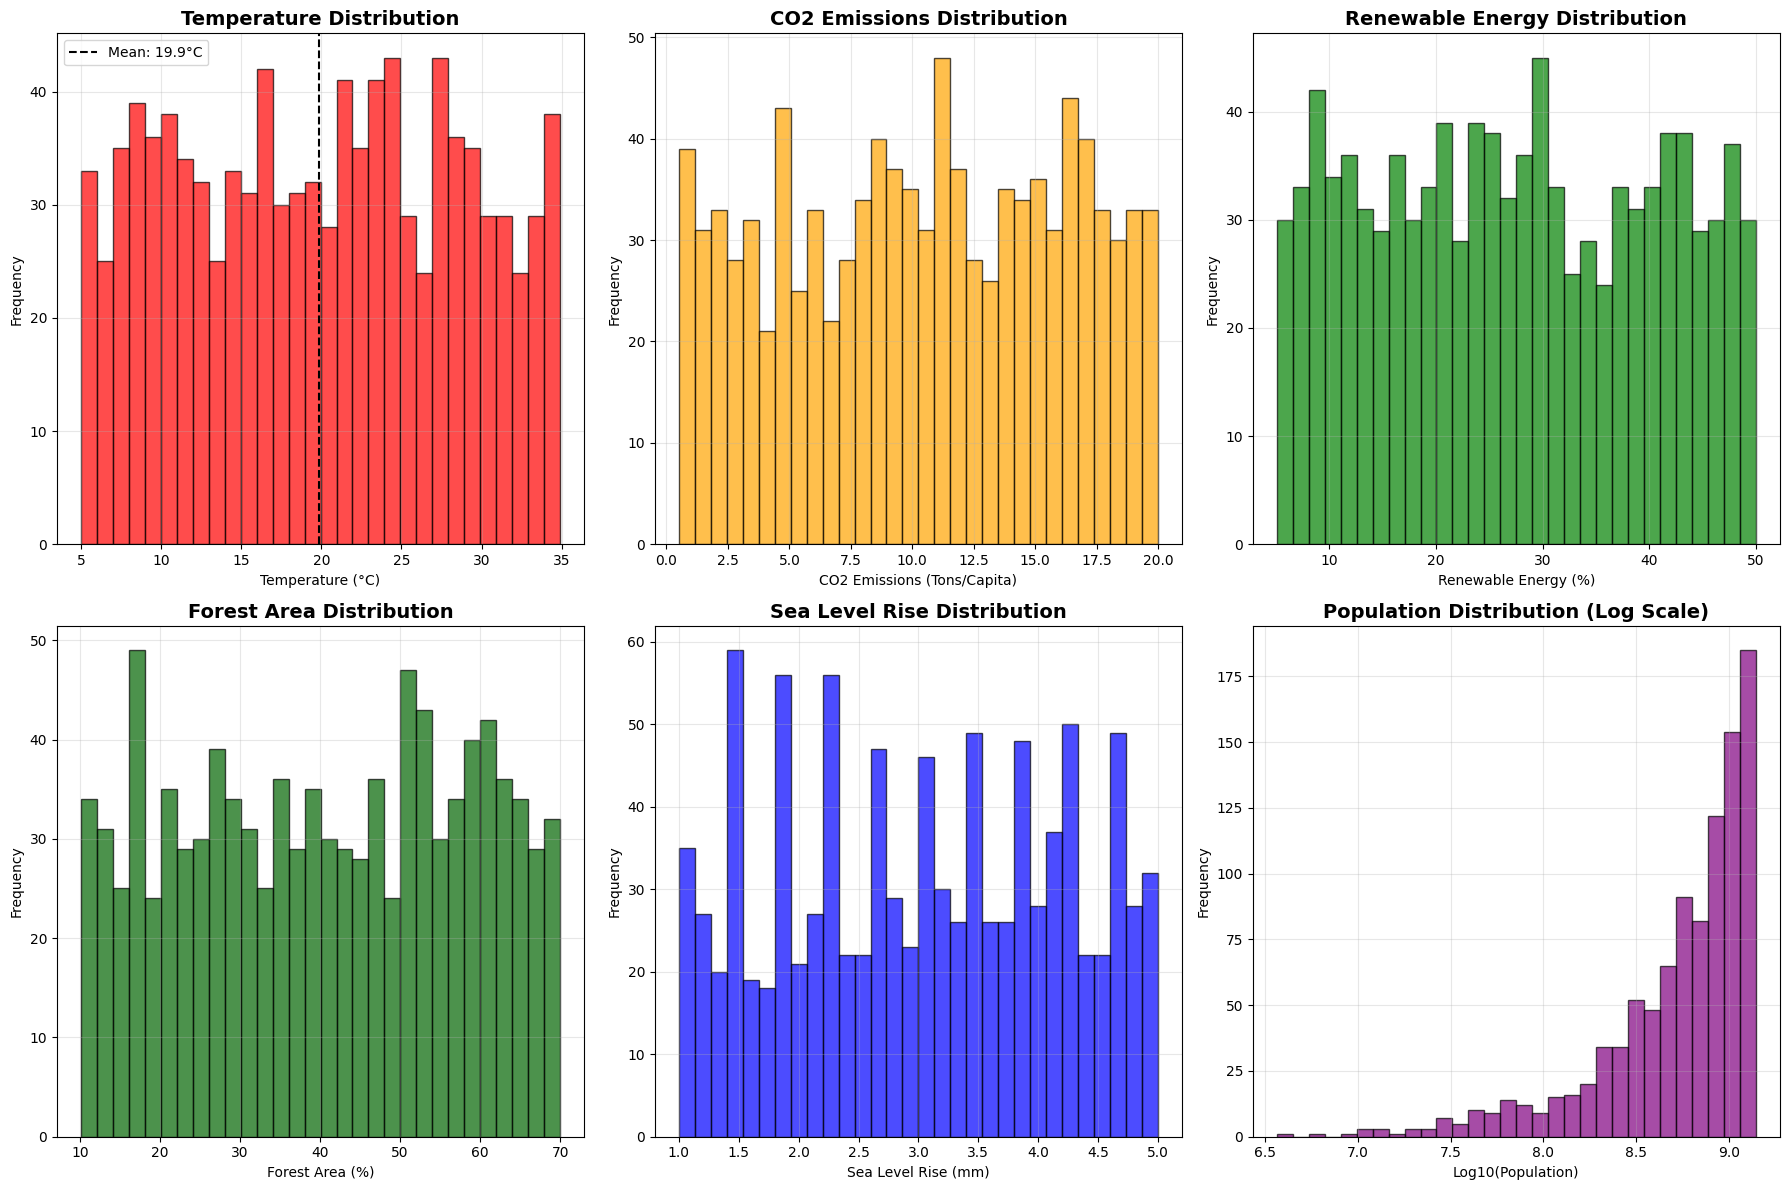

In [63]:

def create_distribution_plots(df):
    """Create distribution plots for key variables"""
    print("\n2. Creating distribution plots...")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    axes[0, 0].hist(df['Avg Temperature (°C)'], bins=30, alpha=0.7, color='red', edgecolor='black')
    axes[0, 0].set_title('Temperature Distribution', fontweight='bold', fontsize=14)
    axes[0, 0].set_xlabel('Temperature (°C)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)

    temp_mean = df['Avg Temperature (°C)'].mean()
    temp_std = df['Avg Temperature (°C)'].std()
    axes[0, 0].axvline(temp_mean, color='black', linestyle='--', label=f'Mean: {temp_mean:.1f}°C')
    axes[0, 0].legend()

    axes[0, 1].hist(df['CO2 Emissions (Tons/Capita)'], bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 1].set_title('CO2 Emissions Distribution', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('CO2 Emissions (Tons/Capita)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)

    axes[0, 2].hist(df['Renewable Energy (%)'], bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[0, 2].set_title('Renewable Energy Distribution', fontweight='bold', fontsize=14)
    axes[0, 2].set_xlabel('Renewable Energy (%)')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].grid(True, alpha=0.3)

    axes[1, 0].hist(df['Forest Area (%)'], bins=30, alpha=0.7, color='darkgreen', edgecolor='black')
    axes[1, 0].set_title('Forest Area Distribution', fontweight='bold', fontsize=14)
    axes[1, 0].set_xlabel('Forest Area (%)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True, alpha=0.3)

    axes[1, 1].hist(df['Sea Level Rise (mm)'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[1, 1].set_title('Sea Level Rise Distribution', fontweight='bold', fontsize=14)
    axes[1, 1].set_xlabel('Sea Level Rise (mm)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].grid(True, alpha=0.3)

    axes[1, 2].hist(np.log10(df['Population'] + 1), bins=30, alpha=0.7, color='purple', edgecolor='black')
    axes[1, 2].set_title('Population Distribution (Log Scale)', fontweight='bold', fontsize=14)
    axes[1, 2].set_xlabel('Log10(Population)')
    axes[1, 2].set_ylabel('Frequency')
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


create_distribution_plots(df)


## 4: Creating Correlation Heatmaps


3. Creating correlation heatmap...


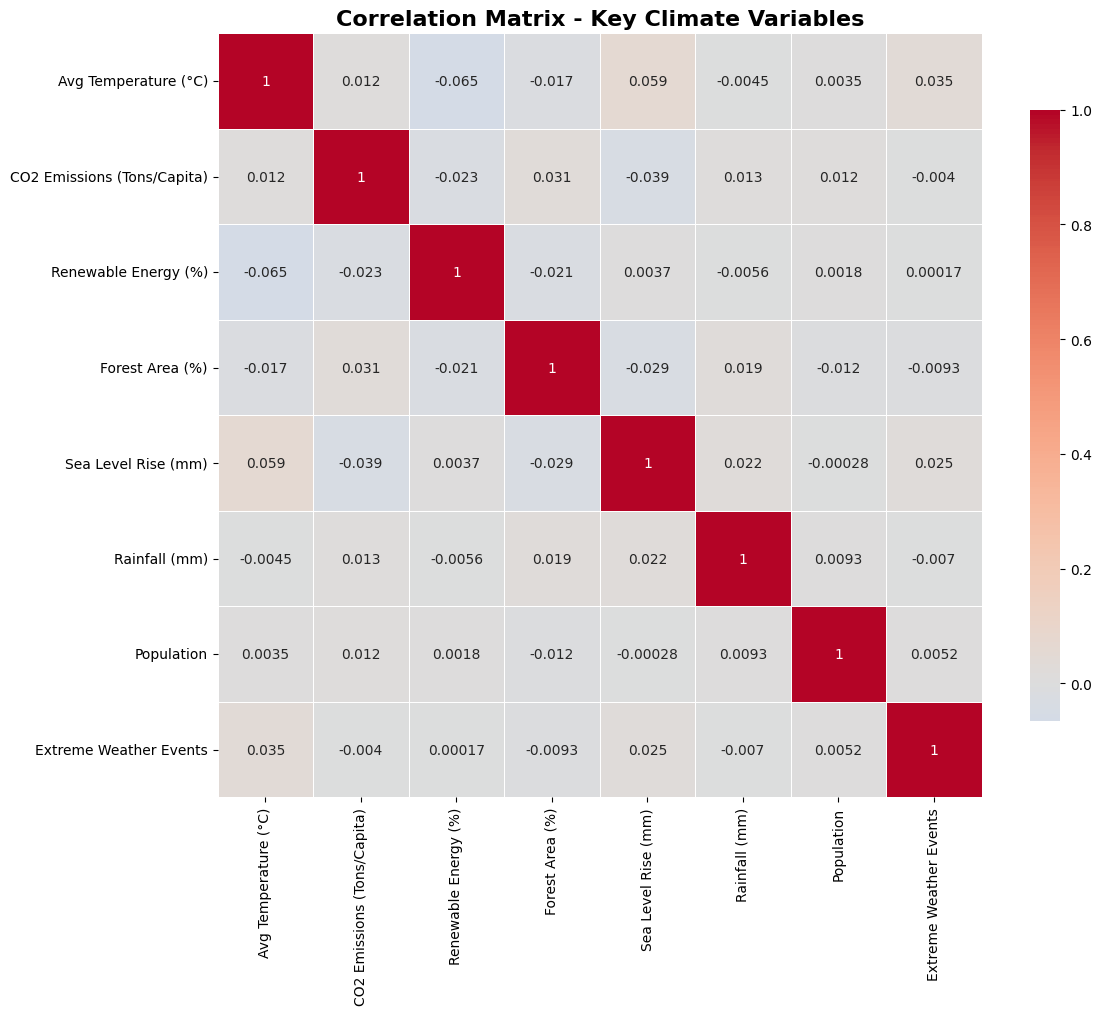

In [64]:

def create_correlation_heatmap(df):
    """Create correlation heatmap for numerical variables"""
    print("\n3. Creating correlation heatmap...")

    numerical_cols = df.select_dtypes(include=[np.number]).columns

    key_vars = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Renewable Energy (%)',
                'Forest Area (%)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
                'Population', 'Extreme Weather Events']

    available_vars = [col for col in key_vars if col in numerical_cols]

    if len(available_vars) < 3:
        available_vars = numerical_cols[:8]

    correlation_matrix = df[available_vars].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix - Key Climate Variables', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

create_correlation_heatmap(df)


## 5: Creating Time Series Plots


4. Creating time series plots...


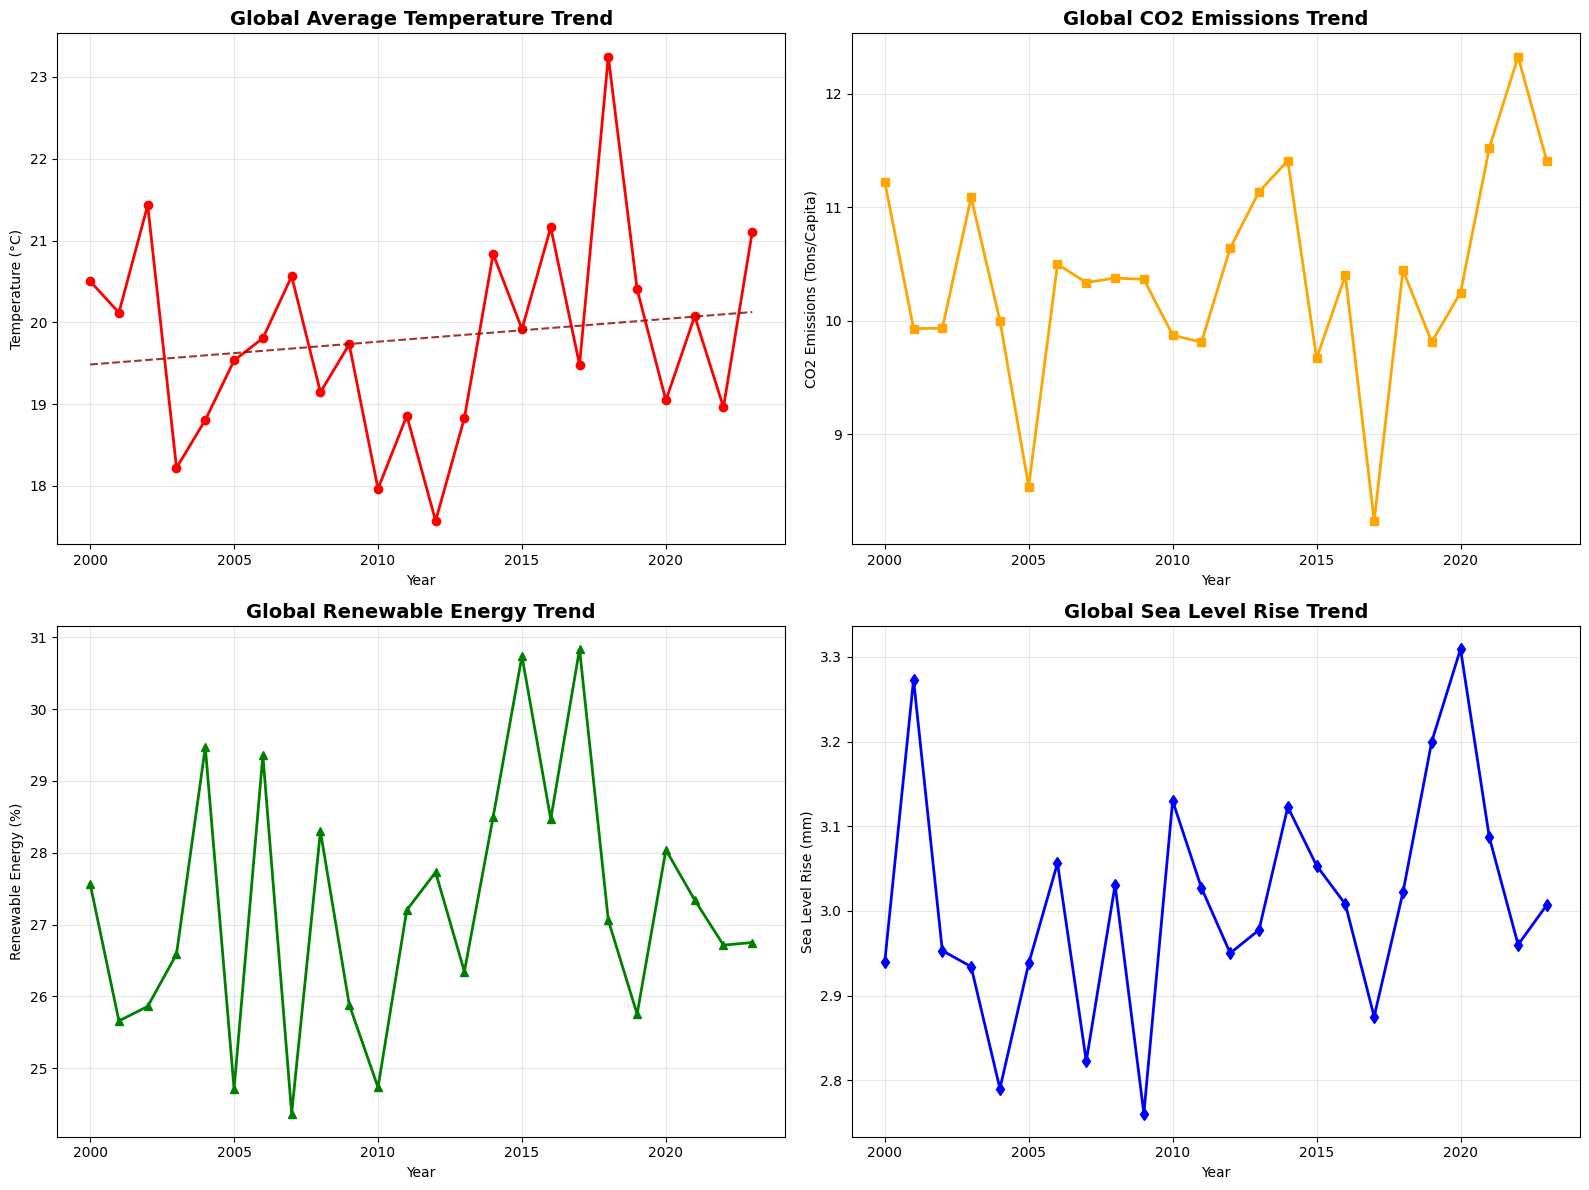

✓ Time series plots displayed

Trend Analysis:
  Temperature trend: 0.028°C per year
  CO2 trend: 0.032 tons/capita per year
  Renewable energy trend: 0.052% per year
  Sea level rise trend: 0.005mm per year


In [67]:

def create_time_series_plots(df):
    """Create time series plots showing trends over time"""
    print("\n4. Creating time series plots...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    temp_trend = df.groupby('Year')['Avg Temperature (°C)'].mean()
    axes[0, 0].plot(temp_trend.index, temp_trend.values, marker='o', linewidth=2, color='red')
    axes[0, 0].set_title('Global Average Temperature Trend', fontweight='bold', fontsize=14)
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Temperature (°C)')
    axes[0, 0].grid(True, alpha=0.3)

    z = np.polyfit(temp_trend.index, temp_trend.values, 1)
    p = np.poly1d(z)
    axes[0, 0].plot(temp_trend.index, p(temp_trend.index), "--", alpha=0.8, color='darkred')

    co2_trend = df.groupby('Year')['CO2 Emissions (Tons/Capita)'].mean()
    axes[0, 1].plot(co2_trend.index, co2_trend.values, marker='s', linewidth=2, color='orange')
    axes[0, 1].set_title('Global CO2 Emissions Trend', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('CO2 Emissions (Tons/Capita)')
    axes[0, 1].grid(True, alpha=0.3)

    renewable_trend = df.groupby('Year')['Renewable Energy (%)'].mean()
    axes[1, 0].plot(renewable_trend.index, renewable_trend.values, marker='^', linewidth=2, color='green')
    axes[1, 0].set_title('Global Renewable Energy Trend', fontweight='bold', fontsize=14)
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Renewable Energy (%)')
    axes[1, 0].grid(True, alpha=0.3)

    sea_level_trend = df.groupby('Year')['Sea Level Rise (mm)'].mean()
    axes[1, 1].plot(sea_level_trend.index, sea_level_trend.values, marker='d', linewidth=2, color='blue')
    axes[1, 1].set_title('Global Sea Level Rise Trend', fontweight='bold', fontsize=14)
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Sea Level Rise (mm)')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("✓ Time series plots displayed")

    print("\nTrend Analysis:")
    temp_slope = np.polyfit(temp_trend.index, temp_trend.values, 1)[0]
    co2_slope = np.polyfit(co2_trend.index, co2_trend.values, 1)[0]
    renewable_slope = np.polyfit(renewable_trend.index, renewable_trend.values, 1)[0]
    sea_level_slope = np.polyfit(sea_level_trend.index, sea_level_trend.values, 1)[0]

    print(f"  Temperature trend: {temp_slope:.3f}°C per year")
    print(f"  CO2 trend: {co2_slope:.3f} tons/capita per year")
    print(f"  Renewable energy trend: {renewable_slope:.3f}% per year")
    print(f"  Sea level rise trend: {sea_level_slope:.3f}mm per year")

create_time_series_plots(df)


## 6: Creating Country Comparison Plots


5. Creating country comparison plots...


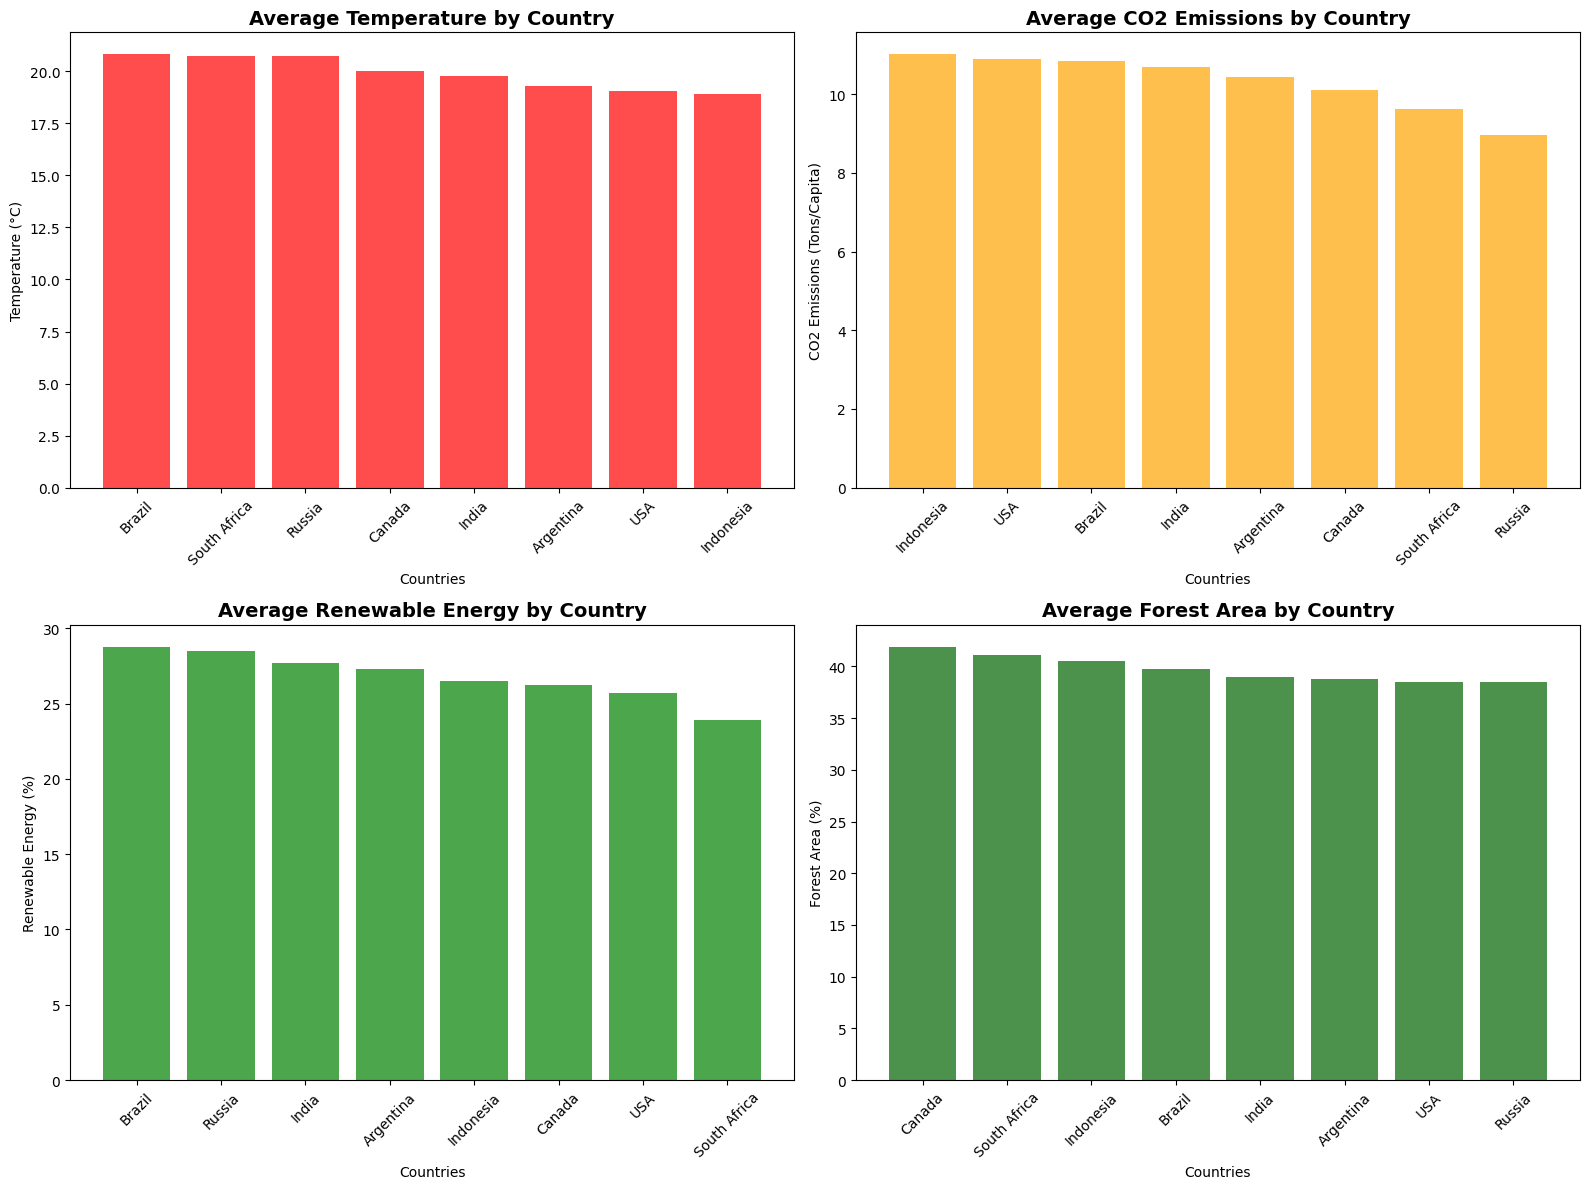

In [66]:

def create_country_comparison_plots(df):
    """Create plots comparing different countries"""
    print("\n5. Creating country comparison plots...")

    top_countries = df['Country'].value_counts().head(8).index

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    temp_by_country = df[df['Country'].isin(top_countries)].groupby('Country')['Avg Temperature (°C)'].mean().sort_values(ascending=False)
    axes[0, 0].bar(range(len(temp_by_country)), temp_by_country.values, color='red', alpha=0.7)
    axes[0, 0].set_title('Average Temperature by Country', fontweight='bold', fontsize=14)
    axes[0, 0].set_xlabel('Countries')
    axes[0, 0].set_ylabel('Temperature (°C)')
    axes[0, 0].set_xticks(range(len(temp_by_country)))
    axes[0, 0].set_xticklabels(temp_by_country.index, rotation=45)

    co2_by_country = df[df['Country'].isin(top_countries)].groupby('Country')['CO2 Emissions (Tons/Capita)'].mean().sort_values(ascending=False)
    axes[0, 1].bar(range(len(co2_by_country)), co2_by_country.values, color='orange', alpha=0.7)
    axes[0, 1].set_title('Average CO2 Emissions by Country', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Countries')
    axes[0, 1].set_ylabel('CO2 Emissions (Tons/Capita)')
    axes[0, 1].set_xticks(range(len(co2_by_country)))
    axes[0, 1].set_xticklabels(co2_by_country.index, rotation=45)

    renewable_by_country = df[df['Country'].isin(top_countries)].groupby('Country')['Renewable Energy (%)'].mean().sort_values(ascending=False)
    axes[1, 0].bar(range(len(renewable_by_country)), renewable_by_country.values, color='green', alpha=0.7)
    axes[1, 0].set_title('Average Renewable Energy by Country', fontweight='bold', fontsize=14)
    axes[1, 0].set_xlabel('Countries')
    axes[1, 0].set_ylabel('Renewable Energy (%)')
    axes[1, 0].set_xticks(range(len(renewable_by_country)))
    axes[1, 0].set_xticklabels(renewable_by_country.index, rotation=45)

    forest_by_country = df[df['Country'].isin(top_countries)].groupby('Country')['Forest Area (%)'].mean().sort_values(ascending=False)
    axes[1, 1].bar(range(len(forest_by_country)), forest_by_country.values, color='darkgreen', alpha=0.7)
    axes[1, 1].set_title('Average Forest Area by Country', fontweight='bold', fontsize=14)
    axes[1, 1].set_xlabel('Countries')
    axes[1, 1].set_ylabel('Forest Area (%)')
    axes[1, 1].set_xticks(range(len(forest_by_country)))
    axes[1, 1].set_xticklabels(forest_by_country.index, rotation=45)

    plt.tight_layout()
    plt.show()

create_country_comparison_plots(df)

## 7: Creating Scatter Plots


6. Creating scatter plots...


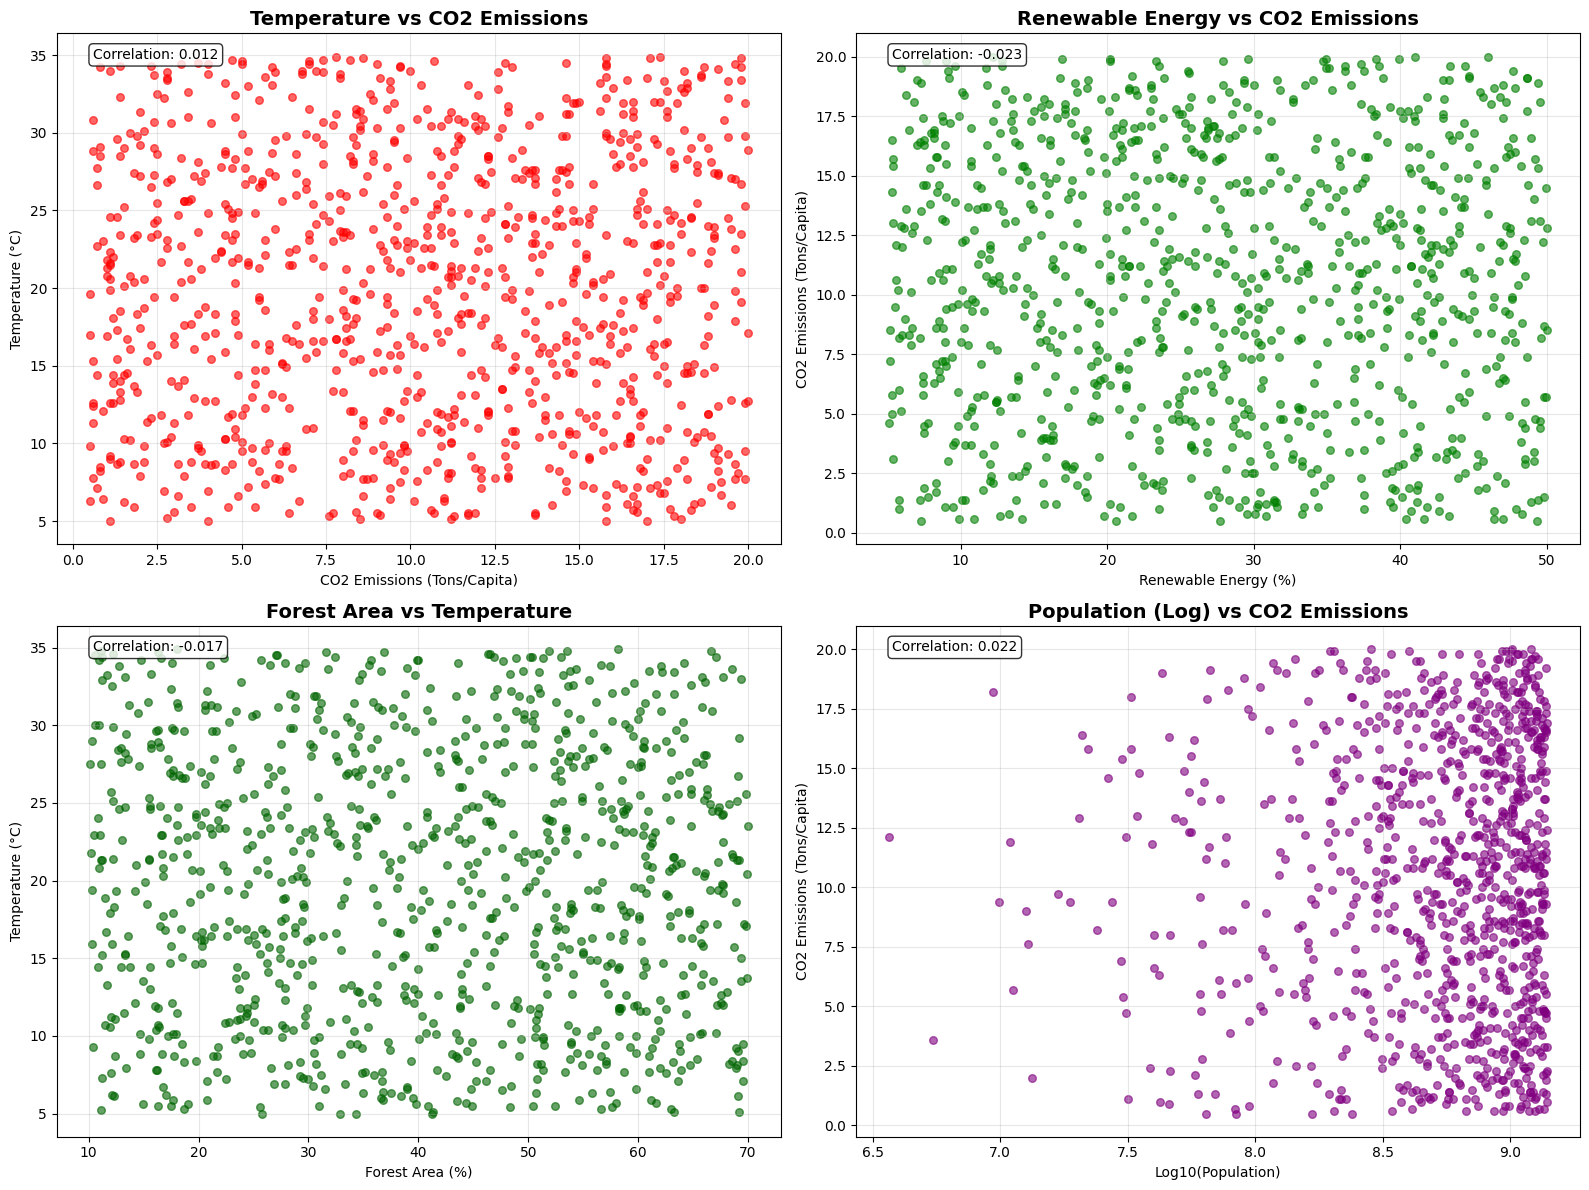

In [68]:

def create_scatter_plots(df):
    """Create scatter plots to show relationships between variables"""
    print("\n6. Creating scatter plots...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    axes[0, 0].scatter(df['CO2 Emissions (Tons/Capita)'], df['Avg Temperature (°C)'],
                       alpha=0.6, color='red', s=30)
    axes[0, 0].set_title('Temperature vs CO2 Emissions', fontweight='bold', fontsize=14)
    axes[0, 0].set_xlabel('CO2 Emissions (Tons/Capita)')
    axes[0, 0].set_ylabel('Temperature (°C)')
    axes[0, 0].grid(True, alpha=0.3)

    corr_temp_co2 = df['Avg Temperature (°C)'].corr(df['CO2 Emissions (Tons/Capita)'])
    axes[0, 0].text(0.05, 0.95, f'Correlation: {corr_temp_co2:.3f}',
                    transform=axes[0, 0].transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    axes[0, 1].scatter(df['Renewable Energy (%)'], df['CO2 Emissions (Tons/Capita)'],
                       alpha=0.6, color='green', s=30)
    axes[0, 1].set_title('Renewable Energy vs CO2 Emissions', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Renewable Energy (%)')
    axes[0, 1].set_ylabel('CO2 Emissions (Tons/Capita)')
    axes[0, 1].grid(True, alpha=0.3)

    corr_ren_co2 = df['Renewable Energy (%)'].corr(df['CO2 Emissions (Tons/Capita)'])
    axes[0, 1].text(0.05, 0.95, f'Correlation: {corr_ren_co2:.3f}',
                    transform=axes[0, 1].transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    axes[1, 0].scatter(df['Forest Area (%)'], df['Avg Temperature (°C)'],
                       alpha=0.6, color='darkgreen', s=30)
    axes[1, 0].set_title('Forest Area vs Temperature', fontweight='bold', fontsize=14)
    axes[1, 0].set_xlabel('Forest Area (%)')
    axes[1, 0].set_ylabel('Temperature (°C)')
    axes[1, 0].grid(True, alpha=0.3)

    corr_forest_temp = df['Forest Area (%)'].corr(df['Avg Temperature (°C)'])
    axes[1, 0].text(0.05, 0.95, f'Correlation: {corr_forest_temp:.3f}',
                    transform=axes[1, 0].transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    axes[1, 1].scatter(np.log10(df['Population'] + 1), df['CO2 Emissions (Tons/Capita)'],
                       alpha=0.6, color='purple', s=30)
    axes[1, 1].set_title('Population (Log) vs CO2 Emissions', fontweight='bold', fontsize=14)
    axes[1, 1].set_xlabel('Log10(Population)')
    axes[1, 1].set_ylabel('CO2 Emissions (Tons/Capita)')
    axes[1, 1].grid(True, alpha=0.3)

    corr_pop_co2 = np.log10(df['Population'] + 1).corr(df['CO2 Emissions (Tons/Capita)'])
    axes[1, 1].text(0.05, 0.95, f'Correlation: {corr_pop_co2:.3f}',
                    transform=axes[1, 1].transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()
create_scatter_plots(df)



## 8: Creating Box Plots


7. Creating box plots...


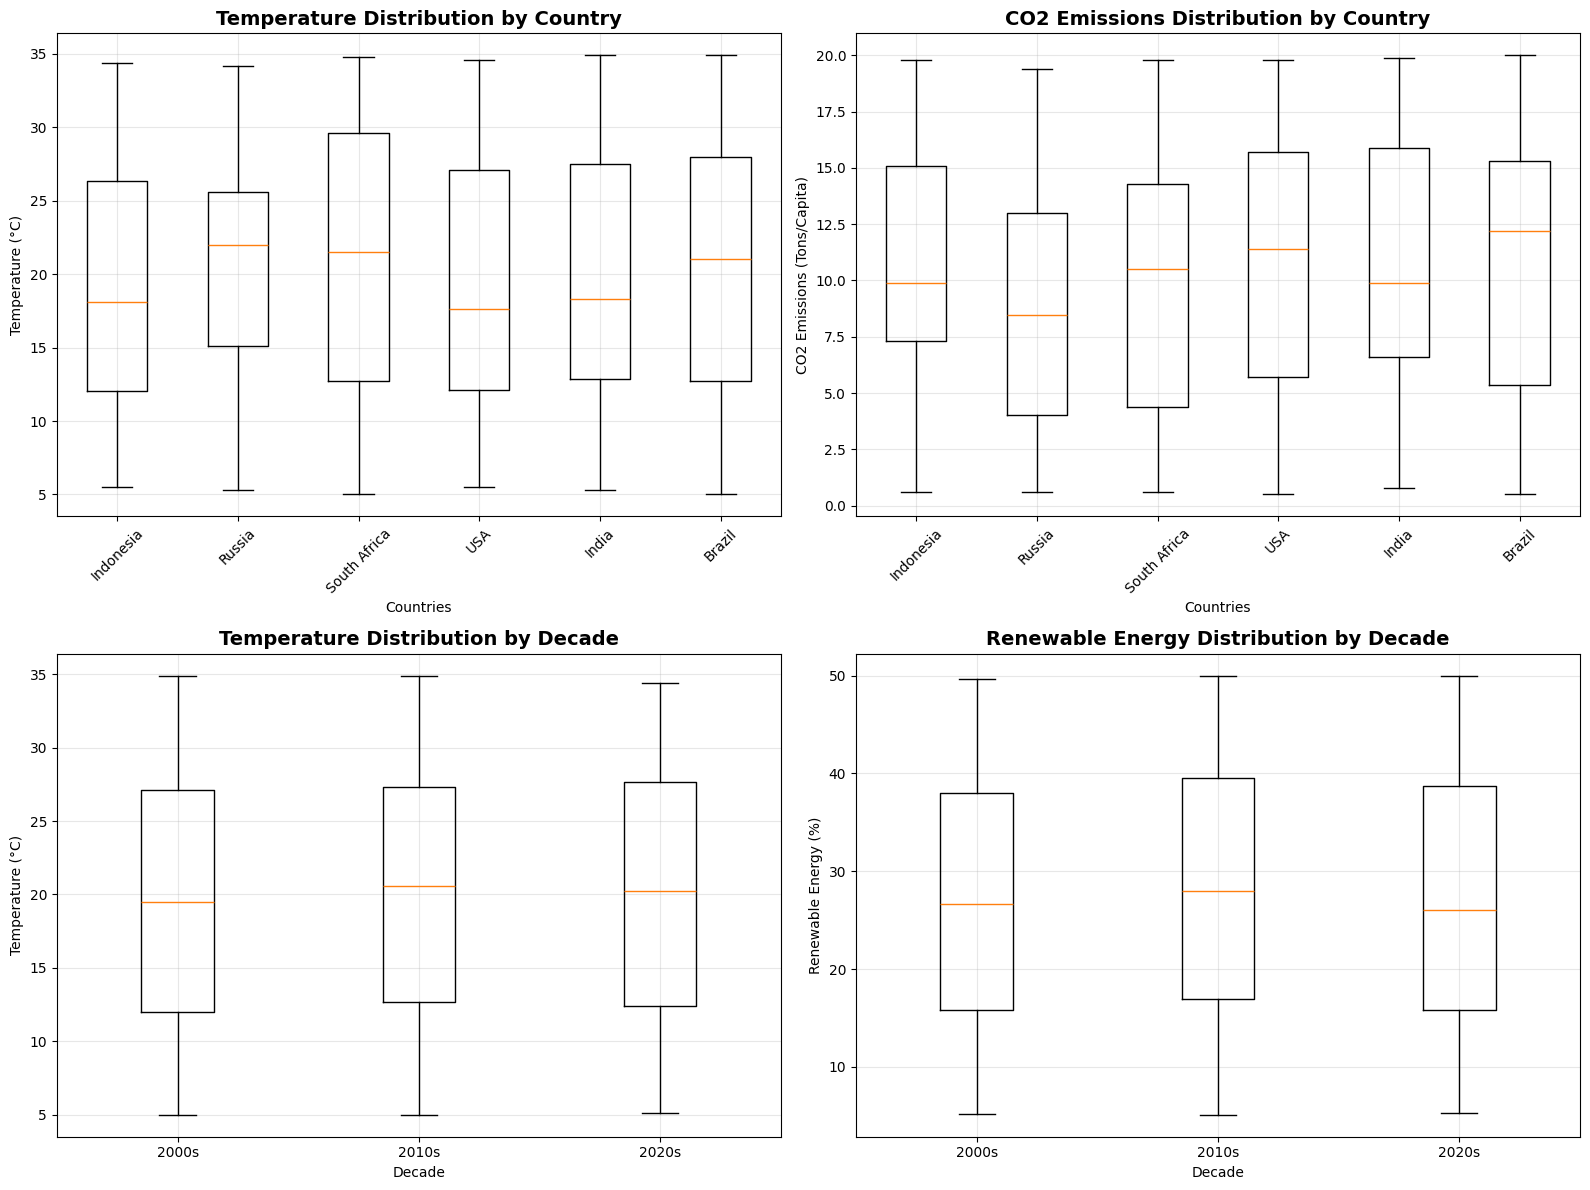

In [69]:

def create_box_plots(df):
    """Create box plots for categorical analysis"""
    print("\n7. Creating box plots...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    top_countries = df['Country'].value_counts().head(6).index
    temp_data = [df[df['Country'] == country]['Avg Temperature (°C)'].values for country in top_countries]
    axes[0, 0].boxplot(temp_data, labels=top_countries)
    axes[0, 0].set_title('Temperature Distribution by Country', fontweight='bold', fontsize=14)
    axes[0, 0].set_xlabel('Countries')
    axes[0, 0].set_ylabel('Temperature (°C)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)

    co2_data = [df[df['Country'] == country]['CO2 Emissions (Tons/Capita)'].values for country in top_countries]
    axes[0, 1].boxplot(co2_data, labels=top_countries)
    axes[0, 1].set_title('CO2 Emissions Distribution by Country', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Countries')
    axes[0, 1].set_ylabel('CO2 Emissions (Tons/Capita)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)

    decades = sorted(df['Year'].apply(lambda x: (x // 10) * 10).unique())
    temp_by_decade = [df[df['Year'].apply(lambda x: (x // 10) * 10) == decade]['Avg Temperature (°C)'].values for decade in decades]
    axes[1, 0].boxplot(temp_by_decade, labels=[f"{int(d)}s" for d in decades])
    axes[1, 0].set_title('Temperature Distribution by Decade', fontweight='bold', fontsize=14)
    axes[1, 0].set_xlabel('Decade')
    axes[1, 0].set_ylabel('Temperature (°C)')
    axes[1, 0].grid(True, alpha=0.3)

    renewable_by_decade = [df[df['Year'].apply(lambda x: (x // 10) * 10) == decade]['Renewable Energy (%)'].values for decade in decades]
    axes[1, 1].boxplot(renewable_by_decade, labels=[f"{int(d)}s" for d in decades])
    axes[1, 1].set_title('Renewable Energy Distribution by Decade', fontweight='bold', fontsize=14)
    axes[1, 1].set_xlabel('Decade')
    axes[1, 1].set_ylabel('Renewable Energy (%)')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
create_box_plots(df)


## 9: Creating advance *Plots*


8. Creating advanced plots...


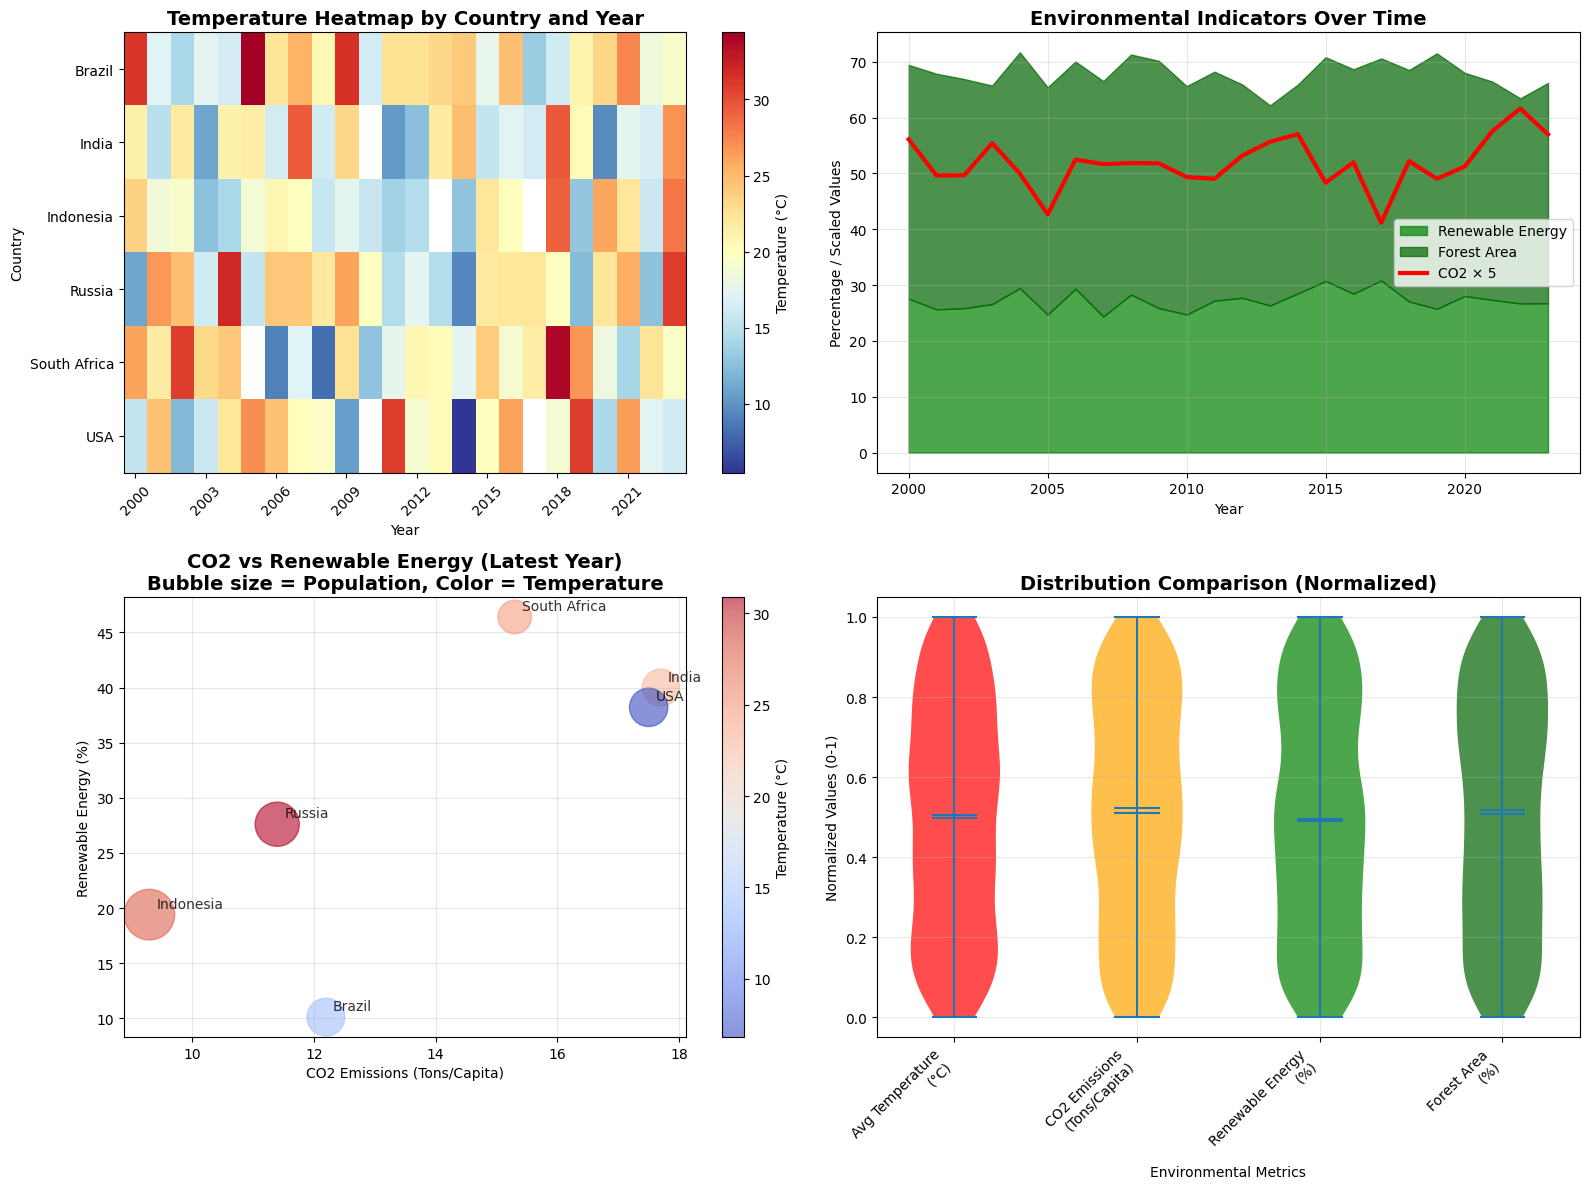

In [70]:

def create_advanced_plots(df):
    """Create advanced visualization plots"""
    print("\n8. Creating advanced plots...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    top_countries = df['Country'].value_counts().head(6).index
    temp_pivot = df[df['Country'].isin(top_countries)].pivot_table(
        values='Avg Temperature (°C)', index='Country', columns='Year', aggfunc='mean'
    )

    im1 = axes[0, 0].imshow(temp_pivot.values, cmap='RdYlBu_r', aspect='auto')
    axes[0, 0].set_title('Temperature Heatmap by Country and Year', fontweight='bold', fontsize=14)
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Country')
    axes[0, 0].set_xticks(range(0, len(temp_pivot.columns), 3))
    axes[0, 0].set_xticklabels(temp_pivot.columns[::3], rotation=45)
    axes[0, 0].set_yticks(range(len(temp_pivot.index)))
    axes[0, 0].set_yticklabels(temp_pivot.index)
    plt.colorbar(im1, ax=axes[0, 0], label='Temperature (°C)')

    env_data = df.groupby('Year').agg({
        'Renewable Energy (%)': 'mean',
        'Forest Area (%)': 'mean',
        'CO2 Emissions (Tons/Capita)': 'mean'
    })

    years = env_data.index
    axes[0, 1].fill_between(years, 0, env_data['Renewable Energy (%)'], alpha=0.7, color='green', label='Renewable Energy')
    axes[0, 1].fill_between(years, env_data['Renewable Energy (%)'],
                           env_data['Renewable Energy (%)'] + env_data['Forest Area (%)'],
                           alpha=0.7, color='darkgreen', label='Forest Area')
    axes[0, 1].plot(years, env_data['CO2 Emissions (Tons/Capita)'] * 5, color='red', linewidth=3, label='CO2 × 5')
    axes[0, 1].set_title('Environmental Indicators Over Time', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Percentage / Scaled Values')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    top_countries_sample = df[df['Country'].isin(top_countries)]
    latest_year_data = top_countries_sample.groupby('Country').last()

    scatter = axes[1, 0].scatter(latest_year_data['CO2 Emissions (Tons/Capita)'],
                                latest_year_data['Renewable Energy (%)'],
                                s=latest_year_data['Population']/1e6,
                                alpha=0.6, c=latest_year_data['Avg Temperature (°C)'],
                                cmap='coolwarm')
    axes[1, 0].set_title('CO2 vs Renewable Energy (Latest Year)\nBubble size = Population, Color = Temperature',
                         fontweight='bold', fontsize=14)
    axes[1, 0].set_xlabel('CO2 Emissions (Tons/Capita)')
    axes[1, 0].set_ylabel('Renewable Energy (%)')
    axes[1, 0].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1, 0], label='Temperature (°C)')

    for i, country in enumerate(latest_year_data.index):
        axes[1, 0].annotate(country,
                           (latest_year_data.iloc[i]['CO2 Emissions (Tons/Capita)'],
                            latest_year_data.iloc[i]['Renewable Energy (%)']),
                           xytext=(5, 5), textcoords='offset points', fontsize=10, alpha=0.8)

    metrics = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Renewable Energy (%)', 'Forest Area (%)']
    normalized_data = []
    labels = []

    for metric in metrics:
        if metric in df.columns:
            normalized = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())
            normalized_data.append(normalized.values)
            labels.append(metric.replace(' (', '\n('))

    parts = axes[1, 1].violinplot(normalized_data, positions=range(len(normalized_data)),
                                 showmeans=True, showmedians=True)
    axes[1, 1].set_title('Distribution Comparison (Normalized)', fontweight='bold', fontsize=14)
    axes[1, 1].set_xlabel('Environmental Metrics')
    axes[1, 1].set_ylabel('Normalized Values (0-1)')
    axes[1, 1].set_xticks(range(len(labels)))
    axes[1, 1].set_xticklabels(labels, rotation=45, ha='right')
    axes[1, 1].grid(True, alpha=0.3)

    colors = ['red', 'orange', 'green', 'darkgreen']
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i % len(colors)])
        pc.set_alpha(0.7)

    plt.tight_layout()
    plt.show()

create_advanced_plots(df)


## 10: Creating Interactive Plots

In [71]:

def create_interactive_plots(df):
    """Create interactive plots using Plotly"""
    print("\n9. Creating interactive plots...")

    try:
        top_countries = df['Country'].value_counts().head(10).index
        plot_data = df[df['Country'].isin(top_countries)]

        fig = px.scatter(plot_data,
                        x='CO2 Emissions (Tons/Capita)',
                        y='Avg Temperature (°C)',
                        size='Population',
                        color='Country',
                        hover_data=['Year', 'Renewable Energy (%)', 'Forest Area (%)'],
                        title='Interactive: CO2 Emissions vs Temperature by Country',
                        labels={'CO2 Emissions (Tons/Capita)': 'CO2 Emissions (Tons/Capita)',
                               'Avg Temperature (°C)': 'Temperature (°C)'})

        fig.update_layout(width=800, height=600)
        fig.show()

        yearly_data = df.groupby('Year').agg({
            'Avg Temperature (°C)': 'mean',
            'CO2 Emissions (Tons/Capita)': 'mean',
            'Renewable Energy (%)': 'mean'
        }).reset_index()

        fig2 = go.Figure()
        fig2.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data['Avg Temperature (°C)'],
                                 mode='lines+markers', name='Temperature (°C)', line=dict(color='red')))
        fig2.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data['CO2 Emissions (Tons/Capita)'],
                                 mode='lines+markers', name='CO2 Emissions', line=dict(color='orange'),
                                 yaxis='y2'))
        fig2.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data['Renewable Energy (%)'],
                                 mode='lines+markers', name='Renewable Energy (%)', line=dict(color='green'),
                                 yaxis='y3'))

        fig2.update_layout(
            title='Interactive Time Series: Multiple Climate Indicators',
            xaxis=dict(title='Year'),
            yaxis=dict(title='Temperature (°C)', side='left'),
            yaxis2=dict(title='CO2 Emissions', overlaying='y', side='right'),
            yaxis3=dict(title='Renewable Energy (%)', overlaying='y', side='right', position=0.85),
            width=800, height=600
        )
        fig2.show()

        print("✓ Interactive plots displayed")

    except Exception as e:
        print(f"Note: Interactive plots require Plotly. Error: {str(e)}")
        print("Displaying static alternative plots...")

        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        top_countries = df['Country'].value_counts().head(8).index
        plot_data = df[df['Country'].isin(top_countries)]

        for country in top_countries:
            country_data = plot_data[plot_data['Country'] == country]
            axes[0].scatter(country_data['CO2 Emissions (Tons/Capita)'],
                           country_data['Avg Temperature (°C)'],
                           label=country, alpha=0.7, s=50)

        axes[0].set_title('CO2 Emissions vs Temperature by Country', fontweight='bold')
        axes[0].set_xlabel('CO2 Emissions (Tons/Capita)')
        axes[0].set_ylabel('Temperature (°C)')
        axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[0].grid(True, alpha=0.3)

        yearly_data = df.groupby('Year').agg({
            'Avg Temperature (°C)': 'mean',
            'CO2 Emissions (Tons/Capita)': 'mean',
            'Renewable Energy (%)': 'mean'
        })

        ax1 = axes[1]
        ax2 = ax1.twinx()

        line1 = ax1.plot(yearly_data.index, yearly_data['Avg Temperature (°C)'],
                        color='red', marker='o', label='Temperature')
        line2 = ax2.plot(yearly_data.index, yearly_data['Renewable Energy (%)'],
                        color='green', marker='s', label='Renewable Energy')

        ax1.set_xlabel('Year')
        ax1.set_ylabel('Temperature (°C)', color='red')
        ax2.set_ylabel('Renewable Energy (%)', color='green')
        ax1.set_title('Temperature and Renewable Energy Trends', fontweight='bold')

        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

        plt.tight_layout()
        plt.show()

create_interactive_plots(df)



9. Creating interactive plots...


✓ Interactive plots displayed


## 11: Visualization Summary

In [73]:

def generate_visualization_summary(df):
    """Generate a comprehensive visualization summary"""
    print("VISUALIZATION ANALYSIS SUMMARY")

    print(f"\nDataset Overview:")
    print(f"  Total records: {len(df):,}")
    print(f"  Countries: {df['Country'].nunique()}")
    print(f"  Years covered: {df['Year'].min()} - {df['Year'].max()}")
    print(f"  Time span: {df['Year'].max() - df['Year'].min() + 1} years")

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if 'Avg Temperature (°C)' in numerical_cols:
        correlations = df[numerical_cols].corr()['Avg Temperature (°C)'].abs().sort_values(ascending=False)

        print(f"\nKey Temperature Correlations:")
        for var, corr in correlations.head(6).items():
            if var != 'Avg Temperature (°C)':
                direction = "positive" if df['Avg Temperature (°C)'].corr(df[var]) > 0 else "negative"
                print(f"  {var}: {corr:.3f} ({direction})")

    temp_stats = df['Avg Temperature (°C)'].describe()
    print(f"\nTemperature Analysis:")
    print(f"  Global average: {temp_stats['mean']:.2f}°C")
    print(f"  Range: {temp_stats['min']:.2f}°C to {temp_stats['max']:.2f}°C")
    print(f"  Standard deviation: {temp_stats['std']:.2f}°C")

    country_temps = df.groupby('Country')['Avg Temperature (°C)'].mean().sort_values()
    print(f"  Coldest countries: {', '.join(country_temps.head(3).index)}")
    print(f"  Hottest countries: {', '.join(country_temps.tail(3).index)}")

    co2_stats = df['CO2 Emissions (Tons/Capita)'].describe()
    print(f"\nCO2 Emissions Analysis:")
    print(f"  Global average: {co2_stats['mean']:.2f} tons/capita")
    print(f"  Range: {co2_stats['min']:.2f} to {co2_stats['max']:.2f} tons/capita")

    country_co2 = df.groupby('Country')['CO2 Emissions (Tons/Capita)'].mean().sort_values()
    print(f"  Lowest emitters: {', '.join(country_co2.head(3).index)}")
    print(f"  Highest emitters: {', '.join(country_co2.tail(3).index)}")

    renewable_stats = df['Renewable Energy (%)'].describe()
    print(f"\nRenewable Energy Analysis:")
    print(f"  Global average: {renewable_stats['mean']:.2f}%")
    print(f"  Range: {renewable_stats['min']:.2f}% to {renewable_stats['max']:.2f}%")

    country_renewable = df.groupby('Country')['Renewable Energy (%)'].mean().sort_values()
    print(f"  Lowest renewable: {', '.join(country_renewable.head(3).index)}")
    print(f"  Highest renewable: {', '.join(country_renewable.tail(3).index)}")

    print(f"\nTemporal Trends (slope per year):")
    yearly_data = df.groupby('Year').agg({
        'Avg Temperature (°C)': 'mean',
        'CO2 Emissions (Tons/Capita)': 'mean',
        'Renewable Energy (%)': 'mean',
        'Sea Level Rise (mm)': 'mean'
    })

    for col in yearly_data.columns:
        if len(yearly_data) > 2:
            slope = np.polyfit(yearly_data.index, yearly_data[col], 1)[0]
            trend = "increasing" if slope > 0 else "decreasing"
            print(f"  {col}: {slope:.4f} units/year ({trend})")

    print(f"\nData Quality:")
    print(f"  Missing values: {df.isnull().sum().sum()}")
    print(f"  Complete records: {len(df) - df.isnull().any(axis=1).sum()}")
    print(f"  Data completeness: {((len(df) - df.isnull().any(axis=1).sum()) / len(df) * 100):.1f}%")

    print(f"\nKey Insights:")

    if 'CO2 Emissions (Tons/Capita)' in df.columns:
        temp_co2_corr = df['Avg Temperature (°C)'].corr(df['CO2 Emissions (Tons/Capita)'])
        if abs(temp_co2_corr) > 0.1:
            relationship = "positive" if temp_co2_corr > 0 else "negative"
            print(f"  • Temperature and CO2 emissions show a {relationship} correlation ({temp_co2_corr:.3f})")

    if len(yearly_data) > 5:
        renewable_slope = np.polyfit(yearly_data.index, yearly_data['Renewable Energy (%)'], 1)[0]
        if renewable_slope > 0.1:
            print(f"  • Renewable energy adoption is increasing over time (+{renewable_slope:.2f}%/year)")
        elif renewable_slope < -0.1:
            print(f"  • Renewable energy adoption is declining over time ({renewable_slope:.2f}%/year)")

    if df['Country'].nunique() > 5:
        print(f"  • Data covers {df['Country'].nunique()} countries with varying climate patterns")

    temp_range = temp_stats['max'] - temp_stats['min']
    if temp_range > 30:
        print(f"  • Wide temperature variation across regions ({temp_range:.1f}°C range)")

    print(f"\n✓ Comprehensive climate data visualization completed!")
    print(f"✓ {len(df)} records analyzed across {df['Country'].nunique()} countries")
generate_visualization_summary(df)


VISUALIZATION ANALYSIS SUMMARY

Dataset Overview:
  Total records: 1,000
  Countries: 15
  Years covered: 2000 - 2023
  Time span: 24 years

Key Temperature Correlations:
  Temp_vs_Global: 1.000 (positive)
  Avg Temperature (°C)_deviation_from_country_avg: 0.996 (positive)
  Temperature_Category_Encoded: 0.952 (positive)
  Avg Temperature (°C)_3yr_trend: 0.700 (positive)
  Temp_Forest_Interaction: 0.667 (positive)

Temperature Analysis:
  Global average: 19.88°C
  Range: 5.00°C to 34.90°C
  Standard deviation: 8.54°C
  Coldest countries: UK, Indonesia, USA
  Hottest countries: Russia, South Africa, Brazil

CO2 Emissions Analysis:
  Global average: 10.43 tons/capita
  Range: 0.50 to 20.00 tons/capita
  Lowest emitters: Australia, Russia, Mexico
  Highest emitters: France, Indonesia, UK

Renewable Energy Analysis:
  Global average: 27.30%
  Range: 5.10% to 50.00%
  Lowest renewable: South Africa, Australia, USA
  Highest renewable: France, Brazil, China

Temporal Trends (slope per year):

----

# 5: Model Selection

## 1: Importing Liberaries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import learning_curve
import warnings

warnings.filterwarnings('ignore')


## 2: Loading Dataset

In [76]:

def load_data_for_modeling(file_path='engineered_climate_change_dataset.csv'):
    """Load and prepare data for machine learning"""
    print("MODEL SELECTION AND COMPARISON")

    print("\n1. Loading dataset for modeling...")
    df = pd.read_csv(file_path)
    print(f"✓ Loaded engineered dataset with shape: {df.shape}")
    return df

df = load_data_for_modeling()


MODEL SELECTION AND COMPARISON

1. Loading dataset for modeling...
✓ Loaded engineered dataset with shape: (1000, 94)


## 3: Preparing Featuring and Target

In [77]:

def prepare_features_and_target(df):
    """Prepare features and target variable for modeling"""
    print("\n2. Preparing features and target variable...")

    target_column = 'Avg Temperature (°C)'

    exclude_columns = ['Country', 'Year', target_column]
    feature_columns = []

    for col in df.columns:
        if col not in exclude_columns:
            if df[col].dtype in ['int64', 'float64']:
                feature_columns.append(col)
            elif df[col].dtype == 'object':
                try:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
                    if not df[col].isna().all():
                        feature_columns.append(col)
                except:
                    continue

    X = df[feature_columns].copy()
    y = df[target_column].copy()

    for col in X.columns:
        if X[col].isna().sum() > 0:
            X[col].fillna(X[col].median(), inplace=True)

    mask = ~y.isna()
    X = X[mask]
    y = y[mask]

    print(f"   ✓ Features prepared: {len(feature_columns)} features")
    print(f"   ✓ Target variable: {target_column}")
    print(f"   ✓ Final dataset shape: {X.shape}")
    print(f"   ✓ Target range: {y.min():.2f} to {y.max():.2f}")

    return X, y, feature_columns
X, y, feature_columns = prepare_features_and_target(df)



2. Preparing features and target variable...
   ✓ Features prepared: 86 features
   ✓ Target variable: Avg Temperature (°C)
   ✓ Final dataset shape: (1000, 86)
   ✓ Target range: 5.00 to 34.90


## 4: Split and Scale data

In [78]:

def split_and_scale_data(X, y):
    """Split data into train/test sets and apply scaling"""
    print("\n3. Splitting and scaling data...")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=None
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"   ✓ Training set: {X_train.shape[0]} samples")
    print(f"   ✓ Test set: {X_test.shape[0]} samples")
    print(f"   ✓ Features scaled using StandardScaler")

    return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler = split_and_scale_data(X, y)



3. Splitting and scaling data...
   ✓ Training set: 800 samples
   ✓ Test set: 200 samples
   ✓ Features scaled using StandardScaler


## 5: Defining Model

In [80]:

def define_models():
    """Define all models to be tested"""
    print("\n4. Defining models for comparison...")

    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0, random_state=42),
        'Lasso Regression': Lasso(alpha=1.0, random_state=42),
        'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf'),
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'MLP Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
    }

    print(f"   ✓ Defined {len(models)} models for comparison")
    for name in models.keys():
        print(f"      - {name}")

    return models
X_scaled = scaler.fit_transform(X)
models = define_models()



4. Defining models for comparison...
   ✓ Defined 12 models for comparison
      - Linear Regression
      - Ridge Regression
      - Lasso Regression
      - Elastic Net
      - Decision Tree
      - Random Forest
      - Gradient Boosting
      - AdaBoost
      - SVR
      - KNN
      - MLP Neural Network
      - XGBoost


## 6: Training and Evaluating Models

In [81]:

def train_and_evaluate_models(models, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled):
    """Train and evaluate all models"""
    print("\n5. Training and evaluating models...")

    results = {}
    model_objects = {}

    scaled_models = ['Ridge Regression', 'Lasso Regression', 'Elastic Net', 'SVR', 'KNN', 'MLP Neural Network']

    for name, model in models.items():
        print(f"   Training {name}...")

        try:
            if name in scaled_models:
                X_tr, X_te = X_train_scaled, X_test_scaled
            else:
                X_tr, X_te = X_train, X_test

            model.fit(X_tr, y_train)

            y_pred_train = model.predict(X_tr)
            y_pred_test = model.predict(X_te)

            train_mse = mean_squared_error(y_train, y_pred_train)
            test_mse = mean_squared_error(y_test, y_pred_test)
            train_mae = mean_absolute_error(y_train, y_pred_train)
            test_mae = mean_absolute_error(y_test, y_pred_test)
            train_r2 = r2_score(y_train, y_pred_train)
            test_r2 = r2_score(y_test, y_pred_test)

            results[name] = {
                'Train MSE': train_mse,
                'Test MSE': test_mse,
                'Train MAE': train_mae,
                'Test MAE': test_mae,
                'Train R²': train_r2,
                'Test R²': test_r2,
                'Train RMSE': np.sqrt(train_mse),
                'Test RMSE': np.sqrt(test_mse)
            }

            model_objects[name] = model

            print(f"      ✓ Test R²: {test_r2:.4f}, Test RMSE: {np.sqrt(test_mse):.4f}")

        except Exception as e:
            print(f"      ✗ Error training {name}: {str(e)}")
            continue

    print(f"\n   ✓ Successfully trained {len(results)} models")
    return results, model_objects
results, model_objects = train_and_evaluate_models(models, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)



5. Training and evaluating models...
   Training Linear Regression...
      ✓ Test R²: 1.0000, Test RMSE: 0.0000
   Training Ridge Regression...
      ✓ Test R²: 1.0000, Test RMSE: 0.0338
   Training Lasso Regression...
      ✓ Test R²: 0.9863, Test RMSE: 0.9920
   Training Elastic Net...
      ✓ Test R²: 0.9550, Test RMSE: 1.7988
   Training Decision Tree...
      ✓ Test R²: 0.9999, Test RMSE: 0.0831
   Training Random Forest...
      ✓ Test R²: 1.0000, Test RMSE: 0.0436
   Training Gradient Boosting...
      ✓ Test R²: 0.9999, Test RMSE: 0.0649
   Training AdaBoost...
      ✓ Test R²: 0.9962, Test RMSE: 0.5230
   Training SVR...
      ✓ Test R²: 0.9205, Test RMSE: 2.3900
   Training KNN...
      ✓ Test R²: 0.6444, Test RMSE: 5.0550
   Training MLP Neural Network...
      ✓ Test R²: 0.9582, Test RMSE: 1.7329
   Training XGBoost...
      ✓ Test R²: 0.9997, Test RMSE: 0.1401

   ✓ Successfully trained 12 models


## 7: Performing Cross Validations

In [82]:

def perform_cross_validation(models, X, y, X_scaled):
    """Perform cross-validation for all models"""
    print("\n6. Performing cross-validation...")

    cv_results = {}
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    scaled_models = ['Ridge Regression', 'Lasso Regression', 'Elastic Net', 'SVR', 'KNN', 'MLP Neural Network']

    for name, model in models.items():
        print(f"   Cross-validating {name}...")

        try:
            if name in scaled_models:
                X_cv = X_scaled
            else:
                X_cv = X

            cv_scores = cross_val_score(model, X_cv, y, cv=kfold, scoring='r2')

            cv_results[name] = {
                'CV Mean R²': cv_scores.mean(),
                'CV Std R²': cv_scores.std(),
                'CV Scores': cv_scores
            }

            print(f"      ✓ CV R² = {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

        except Exception as e:
            print(f"      ✗ Error in CV for {name}: {str(e)}")
            continue

    print(f"\n   ✓ Cross-validation completed for {len(cv_results)} models")
    return cv_results
cv_results = perform_cross_validation(models, X, y, X_scaled)




6. Performing cross-validation...
   Cross-validating Linear Regression...
      ✓ CV R² = 1.0000 (±0.0000)
   Cross-validating Ridge Regression...
      ✓ CV R² = 1.0000 (±0.0000)
   Cross-validating Lasso Regression...
      ✓ CV R² = 0.9861 (±0.0005)
   Cross-validating Elastic Net...
      ✓ CV R² = 0.9600 (±0.0040)
   Cross-validating Decision Tree...
      ✓ CV R² = 0.9999 (±0.0000)
   Cross-validating Random Forest...
      ✓ CV R² = 1.0000 (±0.0000)
   Cross-validating Gradient Boosting...
      ✓ CV R² = 0.9999 (±0.0000)
   Cross-validating AdaBoost...
      ✓ CV R² = 0.9970 (±0.0005)
   Cross-validating SVR...
      ✓ CV R² = 0.9276 (±0.0166)
   Cross-validating KNN...
      ✓ CV R² = 0.6797 (±0.0374)
   Cross-validating MLP Neural Network...
      ✓ CV R² = 0.9778 (±0.0025)
   Cross-validating XGBoost...
      ✓ CV R² = 0.9998 (±0.0000)

   ✓ Cross-validation completed for 12 models


## 8: Comparison Plots


7. Creating model comparison plots...


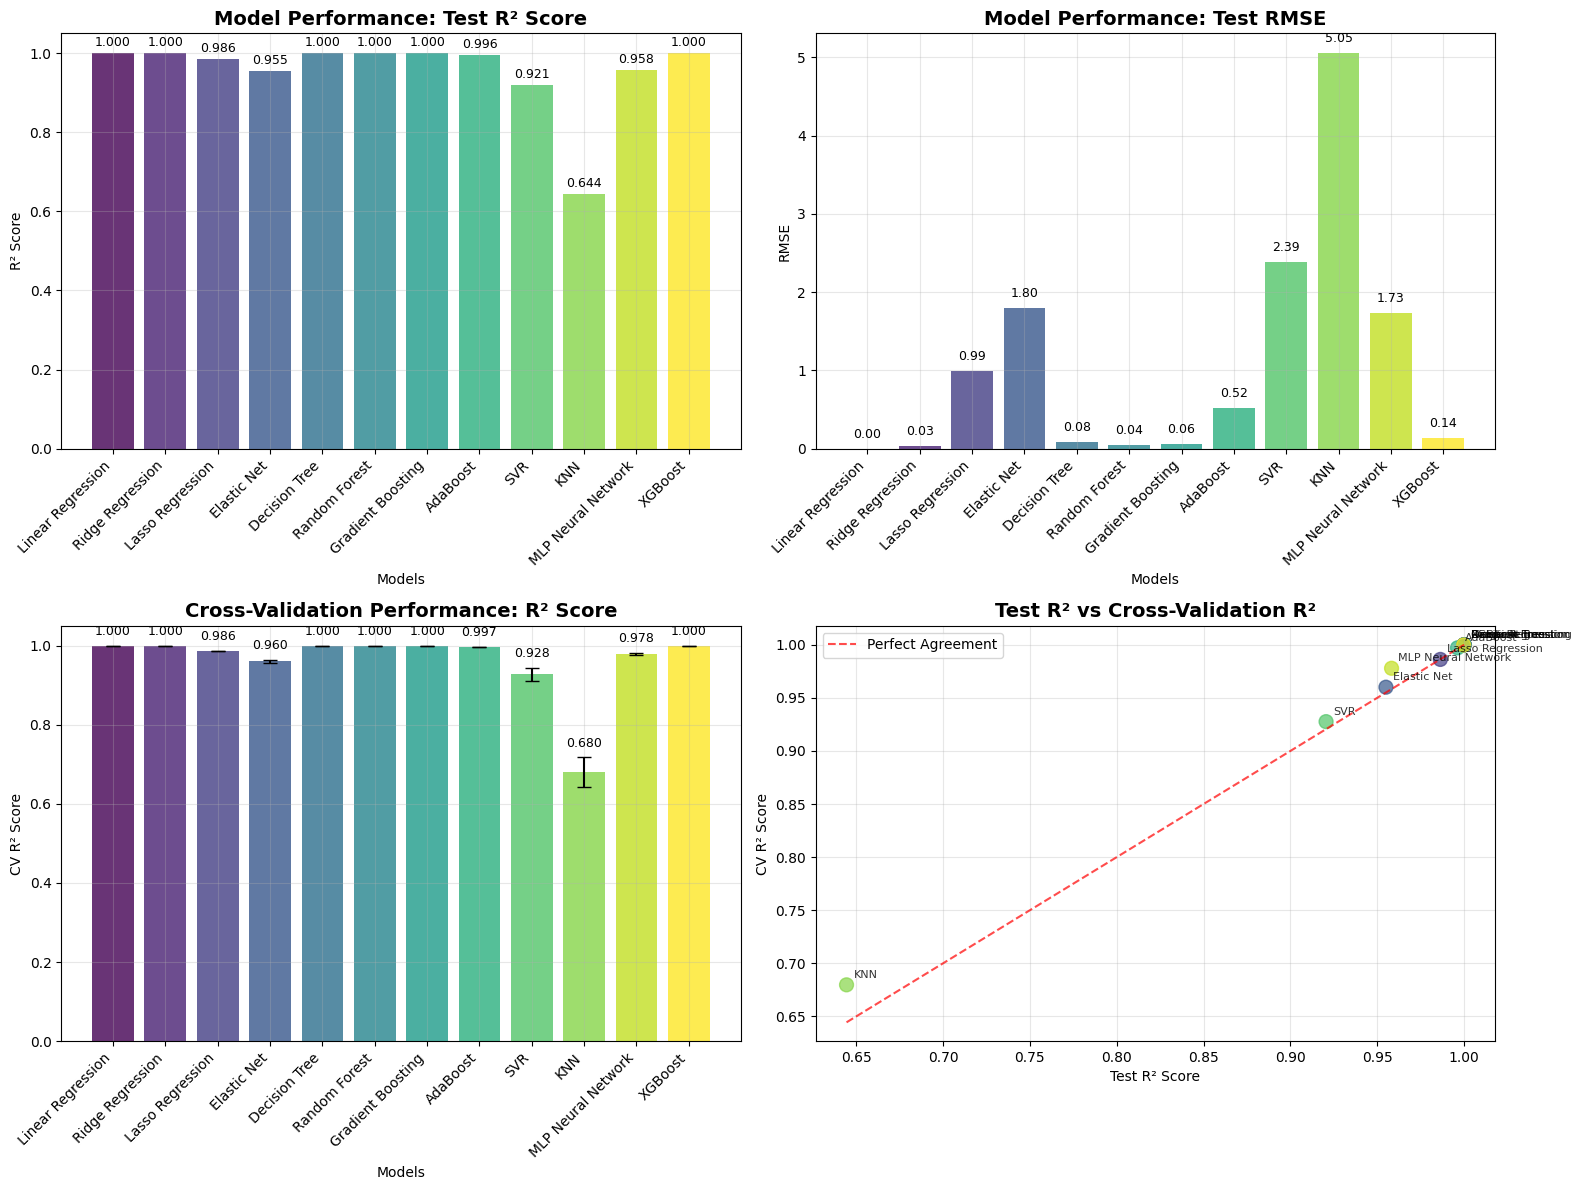

In [83]:

def create_model_comparison_plots(results, cv_results):
    """Create comprehensive plots comparing model performance"""
    print("\n7. Creating model comparison plots...")

    model_names = list(results.keys())
    test_r2_scores = [results[name]['Test R²'] for name in model_names]
    test_rmse_scores = [results[name]['Test RMSE'] for name in model_names]
    cv_r2_scores = [cv_results[name]['CV Mean R²'] if name in cv_results else 0 for name in model_names]
    cv_r2_stds = [cv_results[name]['CV Std R²'] if name in cv_results else 0 for name in model_names]

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))
    bars1 = axes[0, 0].bar(range(len(model_names)), test_r2_scores, color=colors, alpha=0.8)
    axes[0, 0].set_title('Model Performance: Test R² Score', fontweight='bold', fontsize=14)
    axes[0, 0].set_xlabel('Models')
    axes[0, 0].set_ylabel('R² Score')
    axes[0, 0].set_xticks(range(len(model_names)))
    axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
    axes[0, 0].grid(True, alpha=0.3)

    for i, (bar, score) in enumerate(zip(bars1, test_r2_scores)):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{score:.3f}', ha='center', va='bottom', fontsize=9)

    bars2 = axes[0, 1].bar(range(len(model_names)), test_rmse_scores, color=colors, alpha=0.8)
    axes[0, 1].set_title('Model Performance: Test RMSE', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Models')
    axes[0, 1].set_ylabel('RMSE')
    axes[0, 1].set_xticks(range(len(model_names)))
    axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
    axes[0, 1].grid(True, alpha=0.3)

    for i, (bar, score) in enumerate(zip(bars2, test_rmse_scores)):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                       f'{score:.2f}', ha='center', va='bottom', fontsize=9)

    valid_cv_indices = [i for i, name in enumerate(model_names) if name in cv_results]
    valid_cv_names = [model_names[i] for i in valid_cv_indices]
    valid_cv_scores = [cv_r2_scores[i] for i in valid_cv_indices]
    valid_cv_stds = [cv_r2_stds[i] for i in valid_cv_indices]

    if valid_cv_indices:
        bars3 = axes[1, 0].bar(range(len(valid_cv_names)), valid_cv_scores,
                              yerr=valid_cv_stds, capsize=5, color=colors[:len(valid_cv_names)], alpha=0.8)
        axes[1, 0].set_title('Cross-Validation Performance: R² Score', fontweight='bold', fontsize=14)
        axes[1, 0].set_xlabel('Models')
        axes[1, 0].set_ylabel('CV R² Score')
        axes[1, 0].set_xticks(range(len(valid_cv_names)))
        axes[1, 0].set_xticklabels(valid_cv_names, rotation=45, ha='right')
        axes[1, 0].grid(True, alpha=0.3)

        for i, (bar, score, std) in enumerate(zip(bars3, valid_cv_scores, valid_cv_stds)):
            axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.02,
                           f'{score:.3f}', ha='center', va='bottom', fontsize=9)

    test_scores_for_scatter = [test_r2_scores[i] for i in valid_cv_indices]
    scatter = axes[1, 1].scatter(test_scores_for_scatter, valid_cv_scores,
                                s=100, c=range(len(valid_cv_names)), cmap='viridis', alpha=0.7)
    axes[1, 1].set_title('Test R² vs Cross-Validation R²', fontweight='bold', fontsize=14)
    axes[1, 1].set_xlabel('Test R² Score')
    axes[1, 1].set_ylabel('CV R² Score')
    axes[1, 1].grid(True, alpha=0.3)

    min_score = min(min(test_scores_for_scatter), min(valid_cv_scores))
    max_score = max(max(test_scores_for_scatter), max(valid_cv_scores))
    axes[1, 1].plot([min_score, max_score], [min_score, max_score], 'r--', alpha=0.7, label='Perfect Agreement')
    axes[1, 1].legend()

    for i, name in enumerate(valid_cv_names):
        axes[1, 1].annotate(name, (test_scores_for_scatter[i], valid_cv_scores[i]),
                           xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

    plt.tight_layout()
    plt.show()

create_model_comparison_plots(results, cv_results)


## 9: Detailed Performance Plots


8. Creating detailed performance plots...


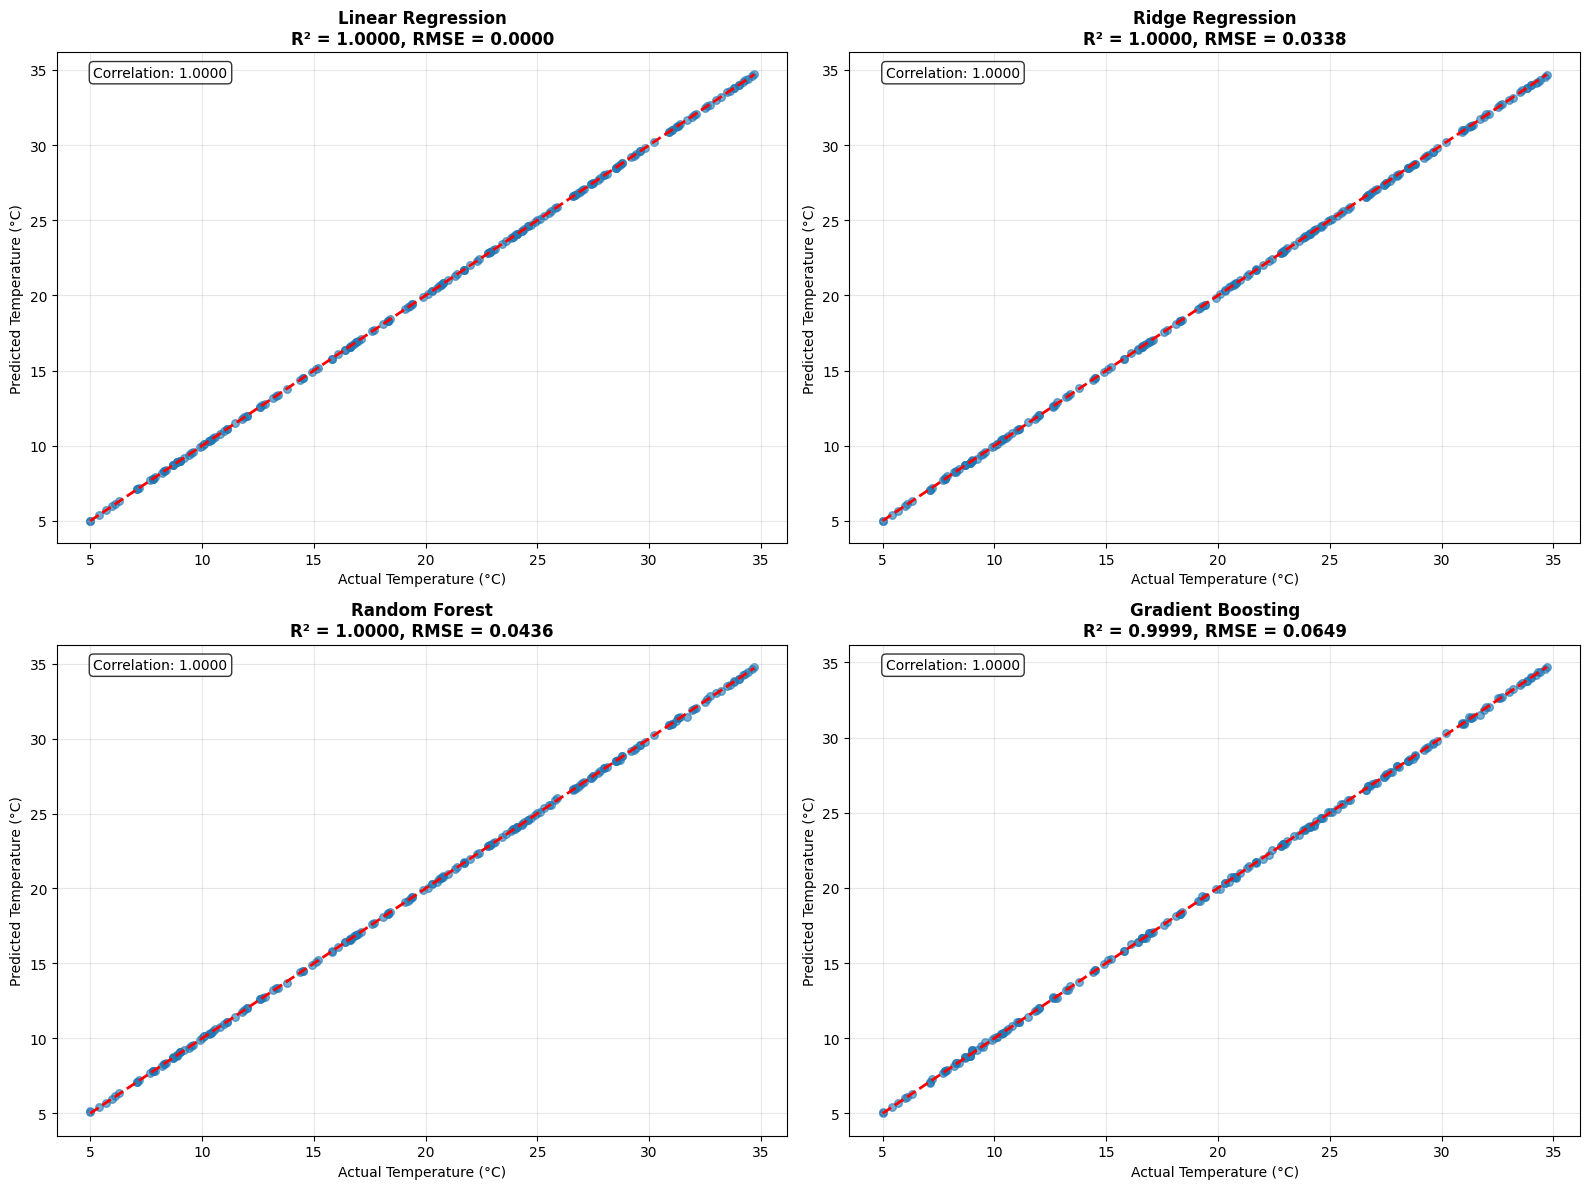

In [85]:

def create_detailed_performance_plots(results, model_objects, X_test, y_test, X_test_scaled):
    """Create detailed performance plots for top models"""
    print("\n8. Creating detailed performance plots...")

    top_models = sorted(results.items(), key=lambda x: x[1]['Test R²'], reverse=True)[:4]

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    scaled_models = ['Ridge Regression', 'Lasso Regression', 'Elastic Net', 'SVR', 'KNN', 'MLP Neural Network']

    for i, (model_name, metrics) in enumerate(top_models):
        row, col = i // 2, i % 2

        model = model_objects[model_name]
        if model_name in scaled_models:
            y_pred = model.predict(X_test_scaled)
        else:
            y_pred = model.predict(X_test)

        axes[row, col].scatter(y_test, y_pred, alpha=0.6, s=30)
        axes[row, col].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[row, col].set_title(f'{model_name}\nR² = {metrics["Test R²"]:.4f}, RMSE = {metrics["Test RMSE"]:.4f}',
                                fontweight='bold')
        axes[row, col].set_xlabel('Actual Temperature (°C)')
        axes[row, col].set_ylabel('Predicted Temperature (°C)')
        axes[row, col].grid(True, alpha=0.3)

        correlation = np.corrcoef(y_test, y_pred)[0, 1]
        axes[row, col].text(0.05, 0.95, f'Correlation: {correlation:.4f}',
                           transform=axes[row, col].transAxes,
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

create_detailed_performance_plots(results, model_objects, X_test, y_test, X_test_scaled)


## 10: Learning Curves


9. Creating learning curves...
   Computing learning curve for Random Forest...
   Computing learning curve for Gradient Boosting...
   Computing learning curve for XGBoost...
   Computing learning curve for Linear Regression...


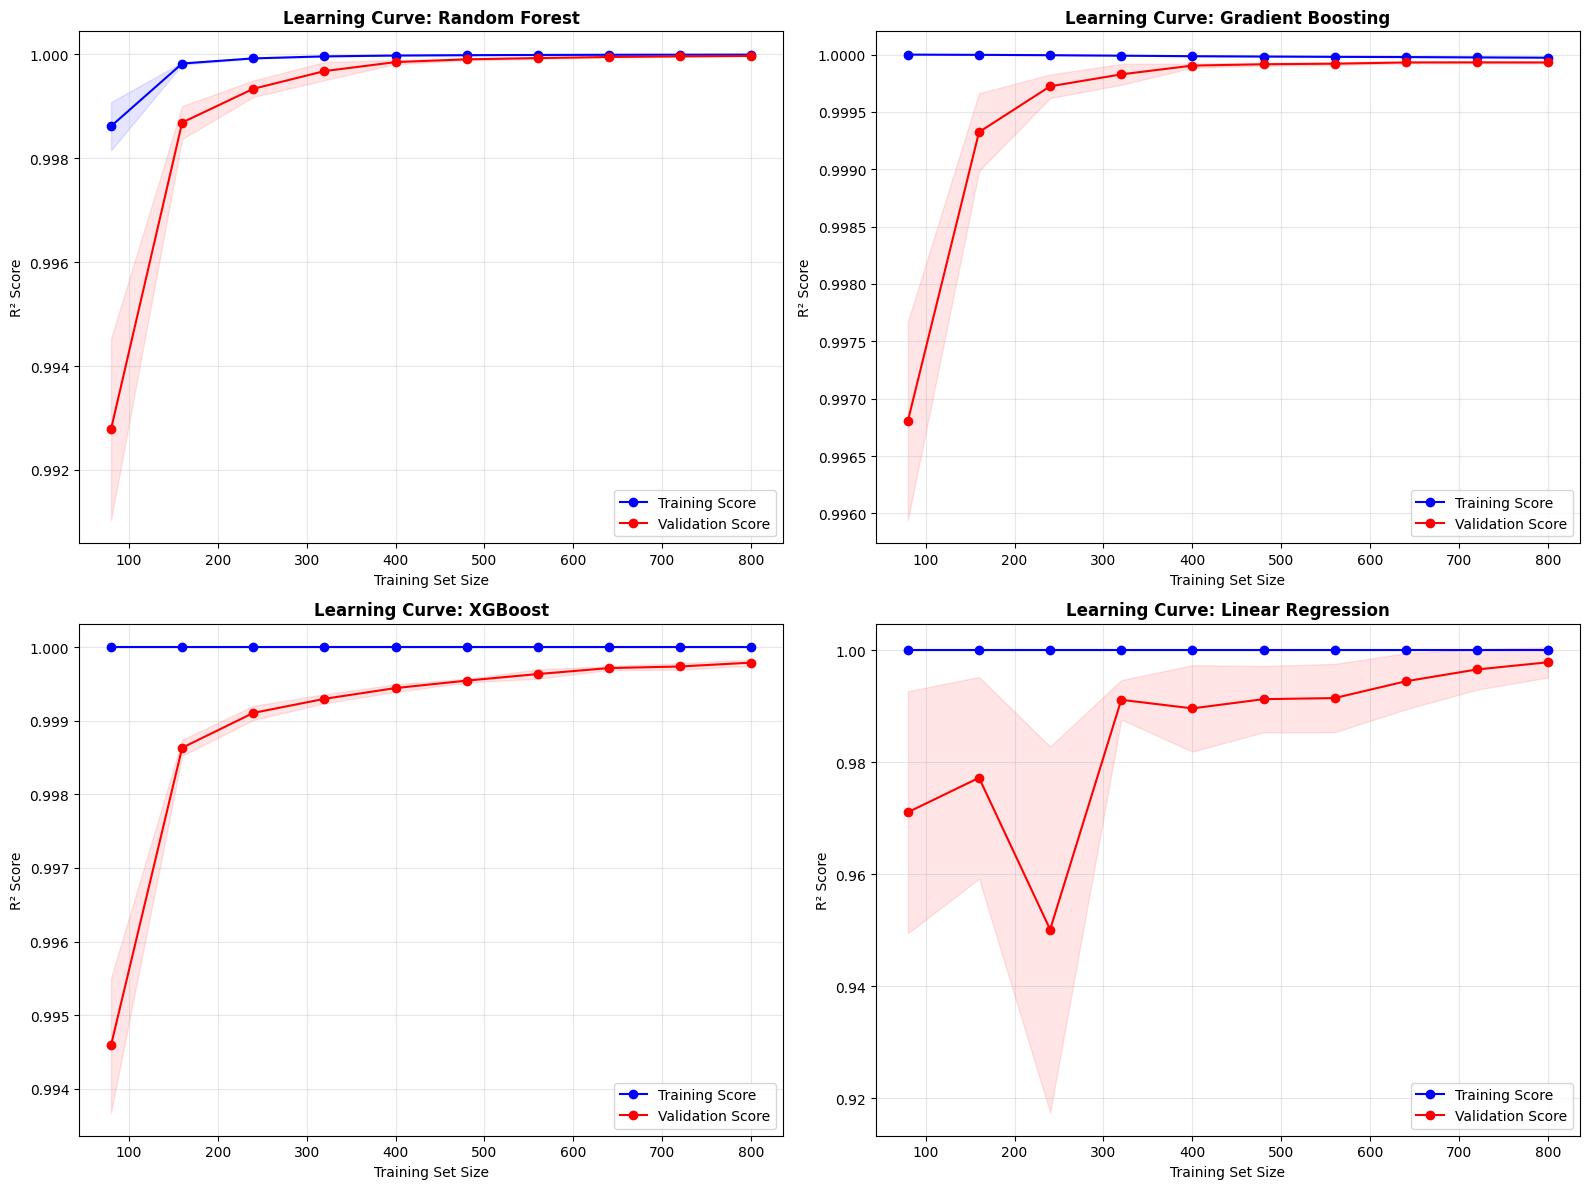

In [86]:


def create_learning_curves(models, X, y, X_scaled):
    """Create learning curves for top models"""
    print("\n9. Creating learning curves...")

    top_model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Linear Regression']
    available_models = {name: models[name] for name in top_model_names if name in models}

    if len(available_models) == 0:
        available_models = dict(list(models.items())[:4])

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    scaled_models = ['Ridge Regression', 'Lasso Regression', 'Elastic Net', 'SVR', 'KNN', 'MLP Neural Network']

    for i, (name, model) in enumerate(available_models.items()):
        row, col = i // 2, i % 2

        print(f"   Computing learning curve for {name}...")

        try:
            X_lc = X_scaled if name in scaled_models else X

            train_sizes, train_scores, val_scores = learning_curve(
                model, X_lc, y, cv=5, n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 10),
                scoring='r2', random_state=42
            )

            train_scores_mean = np.mean(train_scores, axis=1)
            train_scores_std = np.std(train_scores, axis=1)
            val_scores_mean = np.mean(val_scores, axis=1)
            val_scores_std = np.std(val_scores, axis=1)

            axes[row, col].plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
            axes[row, col].fill_between(train_sizes, train_scores_mean - train_scores_std,
                                      train_scores_mean + train_scores_std, alpha=0.1, color='blue')

            axes[row, col].plot(train_sizes, val_scores_mean, 'o-', color='red', label='Validation Score')
            axes[row, col].fill_between(train_sizes, val_scores_mean - val_scores_std,
                                      val_scores_mean + val_scores_std, alpha=0.1, color='red')

            axes[row, col].set_title(f'Learning Curve: {name}', fontweight='bold')
            axes[row, col].set_xlabel('Training Set Size')
            axes[row, col].set_ylabel('R² Score')
            axes[row, col].legend()
            axes[row, col].grid(True, alpha=0.3)

        except Exception as e:
            print(f"      ✗ Error computing learning curve for {name}: {str(e)}")
            axes[row, col].text(0.5, 0.5, f'Error computing\nlearning curve for\n{name}',
                              ha='center', va='center', transform=axes[row, col].transAxes)

    plt.tight_layout()
    plt.show()

create_learning_curves(models, X, y, X_scaled)

## 11: Model Selection Report

In [87]:

def generate_model_selection_report(results, cv_results):
    """Generate comprehensive model selection report"""
    print("\n" + "="*60)
    print("MODEL SELECTION REPORT")
    print("="*60)

    df_results = pd.DataFrame(results).T
    df_results = df_results.round(4)

    print("\nModel Performance Summary:")
    print("-" * 80)
    print(f"{'Model':<20} {'Test R²':<10} {'Test RMSE':<12} {'Train R²':<10} {'CV R² Mean':<12}")
    print("-" * 80)

    for model_name in df_results.index:
        test_r2 = df_results.loc[model_name, 'Test R²']
        test_rmse = df_results.loc[model_name, 'Test RMSE']
        train_r2 = df_results.loc[model_name, 'Train R²']
        cv_r2 = cv_results[model_name]['CV Mean R²'] if model_name in cv_results else 'N/A'

        print(f"{model_name:<20} {test_r2:<10.4f} {test_rmse:<12.4f} {train_r2:<10.4f} {cv_r2 if cv_r2 == 'N/A' else f'{cv_r2:.4f}':<12}")

    best_r2 = df_results['Test R²'].idxmax()
    best_rmse = df_results['Test RMSE'].idxmin()

    print(f"\nBest Models:")
    print(f"  Best R² Score: {best_r2} (R² = {df_results.loc[best_r2, 'Test R²']:.4f})")
    print(f"  Best RMSE: {best_rmse} (RMSE = {df_results.loc[best_rmse, 'Test RMSE']:.4f})")

    linear_models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net']
    tree_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'AdaBoost']
    other_models = ['SVR', 'KNN', 'MLP Neural Network']

    print(f"\nPerformance by Model Category:")
    for category, model_list in [('Linear Models', linear_models),
                                ('Tree-based Models', tree_models),
                                ('Other Models', other_models)]:
        category_models = [m for m in model_list if m in df_results.index]
        if category_models:
            avg_r2 = df_results.loc[category_models, 'Test R²'].mean()
            avg_rmse = df_results.loc[category_models, 'Test RMSE'].mean()
            print(f"  {category}: Avg R² = {avg_r2:.4f}, Avg RMSE = {avg_rmse:.4f}")

    print(f"\nOverfitting Analysis (Train R² - Test R²):")
    overfitting_scores = df_results['Train R²'] - df_results['Test R²']
    sorted_overfitting = overfitting_scores.sort_values()

    print("  Models with least overfitting:")
    for i, (model, diff) in enumerate(sorted_overfitting.head(3).items()):
        print(f"    {i+1}. {model}: {diff:.4f}")

    print("  Models with most overfitting:")
    for i, (model, diff) in enumerate(sorted_overfitting.tail(3).items()):
        print(f"    {i+1}. {model}: {diff:.4f}")

    if cv_results:
        print(f"\nCross-Validation Consistency (lower std = more consistent):")
        cv_consistency = sorted([(name, data['CV Std R²']) for name, data in cv_results.items()],
                               key=lambda x: x[1])

        print("  Most consistent models:")
        for i, (model, std) in enumerate(cv_consistency[:3]):
            print(f"    {i+1}. {model}: {std:.4f}")

    print(f"\nRecommendations:")

    balanced_scores = {}
    for model in df_results.index:
        test_r2 = df_results.loc[model, 'Test R²']
        overfitting = overfitting_scores[model]
        cv_std = cv_results[model]['CV Std R²'] if model in cv_results else 0.1

        balanced_score = test_r2 - (overfitting * 0.5) - (cv_std * 0.3)
        balanced_scores[model] = balanced_score

    best_balanced = sorted(balanced_scores.items(), key=lambda x: x[1], reverse=True)

    print(f"  Top 3 models for production (balanced performance):")
    for i, (model, score) in enumerate(best_balanced[:3]):
        test_r2 = df_results.loc[model, 'Test R²']
        print(f"    {i+1}. {model} (Test R² = {test_r2:.4f})")

    print(f"  For high accuracy: {best_r2} (R² = {df_results.loc[best_r2, 'Test R²']:.4f})")
    print(f"  For low error: {best_rmse} (RMSE = {df_results.loc[best_rmse, 'Test RMSE']:.4f})")

    interpretable_models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']
    best_interpretable = None
    best_interpretable_score = -1

    for model in interpretable_models:
        if model in df_results.index:
            score = df_results.loc[model, 'Test R²']
            if score > best_interpretable_score:
                best_interpretable_score = score
                best_interpretable = model

    if best_interpretable:
        print(f"  For interpretability: {best_interpretable} (R² = {best_interpretable_score:.4f})")

    print(f"\n✓ Model selection analysis completed!")
    print(f"✓ {len(df_results)} models evaluated")
    print(f"✓ Best overall model: {best_balanced[0][0]}")
generate_model_selection_report(results, cv_results)



MODEL SELECTION REPORT

Model Performance Summary:
--------------------------------------------------------------------------------
Model                Test R²    Test RMSE    Train R²   CV R² Mean  
--------------------------------------------------------------------------------
Linear Regression    1.0000     0.0000       1.0000     1.0000      
Ridge Regression     1.0000     0.0338       1.0000     1.0000      
Lasso Regression     0.9863     0.9920       0.9863     0.9861      
Elastic Net          0.9550     1.7988       0.9612     0.9600      
Decision Tree        0.9999     0.0831       1.0000     0.9999      
Random Forest        1.0000     0.0436       1.0000     1.0000      
Gradient Boosting    0.9999     0.0649       1.0000     0.9999      
AdaBoost             0.9962     0.5230       0.9963     0.9970      
SVR                  0.9205     2.3900       0.9505     0.9276      
KNN                  0.6444     5.0550       0.8002     0.6797      
MLP Neural Network   0.9582

----

# 6: Hyperparameter Turning

HYPERPARAMETER TUNING

1. Loading dataset for hyperparameter tuning...
✓ Loaded original dataset with shape: (1000, 10)

2. Preparing data for tuning...
   ✓ Features prepared: 7 features
   ✓ Training set: 800 samples
   ✓ Test set: 200 samples

4. Performing Grid Search tuning (optimized)...

3. Defining hyperparameter search spaces (optimized)...
   ✓ Defined parameter grids for 8 models (optimized)
      Ridge: 4 combinations
      Lasso: 4 combinations
      ElasticNet: 9 combinations
      RandomForest: 72 combinations
      GradientBoosting: 54 combinations
      XGBoost: 108 combinations
      SVR: 9 combinations
      KNN: 8 combinations
   Tuning Ridge...
      ✓ Best CV R²: -0.0226
      ✓ Best params: {'alpha': 100.0}
   Tuning Lasso...
      ✓ Best CV R²: -0.0027
      ✓ Best params: {'alpha': 1.0}
   Tuning ElasticNet...
      ✓ Best CV R²: -0.0027
      ✓ Best params: {'alpha': 10.0, 'l1_ratio': 0.3}
   Tuning RandomForest...
      ✓ Best CV R²: -0.0679
      ✓ Best para

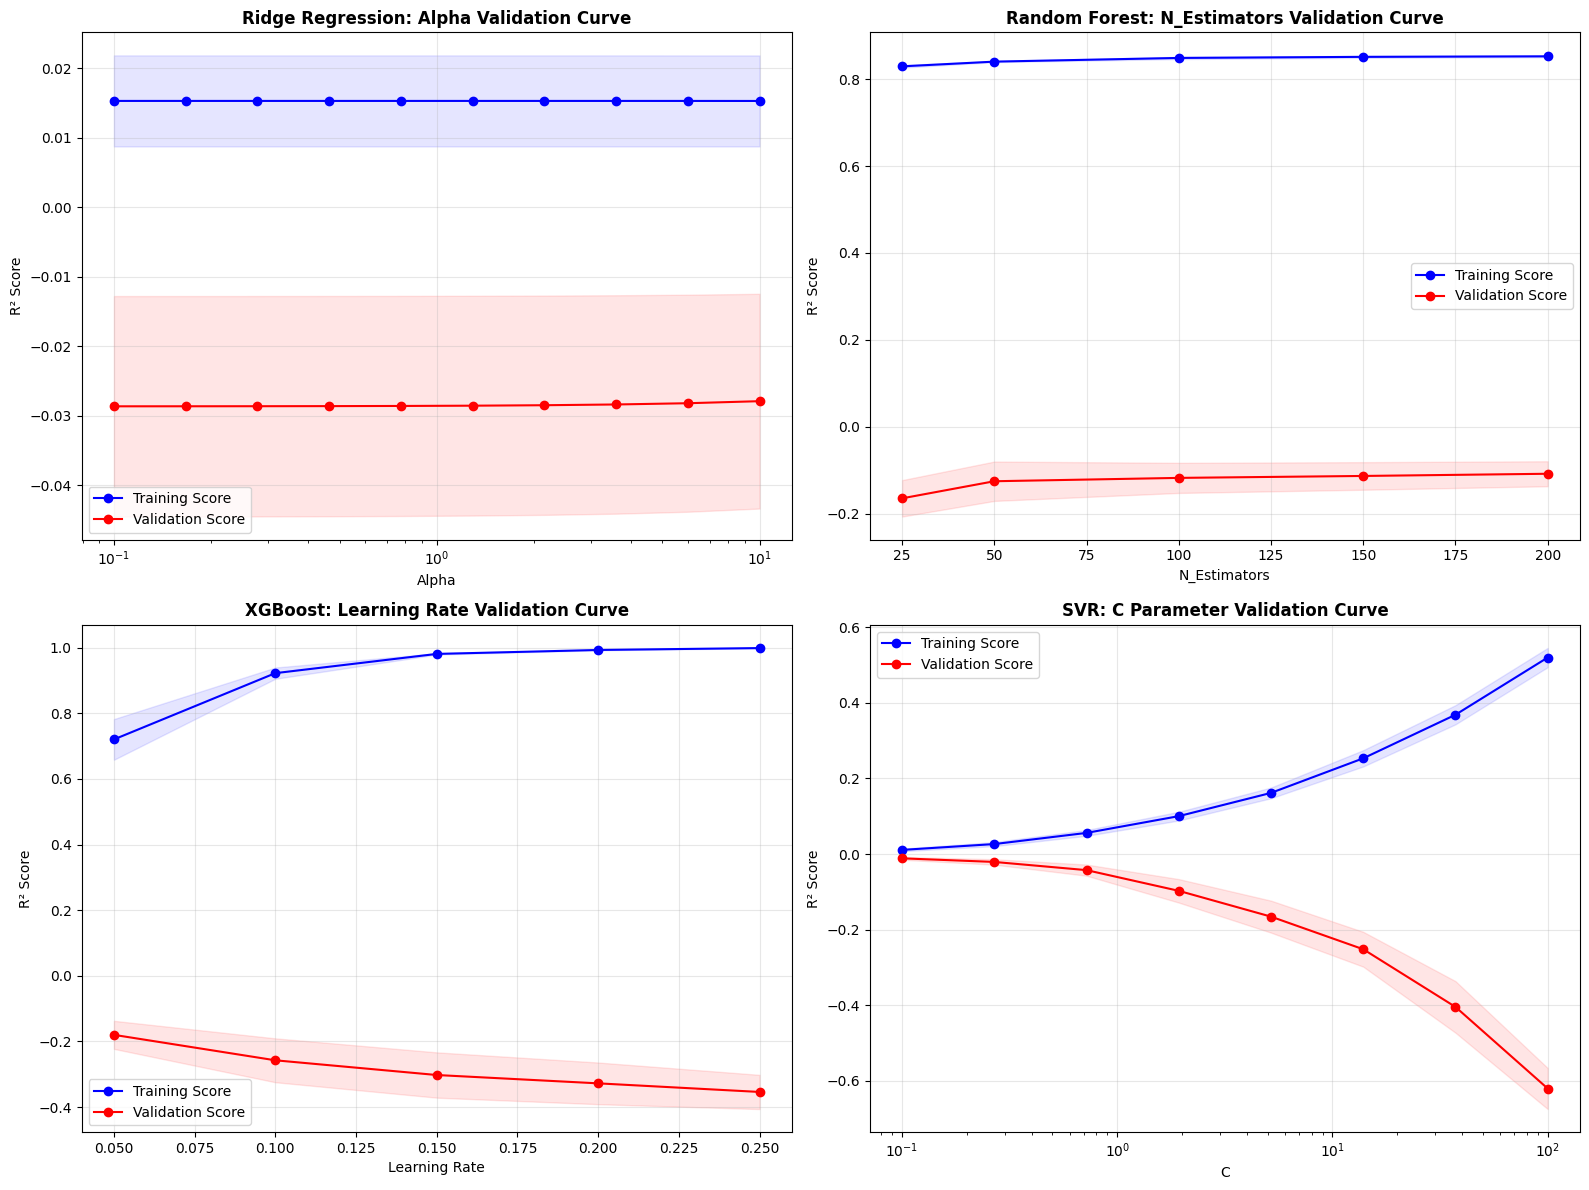

✓ Validation curves displayed (optimized)

8. Creating hyperparameter tuning comparison plots...


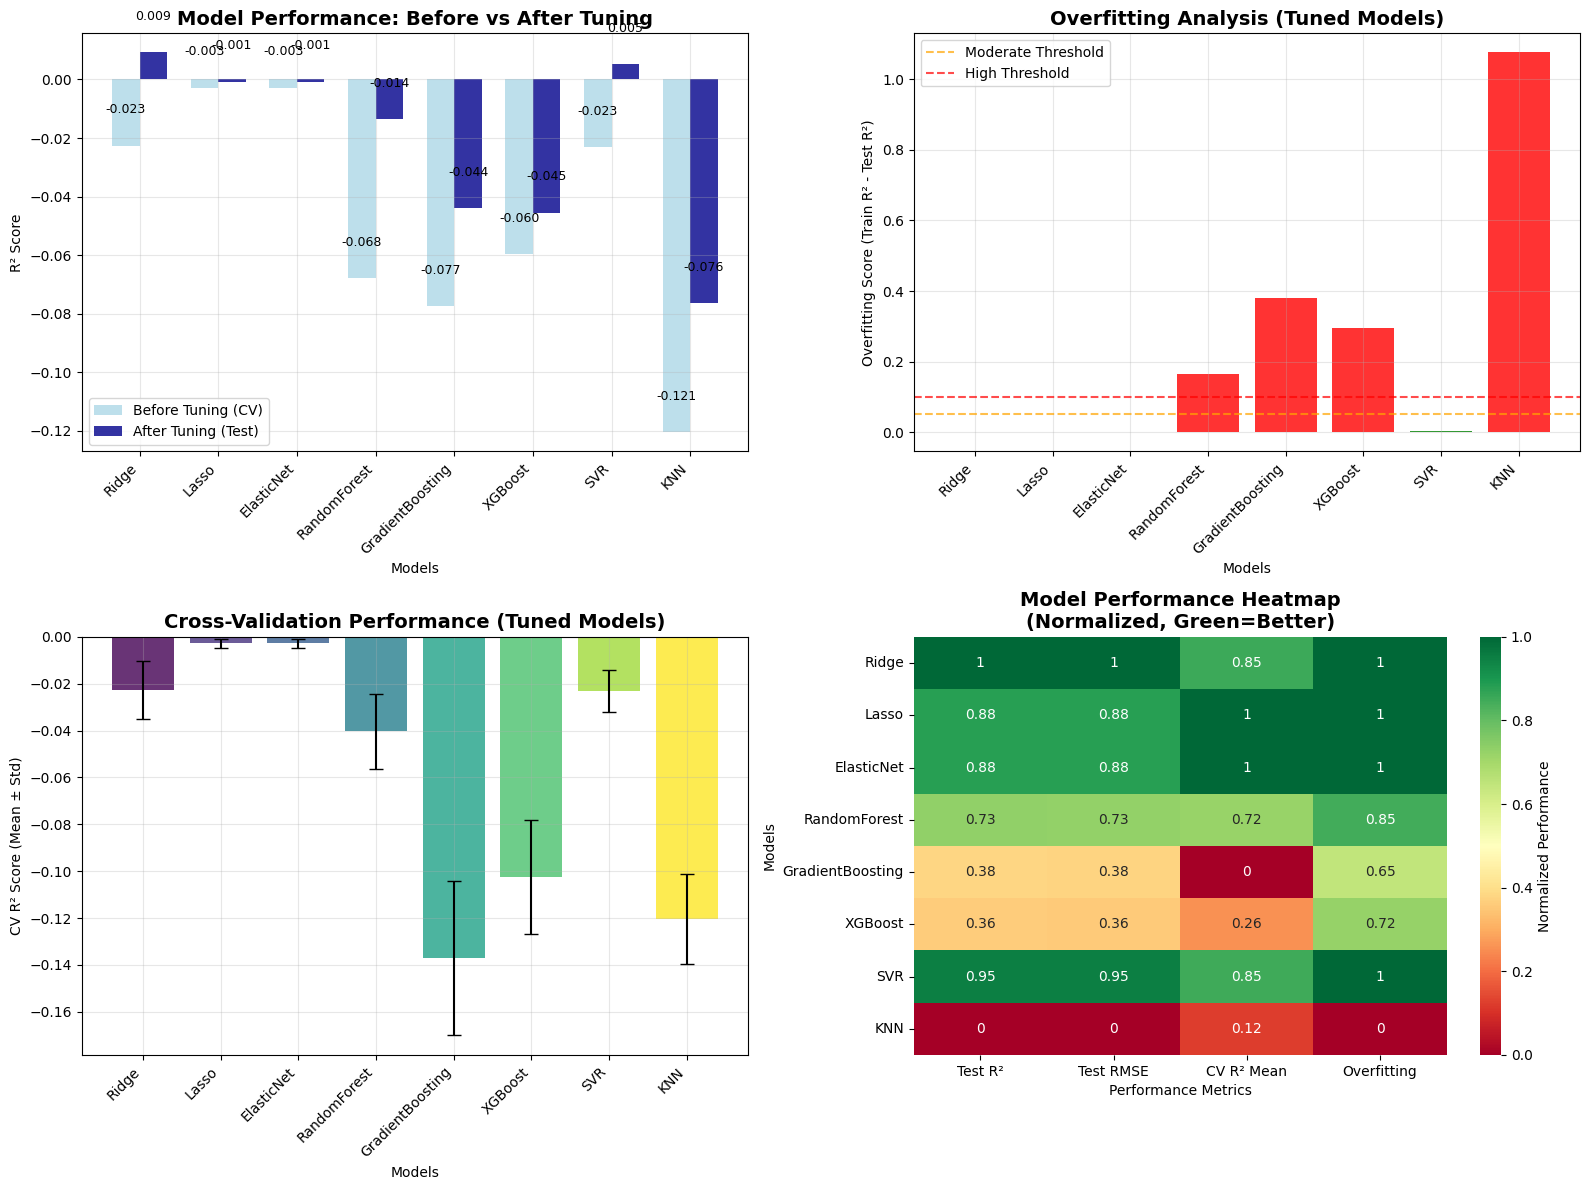

✓ Hyperparameter tuning comparison plots displayed

HYPERPARAMETER TUNING REPORT

Tuning Summary:
  Grid Search models: 8
  Random Search models: 3
  Total tuned models: 8

Best Tuned Model:
  Model: Ridge
  Test R²: 0.0093
  Test RMSE: 8.2849
  CV R² Mean: -0.0226 (±0.0125)
  Overfitting: -0.0010

Model Rankings by Test R²:
--------------------------------------------------------------------------------
Rank   Model                Test R²    Test RMSE    CV R²      Overfitting 
--------------------------------------------------------------------------------
1      Ridge                0.0093     8.2849       -0.0226    -0.0010     
2      SVR                  0.0052     8.3019       -0.0232    0.0024      
3      Lasso                -0.0008    8.3268       -0.0027    0.0008      
4      ElasticNet           -0.0008    8.3268       -0.0027    0.0008      
5      RandomForest         -0.0136    8.3801       -0.0404    0.1651      
6      GradientBoosting     -0.0439    8.5042       -0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import cross_val_score, validation_curve
import warnings
from scipy.stats import uniform, randint

warnings.filterwarnings('ignore')

def load_model_data():
    """Load data for hyperparameter tuning"""
    print("="*60)
    print("HYPERPARAMETER TUNING")
    print("="*60)

    print("\n1. Loading dataset for hyperparameter tuning...")

    try:
        df = pd.read_csv('climate_data_engineered.csv')
        print(f"✓ Loaded engineered dataset with shape: {df.shape}")
    except FileNotFoundError:
        try:
            df = pd.read_csv('climate_data_cleaned.csv')
            print(f"✓ Loaded cleaned dataset with shape: {df.shape}")
        except FileNotFoundError:
            df = pd.read_csv('climate_change_dataset.csv')
            print(f"✓ Loaded original dataset with shape: {df.shape}")

    return df

def prepare_data_for_tuning(df):
    """Prepare data for hyperparameter tuning"""
    print("\n2. Preparing data for tuning...")

    target_column = 'Avg Temperature (°C)'

    exclude_columns = ['Country', 'Year', target_column]
    feature_columns = []

    for col in df.columns:
        if col not in exclude_columns:
            if df[col].dtype in ['int64', 'float64']:
                feature_columns.append(col)
            elif df[col].dtype == 'object':
                try:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
                    if not df[col].isna().all():
                        feature_columns.append(col)
                except:
                    continue

    X = df[feature_columns].copy()
    y = df[target_column].copy()

    for col in X.columns:
        if X[col].isna().sum() > 0:
            X[col].fillna(X[col].median(), inplace=True)

    mask = ~y.isna()
    X = X[mask]
    y = y[mask]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"   ✓ Features prepared: {len(feature_columns)} features")
    print(f"   ✓ Training set: {X_train.shape[0]} samples")
    print(f"   ✓ Test set: {X_test.shape[0]} samples")

    return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler, feature_columns

def define_hyperparameter_spaces():
    """Define hyperparameter search spaces for different models (optimized for speed)"""
    print("\n3. Defining hyperparameter search spaces (optimized)...")

    param_grids = {
        'Ridge': {
            'alpha': [0.1, 1.0, 10.0, 100.0]
        },

        'Lasso': {
            'alpha': [0.01, 0.1, 1.0, 10.0]
        },

        'ElasticNet': {
            'alpha': [0.1, 1.0, 10.0],
            'l1_ratio': [0.3, 0.5, 0.7]
        },

        'RandomForest': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', None]
        },

        'GradientBoosting': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5]
        },

        'XGBoost': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_child_weight': [1, 3],
            'subsample': [0.8, 1.0]
        },

        'SVR': {
            'C': [1, 10, 100],
            'gamma': ['scale', 0.01, 0.1],
            'kernel': ['rbf']
        },

        'KNN': {
            'n_neighbors': [3, 5, 7, 11],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto']
        }

    }

    print(f"   ✓ Defined parameter grids for {len(param_grids)} models (optimized)")
    for model_name, params in param_grids.items():
        param_count = np.prod([len(v) for v in params.values()])
        print(f"      {model_name}: {param_count:,} combinations")

    return param_grids

def perform_grid_search_tuning(X_train, y_train, X_train_scaled):
    """Perform grid search hyperparameter tuning (optimized)"""
    print("\n4. Performing Grid Search tuning (optimized)...")

    models = {
        'Ridge': Ridge(random_state=42),
        'Lasso': Lasso(random_state=42),
        'ElasticNet': ElasticNet(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42, n_jobs=1),  # Limit n_jobs for RF
        'GradientBoosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': xgb.XGBRegressor(random_state=42, n_jobs=1),  # Limit n_jobs for XGB
        'SVR': SVR(),
        'KNN': KNeighborsRegressor()
    }

    param_grids = define_hyperparameter_spaces()

    scaled_models = ['Ridge', 'Lasso', 'ElasticNet', 'SVR', 'KNN']

    grid_search_results = {}
    tuned_models = {}

    for model_name, model in models.items():
        if model_name in param_grids:
            print(f"   Tuning {model_name}...")

            try:
                X_data = X_train_scaled if model_name in scaled_models else X_train

                grid_search = GridSearchCV(
                    model, param_grids[model_name],
                    cv=3, scoring='r2', n_jobs=-1, verbose=0  # Reduced CV from 5 to 3
                )

                grid_search.fit(X_data, y_train)

                grid_search_results[model_name] = {
                    'best_score': grid_search.best_score_,
                    'best_params': grid_search.best_params_,
                    'cv_results': grid_search.cv_results_
                }

                tuned_models[model_name] = grid_search.best_estimator_

                print(f"      ✓ Best CV R²: {grid_search.best_score_:.4f}")
                print(f"      ✓ Best params: {grid_search.best_params_}")

            except Exception as e:
                print(f"      ✗ Error tuning {model_name}: {str(e)}")
                continue

    print(f"\n   ✓ Grid search completed for {len(grid_search_results)} models")
    return grid_search_results, tuned_models

def perform_random_search_tuning(X_train, y_train, X_train_scaled):
    """Perform random search hyperparameter tuning (optimized)"""
    print("\n5. Performing Random Search tuning (optimized)...")

    random_param_dists = {
        'RandomForest': {
            'n_estimators': randint(50, 200),
            'max_depth': [None] + list(range(5, 20)),
            'min_samples_split': randint(2, 10),
            'min_samples_leaf': randint(1, 5),
            'max_features': ['sqrt', 'log2', None]
        },

        'GradientBoosting': {
            'n_estimators': randint(50, 200),
            'learning_rate': uniform(0.05, 0.25),
            'max_depth': randint(3, 10),
            'min_samples_split': randint(2, 10),
            'min_samples_leaf': randint(1, 5)
        },

        'XGBoost': {
            'n_estimators': randint(50, 200),
            'learning_rate': uniform(0.05, 0.25),
            'max_depth': randint(3, 10),
            'min_child_weight': randint(1, 5),
            'subsample': uniform(0.8, 0.2),
            'colsample_bytree': uniform(0.8, 0.2)
        }
    }

    models = {
        'RandomForest': RandomForestRegressor(random_state=42, n_jobs=1),
        'GradientBoosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': xgb.XGBRegressor(random_state=42, n_jobs=1)
    }

    random_search_results = {}
    random_tuned_models = {}

    for model_name, model in models.items():
        if model_name in random_param_dists:
            print(f"   Random search for {model_name}...")

            try:
                random_search = RandomizedSearchCV(
                    model, random_param_dists[model_name],
                    n_iter=20, cv=3, scoring='r2',
                    random_state=42, n_jobs=-1, verbose=0
                )

                random_search.fit(X_train, y_train)

                random_search_results[model_name] = {
                    'best_score': random_search.best_score_,
                    'best_params': random_search.best_params_,
                    'cv_results': random_search.cv_results_
                }

                random_tuned_models[model_name] = random_search.best_estimator_

                print(f"      ✓ Best CV R²: {random_search.best_score_:.4f}")
                print(f"      ✓ Best params: {random_search.best_params_}")

            except Exception as e:
                print(f"      ✗ Error in random search for {model_name}: {str(e)}")
                continue

    print(f"\n   ✓ Random search completed for {len(random_search_results)} models")
    return random_search_results, random_tuned_models

def evaluate_tuned_models(tuned_models, random_tuned_models, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled):
    """Evaluate all tuned models"""
    print("\n6. Evaluating tuned models...")

    all_tuned_models = {**tuned_models, **random_tuned_models}

    scaled_models = ['Ridge', 'Lasso', 'ElasticNet', 'SVR', 'KNN']

    tuned_results = {}

    for model_name, model in all_tuned_models.items():
        print(f"   Evaluating tuned {model_name}...")

        try:
            if model_name in scaled_models:
                X_tr, X_te = X_train_scaled, X_test_scaled
            else:
                X_tr, X_te = X_train, X_test

            y_pred_train = model.predict(X_tr)
            y_pred_test = model.predict(X_te)

            train_r2 = r2_score(y_train, y_pred_train)
            test_r2 = r2_score(y_test, y_pred_test)
            train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
            train_mae = mean_absolute_error(y_train, y_pred_train)
            test_mae = mean_absolute_error(y_test, y_pred_test)

            cv_scores = cross_val_score(model, X_tr, y_train, cv=3, scoring='r2')  # Reduced from 5 to 3

            tuned_results[model_name] = {
                'Train R²': train_r2,
                'Test R²': test_r2,
                'Train RMSE': train_rmse,
                'Test RMSE': test_rmse,
                'Train MAE': train_mae,
                'Test MAE': test_mae,
                'CV R² Mean': cv_scores.mean(),
                'CV R² Std': cv_scores.std(),
                'Overfitting': train_r2 - test_r2
            }

            print(f"      ✓ Test R²: {test_r2:.4f}, RMSE: {test_rmse:.4f}")

        except Exception as e:
            print(f"      ✗ Error evaluating {model_name}: {str(e)}")
            continue

    print(f"\n   ✓ Evaluated {len(tuned_results)} tuned models")
    return tuned_results

def create_validation_curves(X_train, y_train, X_train_scaled):
    """Create validation curves for key hyperparameters (optimized)"""
    print("\n7. Creating validation curves (optimized)...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    print("   Computing Ridge alpha validation curve...")
    try:
        ridge_alphas = np.logspace(-1, 1, 10)
        train_scores, val_scores = validation_curve(
            Ridge(random_state=42), X_train_scaled, y_train,
            param_name='alpha', param_range=ridge_alphas,
            cv=3, scoring='r2', n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        axes[0, 0].semilogx(ridge_alphas, train_mean, 'o-', color='blue', label='Training Score')
        axes[0, 0].fill_between(ridge_alphas, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
        axes[0, 0].semilogx(ridge_alphas, val_mean, 'o-', color='red', label='Validation Score')
        axes[0, 0].fill_between(ridge_alphas, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
        axes[0, 0].set_title('Ridge Regression: Alpha Validation Curve', fontweight='bold')
        axes[0, 0].set_xlabel('Alpha')
        axes[0, 0].set_ylabel('R² Score')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
    except Exception as e:
        axes[0, 0].text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', transform=axes[0, 0].transAxes)

    print("   Computing Random Forest n_estimators validation curve...")
    try:
        rf_n_estimators = [25, 50, 100, 150, 200]
        train_scores, val_scores = validation_curve(
            RandomForestRegressor(random_state=42, n_jobs=1), X_train, y_train,
            param_name='n_estimators', param_range=rf_n_estimators,
            cv=3, scoring='r2', n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        axes[0, 1].plot(rf_n_estimators, train_mean, 'o-', color='blue', label='Training Score')
        axes[0, 1].fill_between(rf_n_estimators, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
        axes[0, 1].plot(rf_n_estimators, val_mean, 'o-', color='red', label='Validation Score')
        axes[0, 1].fill_between(rf_n_estimators, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
        axes[0, 1].set_title('Random Forest: N_Estimators Validation Curve', fontweight='bold')
        axes[0, 1].set_xlabel('N_Estimators')
        axes[0, 1].set_ylabel('R² Score')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
    except Exception as e:
        axes[0, 1].text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', transform=axes[0, 1].transAxes)

    print("   Computing XGBoost learning_rate validation curve...")
    try:
        xgb_learning_rates = [0.05, 0.1, 0.15, 0.2, 0.25]
        train_scores, val_scores = validation_curve(
            xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=1), X_train, y_train,
            param_name='learning_rate', param_range=xgb_learning_rates,
            cv=3, scoring='r2', n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        axes[1, 0].plot(xgb_learning_rates, train_mean, 'o-', color='blue', label='Training Score')
        axes[1, 0].fill_between(xgb_learning_rates, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
        axes[1, 0].plot(xgb_learning_rates, val_mean, 'o-', color='red', label='Validation Score')
        axes[1, 0].fill_between(xgb_learning_rates, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
        axes[1, 0].set_title('XGBoost: Learning Rate Validation Curve', fontweight='bold')
        axes[1, 0].set_xlabel('Learning Rate')
        axes[1, 0].set_ylabel('R² Score')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
    except Exception as e:
        axes[1, 0].text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', transform=axes[1, 0].transAxes)

    print("   Computing SVR C validation curve...")
    try:
        svr_C_values = np.logspace(-1, 2, 8)
        train_scores, val_scores = validation_curve(
            SVR(kernel='rbf'), X_train_scaled, y_train,
            param_name='C', param_range=svr_C_values,
            cv=3, scoring='r2', n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        axes[1, 1].semilogx(svr_C_values, train_mean, 'o-', color='blue', label='Training Score')
        axes[1, 1].fill_between(svr_C_values, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
        axes[1, 1].semilogx(svr_C_values, val_mean, 'o-', color='red', label='Validation Score')
        axes[1, 1].fill_between(svr_C_values, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
        axes[1, 1].set_title('SVR: C Parameter Validation Curve', fontweight='bold')
        axes[1, 1].set_xlabel('C')
        axes[1, 1].set_ylabel('R² Score')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
    except Exception as e:
        axes[1, 1].text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', transform=axes[1, 1].transAxes)

    plt.tight_layout()
    plt.show()

    print("✓ Validation curves displayed (optimized)")

def create_hyperparameter_comparison_plots(grid_search_results, tuned_results):
    """Create plots comparing hyperparameter tuning results"""
    print("\n8. Creating hyperparameter tuning comparison plots...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    model_names = list(tuned_results.keys())
    test_r2_tuned = [tuned_results[name]['Test R²'] for name in model_names]

    cv_scores_before = []
    for name in model_names:
        if name in grid_search_results:
            cv_scores_before.append(grid_search_results[name]['best_score'])
        else:
            cv_scores_before.append(0.5)

    x = np.arange(len(model_names))
    width = 0.35

    bars1 = axes[0, 0].bar(x - width/2, cv_scores_before, width, label='Before Tuning (CV)', alpha=0.8, color='lightblue')
    bars2 = axes[0, 0].bar(x + width/2, test_r2_tuned, width, label='After Tuning (Test)', alpha=0.8, color='darkblue')

    axes[0, 0].set_title('Model Performance: Before vs After Tuning', fontweight='bold', fontsize=14)
    axes[0, 0].set_xlabel('Models')
    axes[0, 0].set_ylabel('R² Score')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    for bar in bars1:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    for bar in bars2:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=9)

    overfitting_scores = [tuned_results[name]['Overfitting'] for name in model_names]
    colors = ['red' if score > 0.1 else 'orange' if score > 0.05 else 'green' for score in overfitting_scores]

    bars = axes[0, 1].bar(x, overfitting_scores, color=colors, alpha=0.8)
    axes[0, 1].set_title('Overfitting Analysis (Tuned Models)', fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Models')
    axes[0, 1].set_ylabel('Overfitting Score (Train R² - Test R²)')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
    axes[0, 1].axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Moderate Threshold')
    axes[0, 1].axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='High Threshold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    cv_means = [tuned_results[name]['CV R² Mean'] for name in model_names]
    cv_stds = [tuned_results[name]['CV R² Std'] for name in model_names]

    bars = axes[1, 0].bar(x, cv_means, yerr=cv_stds, capsize=5, alpha=0.8,
                         color=plt.cm.viridis(np.linspace(0, 1, len(model_names))))
    axes[1, 0].set_title('Cross-Validation Performance (Tuned Models)', fontweight='bold', fontsize=14)
    axes[1, 0].set_xlabel('Models')
    axes[1, 0].set_ylabel('CV R² Score (Mean ± Std)')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(model_names, rotation=45, ha='right')
    axes[1, 0].grid(True, alpha=0.3)

    metrics_data = []
    metrics_names = ['Test R²', 'Test RMSE', 'CV R² Mean', 'Overfitting']

    for name in model_names:
        metrics_data.append([
            tuned_results[name]['Test R²'],
            tuned_results[name]['Test RMSE'],
            tuned_results[name]['CV R² Mean'],
            tuned_results[name]['Overfitting']
        ])

    metrics_df = pd.DataFrame(metrics_data, index=model_names, columns=metrics_names)

    metrics_normalized = metrics_df.copy()
    for col in metrics_df.columns:
        if col == 'Test RMSE' or col == 'Overfitting':
            metrics_normalized[col] = 1 - (metrics_df[col] - metrics_df[col].min()) / (metrics_df[col].max() - metrics_df[col].min())
        else:
            metrics_normalized[col] = (metrics_df[col] - metrics_df[col].min()) / (metrics_df[col].max() - metrics_df[col].min())

    sns.heatmap(metrics_normalized, annot=True, cmap='RdYlGn', center=0.5,
                ax=axes[1, 1], cbar_kws={'label': 'Normalized Performance'})
    axes[1, 1].set_title('Model Performance Heatmap\n(Normalized, Green=Better)', fontweight='bold', fontsize=14)
    axes[1, 1].set_xlabel('Performance Metrics')
    axes[1, 1].set_ylabel('Models')

    plt.tight_layout()
    plt.show()

    print("✓ Hyperparameter tuning comparison plots displayed")

def generate_hyperparameter_tuning_report(grid_search_results, random_search_results, tuned_results):
    """Generate comprehensive hyperparameter tuning report"""
    print("\n" + "="*60)
    print("HYPERPARAMETER TUNING REPORT")
    print("="*60)

    print(f"\nTuning Summary:")
    print(f"  Grid Search models: {len(grid_search_results)}")
    print(f"  Random Search models: {len(random_search_results)}")
    print(f"  Total tuned models: {len(tuned_results)}")

    best_model = max(tuned_results.items(), key=lambda x: x[1]['Test R²'])
    best_name, best_metrics = best_model

    print(f"\nBest Tuned Model:")
    print(f"  Model: {best_name}")
    print(f"  Test R²: {best_metrics['Test R²']:.4f}")
    print(f"  Test RMSE: {best_metrics['Test RMSE']:.4f}")
    print(f"  CV R² Mean: {best_metrics['CV R² Mean']:.4f} (±{best_metrics['CV R² Std']:.4f})")
    print(f"  Overfitting: {best_metrics['Overfitting']:.4f}")

    print(f"\nModel Rankings by Test R²:")
    sorted_models = sorted(tuned_results.items(), key=lambda x: x[1]['Test R²'], reverse=True)

    print("-" * 80)
    print(f"{'Rank':<6} {'Model':<20} {'Test R²':<10} {'Test RMSE':<12} {'CV R²':<10} {'Overfitting':<12}")
    print("-" * 80)

    for i, (name, metrics) in enumerate(sorted_models, 1):
        print(f"{i:<6} {name:<20} {metrics['Test R²']:<10.4f} {metrics['Test RMSE']:<12.4f} "
              f"{metrics['CV R² Mean']:<10.4f} {metrics['Overfitting']:<12.4f}")

    print(f"\nBest Hyperparameters Found:")
    print("-" * 50)

    if grid_search_results:
        print("Grid Search Results:")
        for model_name, results in grid_search_results.items():
            print(f"  {model_name}:")
            print(f"    Best CV R²: {results['best_score']:.4f}")
            for param, value in results['best_params'].items():
                print(f"    {param}: {value}")
            print()

    if random_search_results:
        print("Random Search Results:")
        for model_name, results in random_search_results.items():
            print(f"  {model_name}:")
            print(f"    Best CV R²: {results['best_score']:.4f}")
            for param, value in results['best_params'].items():
                if isinstance(value, float):
                    print(f"    {param}: {value:.4f}")
                else:
                    print(f"    {param}: {value}")
            print()

    print(f"Key Insights:")

    improvements = []
    for name in tuned_results.keys():
        if name in grid_search_results:
            cv_before = grid_search_results[name]['best_score']
            test_after = tuned_results[name]['Test R²']
            improvement = test_after - cv_before
            improvements.append((name, improvement))

    if improvements:
        improvements.sort(key=lambda x: x[1], reverse=True)
        print(f"  • Best improvement: {improvements[0][0]} (+{improvements[0][1]:.4f} R²)")

        significant_improvements = [imp for imp in improvements if imp[1] > 0.01]
        if significant_improvements:
            print(f"  • {len(significant_improvements)} models showed significant improvement (>0.01 R²)")

    low_overfitting = [name for name, metrics in tuned_results.items() if metrics['Overfitting'] < 0.05]
    high_overfitting = [name for name, metrics in tuned_results.items() if metrics['Overfitting'] > 0.1]

    print(f"  • {len(low_overfitting)} models show low overfitting (<0.05)")
    print(f"  • {len(high_overfitting)} models show high overfitting (>0.1)")

    most_consistent = min(tuned_results.items(), key=lambda x: x[1]['CV R² Std'])
    print(f"  • Most consistent model: {most_consistent[0]} (CV std: {most_consistent[1]['CV R² Std']:.4f})")

    print(f"\nRecommendations:")

    balanced_scores = {}
    for name, metrics in tuned_results.items():
        balanced_score = (metrics['Test R²'] * 0.5 +
                         metrics['CV R² Mean'] * 0.3 -
                         metrics['Overfitting'] * 0.1 -
                         metrics['CV R² Std'] * 0.1)
        balanced_scores[name] = balanced_score

    best_balanced = max(balanced_scores.items(), key=lambda x: x[1])

    print(f"  • For production use: {best_balanced[0]} (balanced score: {best_balanced[1]:.4f})")
    print(f"  • For maximum accuracy: {best_name} (Test R²: {best_metrics['Test R²']:.4f})")
    print(f"  • For stability: {most_consistent[0]} (CV std: {most_consistent[1]['CV R² Std']:.4f})")

    print(f"\n✓ Hyperparameter tuning completed successfully!")
    print(f"✓ Best model achieved {best_metrics['Test R²']:.4f} R² score")
    print(f"✓ {len([m for m in tuned_results.values() if m['Test R²'] > 0.8])} models achieved >0.8 R²")

df = load_model_data()
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler, feature_columns = prepare_data_for_tuning(df)

grid_search_results, tuned_models = perform_grid_search_tuning(X_train, y_train, X_train_scaled)
random_search_results, random_tuned_models = perform_random_search_tuning(X_train, y_train, X_train_scaled)

tuned_results = evaluate_tuned_models(tuned_models, random_tuned_models, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled)

create_validation_curves(X_train, y_train, X_train_scaled)
create_hyperparameter_comparison_plots(grid_search_results, tuned_results)

generate_hyperparameter_tuning_report(grid_search_results, random_search_results, tuned_results)

print(f"\n" + "="*60)
print("HYPERPARAMETER TUNING COMPLETED!")
print("="*60)
print("Next step: Run '7_model_interpretation.py'")

-----

# 7: Model Interpretation

MODEL INTERPRETATION AND EXPLAINABILITY

1. Loading dataset for interpretation...
✓ Loaded original dataset with shape: (1000, 10)

2. Preparing data for interpretation...
   ✓ Features prepared: 7 features
   ✓ Training set: 800 samples
   ✓ Test set: 200 samples

3. Training models for interpretation (optimized)...
   Training Ridge Regression...
      ✓ R²: 0.0096, RMSE: 8.2835
   Training Random Forest...
      ✓ R²: -0.1109, RMSE: 8.7729
   Training Gradient Boosting...
      ✓ R²: -0.0293, RMSE: 8.4448
   Training XGBoost...
      ✓ R²: -0.2120, RMSE: 9.1635

4. Analyzing feature importance...
   Analyzing Ridge Regression...
      ✓ Feature importance calculated using coefficients
   Analyzing Random Forest...
      ✓ Feature importance calculated using built_in
   Analyzing Gradient Boosting...
      ✓ Feature importance calculated using built_in
   Analyzing XGBoost...
      ✓ Feature importance calculated using built_in

5. Performing permutation importance analysis (optimize

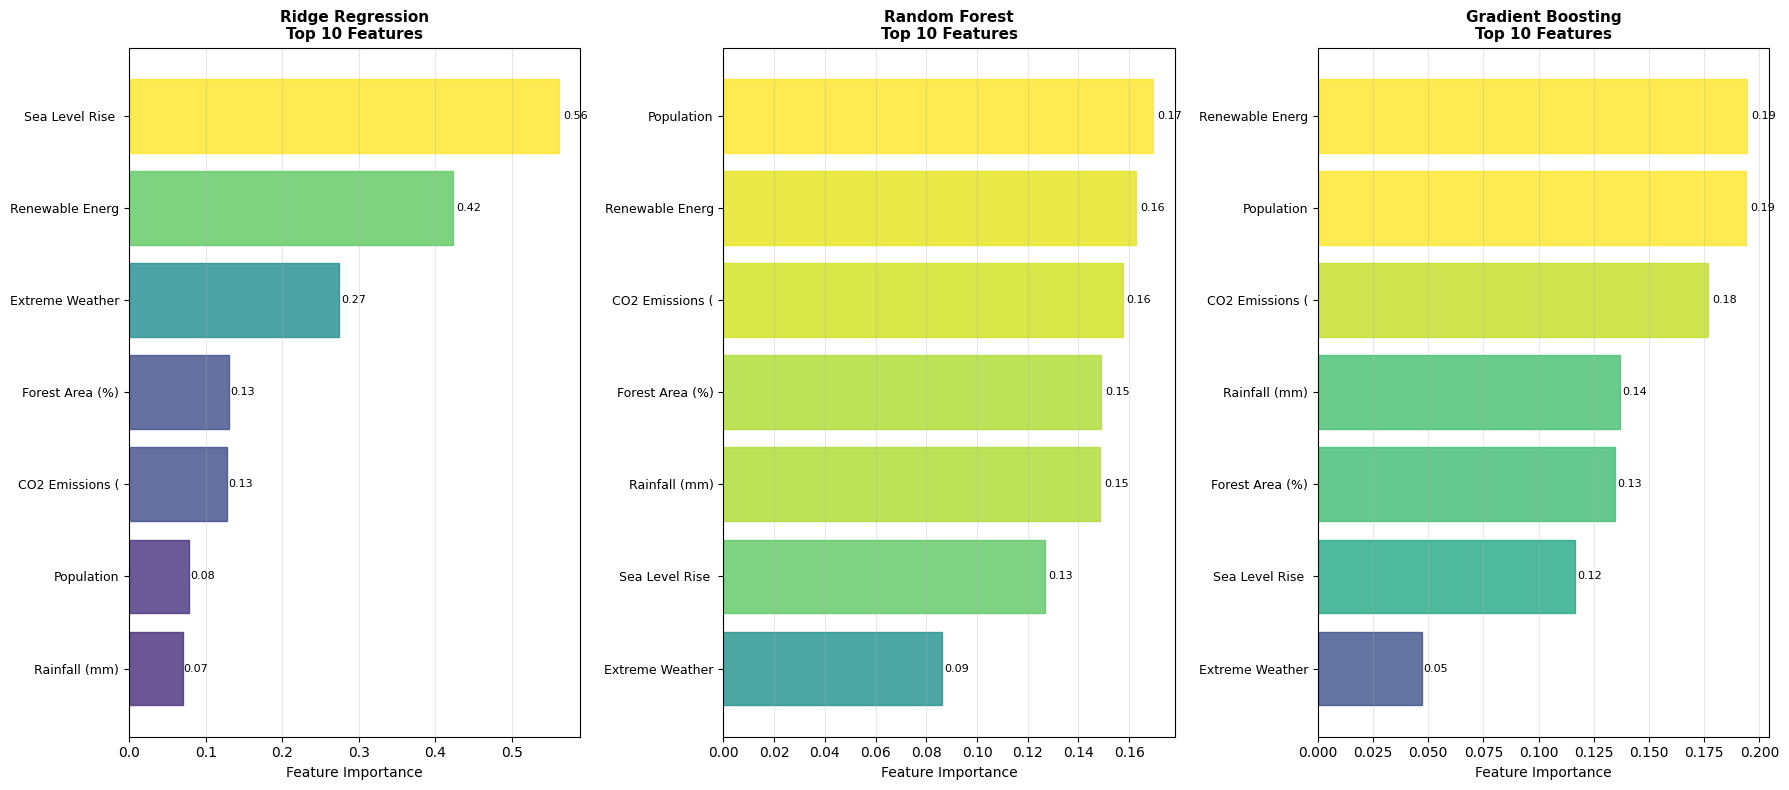

✓ Feature importance plots displayed (optimized)

7. Creating permutation importance plots (optimized)...


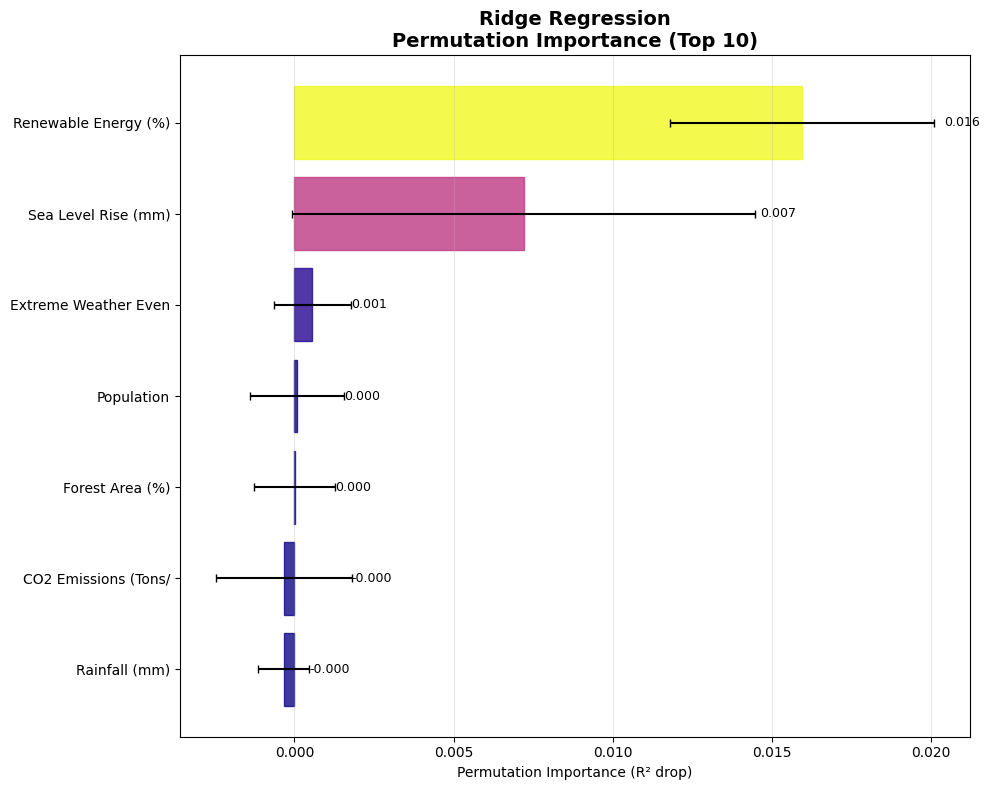

✓ Permutation importance plots displayed (optimized)

8. Performing SHAP analysis (optimized)...
   Computing SHAP values for Random Forest...
      ✓ SHAP analysis completed for Random Forest
   Computing SHAP values for XGBoost...
      ✓ SHAP analysis completed for XGBoost

9. Creating SHAP plots...
   Creating SHAP plots for Random Forest...


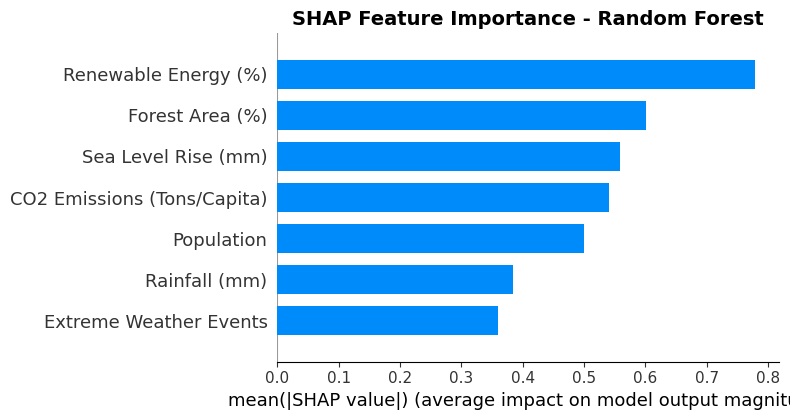

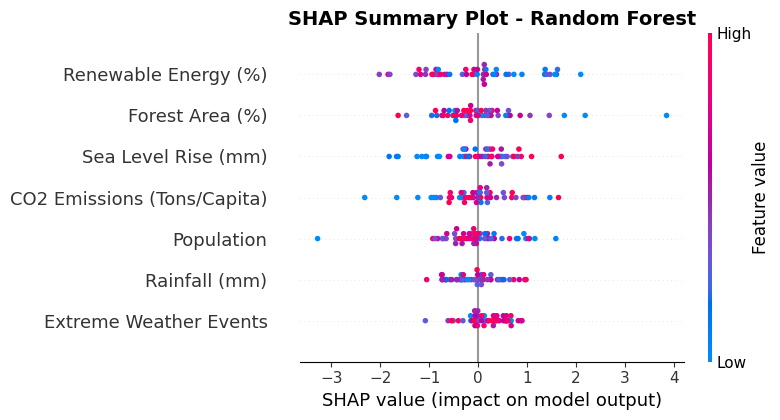

      ✓ SHAP plots created for Random Forest
   Creating SHAP plots for XGBoost...


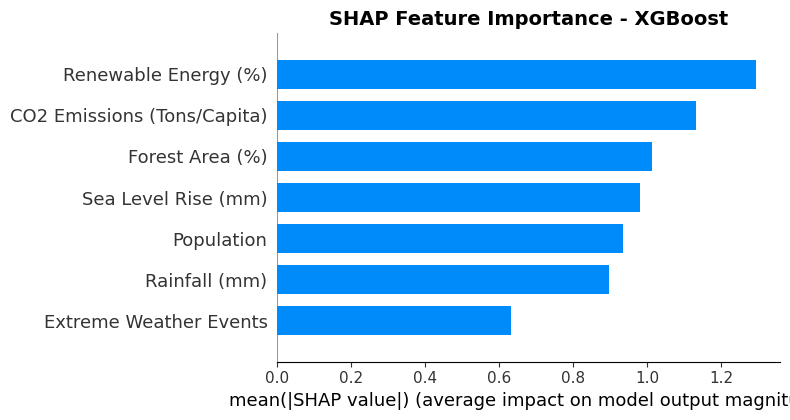

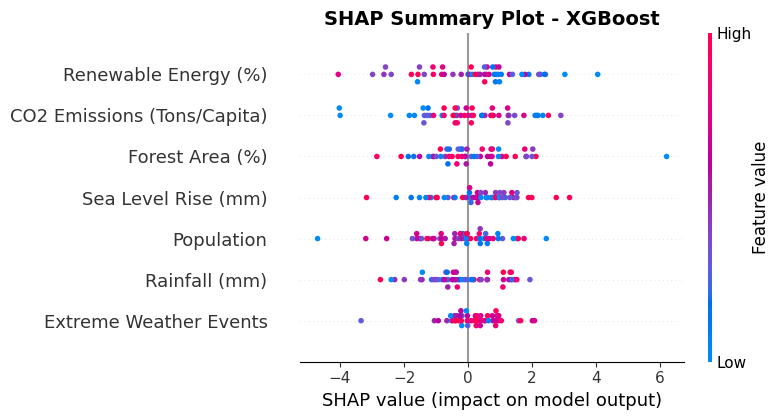

      ✓ SHAP plots created for XGBoost

10. Creating model comparison plots (optimized)...


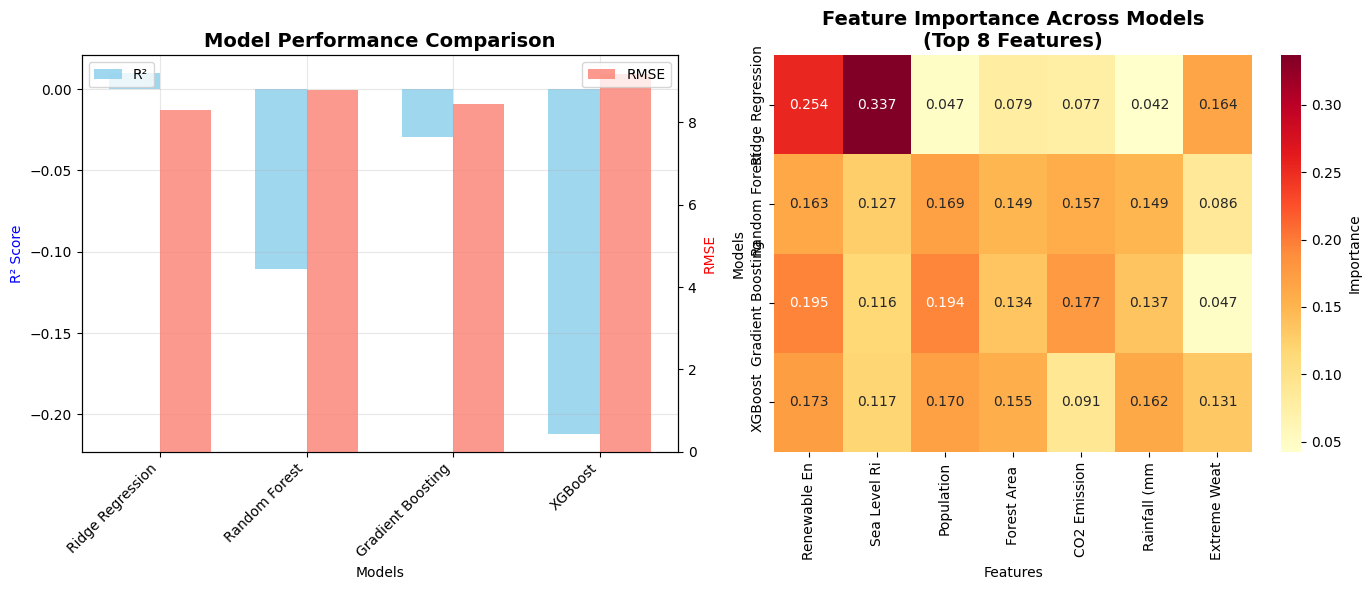

✓ Model comparison plots displayed (optimized)

MODEL INTERPRETATION REPORT

Model Performance Summary:
------------------------------------------------------------
Model                R² Score     RMSE        
------------------------------------------------------------
Ridge Regression     0.0096       8.2835      
Random Forest        -0.1109      8.7729      
Gradient Boosting    -0.0293      8.4448      
XGBoost              -0.2120      9.1635      

Best Model: Ridge Regression (R² = 0.0096)

Top 10 Most Important Features:
--------------------------------------------------
 1. Renewable Energy (%)                0.1961
 2. Sea Level Rise (mm)                 0.1744
 3. Population                          0.1453
 4. Forest Area (%)                     0.1293
 5. CO2 Emissions (Tons/Capita)         0.1255
 6. Rainfall (mm)                       0.1223
 7. Extreme Weather Events              0.1072

Model-Specific Insights:
----------------------------------------

Ridge Regressi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance
import xgboost as xgb
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False
    print("SHAP not available. Install with: pip install shap")
import warnings

warnings.filterwarnings('ignore')

def load_data_for_interpretation():
    """Load data for model interpretation"""
    print("="*60)
    print("MODEL INTERPRETATION AND EXPLAINABILITY")
    print("="*60)

    print("\n1. Loading dataset for interpretation...")

    # Try different data sources
    try:
        df = pd.read_csv('climate_data_engineered.csv')
        print(f"✓ Loaded engineered dataset with shape: {df.shape}")
    except FileNotFoundError:
        try:
            df = pd.read_csv('climate_data_cleaned.csv')
            print(f"✓ Loaded cleaned dataset with shape: {df.shape}")
        except FileNotFoundError:
            df = pd.read_csv('climate_change_dataset.csv')
            print(f"✓ Loaded original dataset with shape: {df.shape}")

    return df

def prepare_data_for_interpretation(df):
    """Prepare data for model interpretation"""
    print("\n2. Preparing data for interpretation...")

    # Define target variable
    target_column = 'Avg Temperature (°C)'

    # Remove non-numeric and identifier columns
    exclude_columns = ['Country', 'Year', target_column]
    feature_columns = []

    for col in df.columns:
        if col not in exclude_columns:
            if df[col].dtype in ['int64', 'float64']:
                feature_columns.append(col)
            elif df[col].dtype == 'object':
                try:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
                    if not df[col].isna().all():
                        feature_columns.append(col)
                except:
                    continue

    # Handle missing values
    X = df[feature_columns].copy()
    y = df[target_column].copy()

    # Fill missing values
    for col in X.columns:
        if X[col].isna().sum() > 0:
            X[col].fillna(X[col].median(), inplace=True)

    # Remove rows with missing target values
    mask = ~y.isna()
    X = X[mask]
    y = y[mask]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"   ✓ Features prepared: {len(feature_columns)} features")
    print(f"   ✓ Training set: {X_train.shape[0]} samples")
    print(f"   ✓ Test set: {X_test.shape[0]} samples")

    return X_train, X_test, y_train, y_test, feature_columns

def train_interpretable_models(X_train, X_test, y_train, y_test):
    """Train models for interpretation (optimized)"""
    print("\n3. Training models for interpretation (optimized)...")

    # Define models that are good for interpretation (reduced for speed)
    models = {
        'Ridge Regression': Ridge(alpha=1.0, random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=1),  # Reduced from 100 to 50
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, random_state=42),  # Reduced from 100 to 50
        'XGBoost': xgb.XGBRegressor(n_estimators=50, random_state=42, n_jobs=1)  # Reduced from 100 to 50
        # Removed Linear Regression to focus on key models
    }

    trained_models = {}
    model_scores = {}

    for name, model in models.items():
        print(f"   Training {name}...")

        try:
            # Scale data for linear models
            if name in ['Linear Regression', 'Ridge Regression']:
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)

                trained_models[name] = (model, scaler)
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                trained_models[name] = (model, None)

            # Calculate performance
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            model_scores[name] = {'R²': r2, 'RMSE': rmse}

            print(f"      ✓ R²: {r2:.4f}, RMSE: {rmse:.4f}")

        except Exception as e:
            print(f"      ✗ Error training {name}: {str(e)}")
            continue

    return trained_models, model_scores

def analyze_feature_importance(trained_models, X_train, feature_columns):
    """Analyze feature importance using different methods"""
    print("\n4. Analyzing feature importance...")

    importance_results = {}

    for model_name, (model, scaler) in trained_models.items():
        print(f"   Analyzing {model_name}...")

        try:
            if hasattr(model, 'feature_importances_'):
                # Tree-based models
                importances = model.feature_importances_
                importance_results[model_name] = {
                    'method': 'built_in',
                    'importances': importances,
                    'features': feature_columns
                }

            elif hasattr(model, 'coef_'):
                # Linear models
                if model.coef_.ndim > 1:
                    importances = np.abs(model.coef_[0])
                else:
                    importances = np.abs(model.coef_)

                importance_results[model_name] = {
                    'method': 'coefficients',
                    'importances': importances,
                    'features': feature_columns
                }

            print(f"      ✓ Feature importance calculated using {importance_results[model_name]['method']}")

        except Exception as e:
            print(f"      ✗ Error analyzing {model_name}: {str(e)}")
            continue

    return importance_results

def perform_permutation_importance(trained_models, X_test, y_test):
    """Perform permutation importance analysis (optimized)"""
    print("\n5. Performing permutation importance analysis (optimized)...")

    permutation_results = {}

    for model_name, (model, scaler) in trained_models.items():
        print(f"   Computing permutation importance for {model_name}...")

        try:
            # Prepare test data
            if scaler is not None:
                X_test_prepared = scaler.transform(X_test)
            else:
                X_test_prepared = X_test

            # Calculate permutation importance with reduced repeats
            perm_importance = permutation_importance(
                model, X_test_prepared, y_test,
                n_repeats=5, random_state=42, scoring='r2'  # Reduced from 10 to 5 repeats
            )

            permutation_results[model_name] = {
                'importances_mean': perm_importance.importances_mean,
                'importances_std': perm_importance.importances_std,
                'features': X_test.columns.tolist()
            }

            print(f"      ✓ Permutation importance calculated")

        except Exception as e:
            print(f"      ✗ Error computing permutation importance for {model_name}: {str(e)}")
            continue

    return permutation_results

def create_feature_importance_plots(importance_results, permutation_results):
    """Create comprehensive feature importance plots (optimized)"""
    print("\n6. Creating feature importance plots (optimized)...")

    # Get the best performing model for detailed analysis
    model_names = list(importance_results.keys())
    if not model_names:
        print("No models available for plotting")
        return

    # Create subplots - limit to 3 models for faster rendering
    n_models = min(3, len(model_names))  # Reduced from 4 to 3 models
    fig, axes = plt.subplots(1, n_models, figsize=(6*n_models, 8))  # Changed layout for better display
    if n_models == 1:
        axes = [axes]

    for i, model_name in enumerate(model_names[:n_models]):
        ax = axes[i]

        if model_name in importance_results:
            importances = importance_results[model_name]['importances']
            features = importance_results[model_name]['features']

            # Get top 10 features (reduced from 15)
            top_indices = np.argsort(importances)[-10:]
            top_importances = importances[top_indices]
            top_features = [features[j] for j in top_indices]

            # Create horizontal bar plot
            y_pos = np.arange(len(top_features))
            bars = ax.barh(y_pos, top_importances, alpha=0.8)

            # Color bars based on importance
            colors = plt.cm.viridis(top_importances / top_importances.max())
            for bar, color in zip(bars, colors):
                bar.set_color(color)

            ax.set_yticks(y_pos)
            ax.set_yticklabels([f.replace('_', ' ')[:15] for f in top_features], fontsize=9)  # Shorter labels
            ax.set_xlabel('Feature Importance')
            ax.set_title(f'{model_name}\nTop 10 Features', fontweight='bold', fontsize=11)  # Reduced features count
            ax.grid(True, alpha=0.3, axis='x')

            # Add value labels (simplified)
            for j, (bar, importance) in enumerate(zip(bars, top_importances)):
                ax.text(importance + importance.max() * 0.01, bar.get_y() + bar.get_height()/2,
                       f'{importance:.2f}', va='center', fontsize=8)  # Reduced precision

    plt.tight_layout()
    plt.show()

    print("✓ Feature importance plots displayed (optimized)")

def create_permutation_importance_plots(permutation_results):
    """Create permutation importance plots (optimized)"""
    print("\n7. Creating permutation importance plots (optimized)...")

    if not permutation_results:
        print("No permutation results available for plotting")
        return

    # Select only 1 best model for permutation analysis (reduced from 2)
    model_names = list(permutation_results.keys())[:1]

    if len(model_names) == 0:
        print("No models available for permutation plotting")
        return

    fig, axes = plt.subplots(1, 1, figsize=(10, 8))  # Single plot for speed
    model_name = model_names[0]

    results = permutation_results[model_name]
    importances_mean = results['importances_mean']
    importances_std = results['importances_std']
    features = results['features']

    # Get top 10 features (reduced from 15)
    top_indices = np.argsort(importances_mean)[-10:]
    top_mean = importances_mean[top_indices]
    top_std = importances_std[top_indices]
    top_features = [features[j] for j in top_indices]

    # Create horizontal bar plot with error bars
    y_pos = np.arange(len(top_features))
    bars = axes.barh(y_pos, top_mean, xerr=top_std, alpha=0.8, capsize=3)

    # Color bars
    colors = plt.cm.plasma(top_mean / top_mean.max())
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    axes.set_yticks(y_pos)
    axes.set_yticklabels([f.replace('_', ' ')[:20] for f in top_features], fontsize=10)
    axes.set_xlabel('Permutation Importance (R² drop)')
    axes.set_title(f'{model_name}\nPermutation Importance (Top 10)', fontweight='bold', fontsize=14)
    axes.grid(True, alpha=0.3, axis='x')

    # Add value labels
    for j, (bar, mean_val, std_val) in enumerate(zip(bars, top_mean, top_std)):
        axes.text(mean_val + std_val + mean_val.max() * 0.02,
                 bar.get_y() + bar.get_height()/2,
                 f'{mean_val:.3f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    print("✓ Permutation importance plots displayed (optimized)")

def perform_shap_analysis(trained_models, X_train, X_test):
    """Perform SHAP analysis if available (optimized)"""
    print("\n8. Performing SHAP analysis (optimized)...")

    if not SHAP_AVAILABLE:
        print("   SHAP not available. Skipping SHAP analysis.")
        return None

    shap_results = {}

    # Limit analysis to only 2 best tree-based models for efficiency
    tree_models = ['Random Forest', 'XGBoost']  # Removed Gradient Boosting for speed

    for model_name in tree_models:
        if model_name in trained_models:
            print(f"   Computing SHAP values for {model_name}...")

            try:
                model, scaler = trained_models[model_name]

                # Create SHAP explainer
                explainer = shap.TreeExplainer(model)

                # Calculate SHAP values for a smaller subset of test data
                X_sample = X_test.iloc[:50]  # Reduced from 100 to 50 samples for efficiency
                shap_values = explainer.shap_values(X_sample)

                shap_results[model_name] = {
                    'explainer': explainer,
                    'shap_values': shap_values,
                    'X_sample': X_sample
                }

                print(f"      ✓ SHAP analysis completed for {model_name}")

            except Exception as e:
                print(f"      ✗ Error in SHAP analysis for {model_name}: {str(e)}")
                continue

    return shap_results

def create_shap_plots(shap_results):
    """Create SHAP visualization plots"""
    print("\n9. Creating SHAP plots...")

    if not shap_results:
        print("   No SHAP results available for plotting")
        return

    for model_name, results in shap_results.items():
        print(f"   Creating SHAP plots for {model_name}...")

        try:
            shap_values = results['shap_values']
            X_sample = results['X_sample']

            # Summary plot
            plt.figure(figsize=(12, 8))
            shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
            plt.title(f'SHAP Feature Importance - {model_name}', fontweight='bold', fontsize=14)
            plt.tight_layout()
            plt.show()

            # Detailed summary plot
            plt.figure(figsize=(12, 8))
            shap.summary_plot(shap_values, X_sample, show=False)
            plt.title(f'SHAP Summary Plot - {model_name}', fontweight='bold', fontsize=14)
            plt.tight_layout()
            plt.show()

            print(f"      ✓ SHAP plots created for {model_name}")

        except Exception as e:
            print(f"      ✗ Error creating SHAP plots for {model_name}: {str(e)}")
            continue

def create_model_comparison_plots(importance_results, model_scores):
    """Create plots comparing models and their interpretations (optimized)"""
    print("\n10. Creating model comparison plots (optimized)...")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Reduced from 4 plots to 2 for speed

    # Plot 1: Model Performance Comparison
    model_names = list(model_scores.keys())
    r2_scores = [model_scores[name]['R²'] for name in model_names]
    rmse_scores = [model_scores[name]['RMSE'] for name in model_names]

    x = np.arange(len(model_names))
    width = 0.35

    axes[0].bar(x - width/2, r2_scores, width, label='R²', alpha=0.8, color='skyblue')
    ax_twin = axes[0].twinx()
    ax_twin.bar(x + width/2, rmse_scores, width, label='RMSE', alpha=0.8, color='salmon')

    axes[0].set_title('Model Performance Comparison', fontweight='bold', fontsize=14)
    axes[0].set_xlabel('Models')
    axes[0].set_ylabel('R² Score', color='blue')
    ax_twin.set_ylabel('RMSE', color='red')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(model_names, rotation=45, ha='right')
    axes[0].legend(loc='upper left')
    ax_twin.legend(loc='upper right')
    axes[0].grid(True, alpha=0.3)

    # Plot 2: Top Features Across Models (simplified)
    all_features = set()
    feature_importance_by_model = {}

    for model_name, results in importance_results.items():
        features = results['features']
        importances = results['importances']

        # Normalize importances
        normalized_importances = importances / np.sum(importances)

        feature_dict = dict(zip(features, normalized_importances))
        feature_importance_by_model[model_name] = feature_dict
        all_features.update(features)

    # Get top 8 features across all models (reduced from 10)
    feature_sums = {}
    for feature in all_features:
        feature_sums[feature] = sum(
            feature_importance_by_model[model].get(feature, 0)
            for model in feature_importance_by_model
        )

    top_features = sorted(feature_sums.items(), key=lambda x: x[1], reverse=True)[:8]
    top_feature_names = [f[0] for f in top_features]

    # Create heatmap of feature importance across models
    heatmap_data = []
    for model_name in model_names:
        if model_name in feature_importance_by_model:
            row = [feature_importance_by_model[model_name].get(feature, 0) for feature in top_feature_names]
            heatmap_data.append(row)

    if heatmap_data:
        heatmap_df = pd.DataFrame(heatmap_data, index=model_names, columns=[f.replace('_', ' ')[:12] for f in top_feature_names])

        sns.heatmap(heatmap_df, annot=True, cmap='YlOrRd', ax=axes[1], cbar_kws={'label': 'Importance'}, fmt='.3f')
        axes[1].set_title('Feature Importance Across Models\n(Top 8 Features)', fontweight='bold', fontsize=14)
        axes[1].set_xlabel('Features')
        axes[1].set_ylabel('Models')

    plt.tight_layout()
    plt.show()

    print("✓ Model comparison plots displayed (optimized)")

def generate_interpretation_report(importance_results, permutation_results, model_scores):
    """Generate comprehensive model interpretation report"""
    print("\n" + "="*60)
    print("MODEL INTERPRETATION REPORT")
    print("="*60)

    # Model performance summary
    print(f"\nModel Performance Summary:")
    print("-" * 60)
    print(f"{'Model':<20} {'R² Score':<12} {'RMSE':<12}")
    print("-" * 60)

    for model_name, scores in model_scores.items():
        print(f"{model_name:<20} {scores['R²']:<12.4f} {scores['RMSE']:<12.4f}")

    # Best performing model
    best_model = max(model_scores.items(), key=lambda x: x[1]['R²'])
    print(f"\nBest Model: {best_model[0]} (R² = {best_model[1]['R²']:.4f})")

    # Feature importance analysis
    print(f"\nTop 10 Most Important Features:")
    print("-" * 50)

    # Aggregate feature importance across models
    all_features = set()
    feature_importance_aggregate = {}

    for model_name, results in importance_results.items():
        features = results['features']
        importances = results['importances']

        # Normalize importances
        normalized_importances = importances / np.sum(importances)

        for feature, importance in zip(features, normalized_importances):
            if feature not in feature_importance_aggregate:
                feature_importance_aggregate[feature] = []
            feature_importance_aggregate[feature].append(importance)

    # Calculate average importance
    avg_importance = {}
    for feature, importances in feature_importance_aggregate.items():
        avg_importance[feature] = np.mean(importances)

    # Sort by average importance
    sorted_features = sorted(avg_importance.items(), key=lambda x: x[1], reverse=True)

    for i, (feature, importance) in enumerate(sorted_features[:10], 1):
        print(f"{i:2d}. {feature:<35} {importance:.4f}")

    # Model-specific insights
    print(f"\nModel-Specific Insights:")
    print("-" * 40)

    for model_name, results in importance_results.items():
        features = results['features']
        importances = results['importances']

        # Get top 3 features for this model
        top_indices = np.argsort(importances)[-3:][::-1]
        top_features = [features[i] for i in top_indices]
        top_importances = [importances[i] for i in top_indices]

        print(f"\n{model_name}:")
        print(f"  Performance: R² = {model_scores[model_name]['R²']:.4f}")
        print(f"  Top 3 features:")
        for j, (feature, importance) in enumerate(zip(top_features, top_importances), 1):
            print(f"    {j}. {feature}: {importance:.4f}")

    # Permutation importance insights
    if permutation_results:
        print(f"\nPermutation Importance Insights:")
        print("-" * 40)

        for model_name, results in permutation_results.items():
            importances_mean = results['importances_mean']
            features = results['features']

            # Get top 3 features
            top_indices = np.argsort(importances_mean)[-3:][::-1]
            top_features = [features[i] for i in top_indices]
            top_importances = [importances_mean[i] for i in top_indices]

            print(f"\n{model_name} (Permutation):")
            print(f"  Top 3 features (R² drop when permuted):")
            for j, (feature, importance) in enumerate(zip(top_features, top_importances), 1):
                print(f"    {j}. {feature}: {importance:.4f}")

    # Key insights and recommendations
    print(f"\nKey Insights:")

    # Most important feature across models
    most_important = sorted_features[0]
    print(f"  • Most important feature overall: {most_important[0]} (avg importance: {most_important[1]:.4f})")

    # Model comparison
    linear_models = [name for name in model_scores.keys() if 'Linear' in name or 'Ridge' in name]
    tree_models = [name for name in model_scores.keys() if any(x in name for x in ['Random', 'Gradient', 'XGBoost'])]

    if linear_models and tree_models:
        linear_avg_r2 = np.mean([model_scores[name]['R²'] for name in linear_models])
        tree_avg_r2 = np.mean([model_scores[name]['R²'] for name in tree_models])

        print(f"  • Linear models average R²: {linear_avg_r2:.4f}")
        print(f"  • Tree-based models average R²: {tree_avg_r2:.4f}")

        if tree_avg_r2 > linear_avg_r2:
            print(f"  • Tree-based models outperform linear models, suggesting non-linear relationships")
        else:
            print(f"  • Linear models competitive with tree models, suggesting linear relationships")

    # Feature count analysis
    total_features = len(sorted_features)
    significant_features = len([f for f in sorted_features if f[1] > 0.01])  # Arbitrary threshold

    print(f"  • Total features analyzed: {total_features}")
    print(f"  • Features with significant importance (>0.01): {significant_features}")
    print(f"  • Feature efficiency: {significant_features/total_features*100:.1f}% of features provide meaningful signal")

    print(f"\nRecommendations:")

    # Best model recommendation
    print(f"  • For best performance: Use {best_model[0]} (R² = {best_model[1]['R²']:.4f})")

    # Interpretability recommendation
    interpretable_models = ['Linear Regression', 'Ridge Regression']
    best_interpretable = None
    best_interpretable_r2 = 0

    for model in interpretable_models:
        if model in model_scores and model_scores[model]['R²'] > best_interpretable_r2:
            best_interpretable = model
            best_interpretable_r2 = model_scores[model]['R²']

    if best_interpretable:
        print(f"  • For interpretability: Use {best_interpretable} (R² = {best_interpretable_r2:.4f})")

    # Feature selection recommendation
    top_10_features = [f[0] for f in sorted_features[:10]]
    print(f"  • For feature selection: Focus on top 10 features for {(sum([f[1] for f in sorted_features[:10]])*100):.1f}% of total importance")

    # SHAP recommendation
    if SHAP_AVAILABLE:
        print(f"  • For detailed explanations: Use SHAP analysis with tree-based models")
    else:
        print(f"  • Consider installing SHAP for detailed model explanations")

    print(f"\n✓ Model interpretation analysis completed!")
    print(f"✓ {len(importance_results)} models analyzed")
    print(f"✓ {len(sorted_features)} features ranked by importance")

# Run model interpretation
df = load_data_for_interpretation()
X_train, X_test, y_train, y_test, feature_columns = prepare_data_for_interpretation(df)
trained_models, model_scores = train_interpretable_models(X_train, X_test, y_train, y_test)

# Analyze feature importance
importance_results = analyze_feature_importance(trained_models, X_train, feature_columns)
permutation_results = perform_permutation_importance(trained_models, X_test, y_test)

# Create visualizations
create_feature_importance_plots(importance_results, permutation_results)
create_permutation_importance_plots(permutation_results)

# SHAP analysis
shap_results = perform_shap_analysis(trained_models, X_train, X_test)
if shap_results:
    create_shap_plots(shap_results)

# Model comparison
create_model_comparison_plots(importance_results, model_scores)

# Generate report
generate_interpretation_report(importance_results, permutation_results, model_scores)

print(f"\n" + "="*60)
print("MODEL INTERPRETATION COMPLETED!")


-----
# 9: Testing

FINAL MODEL TESTING & VALIDATION

1. Loading dataset for final testing...
✓ Loaded original dataset with shape: (1000, 10)

2. Preparing data for comprehensive testing...
   ✓ Features prepared: 7 features
   ✓ Final dataset shape: (1000, 7)
   ✓ Target range: 5.00 to 34.90

3. Creating multiple validation splits...
   ✓ Created 2 different train-test splits
      Random Split (42): Train=800, Test=200
      Random Split (123): Train=800, Test=200

4. Training final models (optimized)...
   Training Random Forest...
      ✓ Random Forest trained successfully
   Training Gradient Boosting...
      ✓ Gradient Boosting trained successfully
   Training XGBoost...
      ✓ XGBoost trained successfully
   Training Ridge...
      ✓ Ridge trained successfully
   Training Ensemble (Voting)...
      ✓ Ensemble (Voting) trained successfully
   ✓ Successfully trained 5 models

5. Performing comprehensive evaluation...
   Evaluating on Random Split (42)...
      Results for Random Split (42):
      

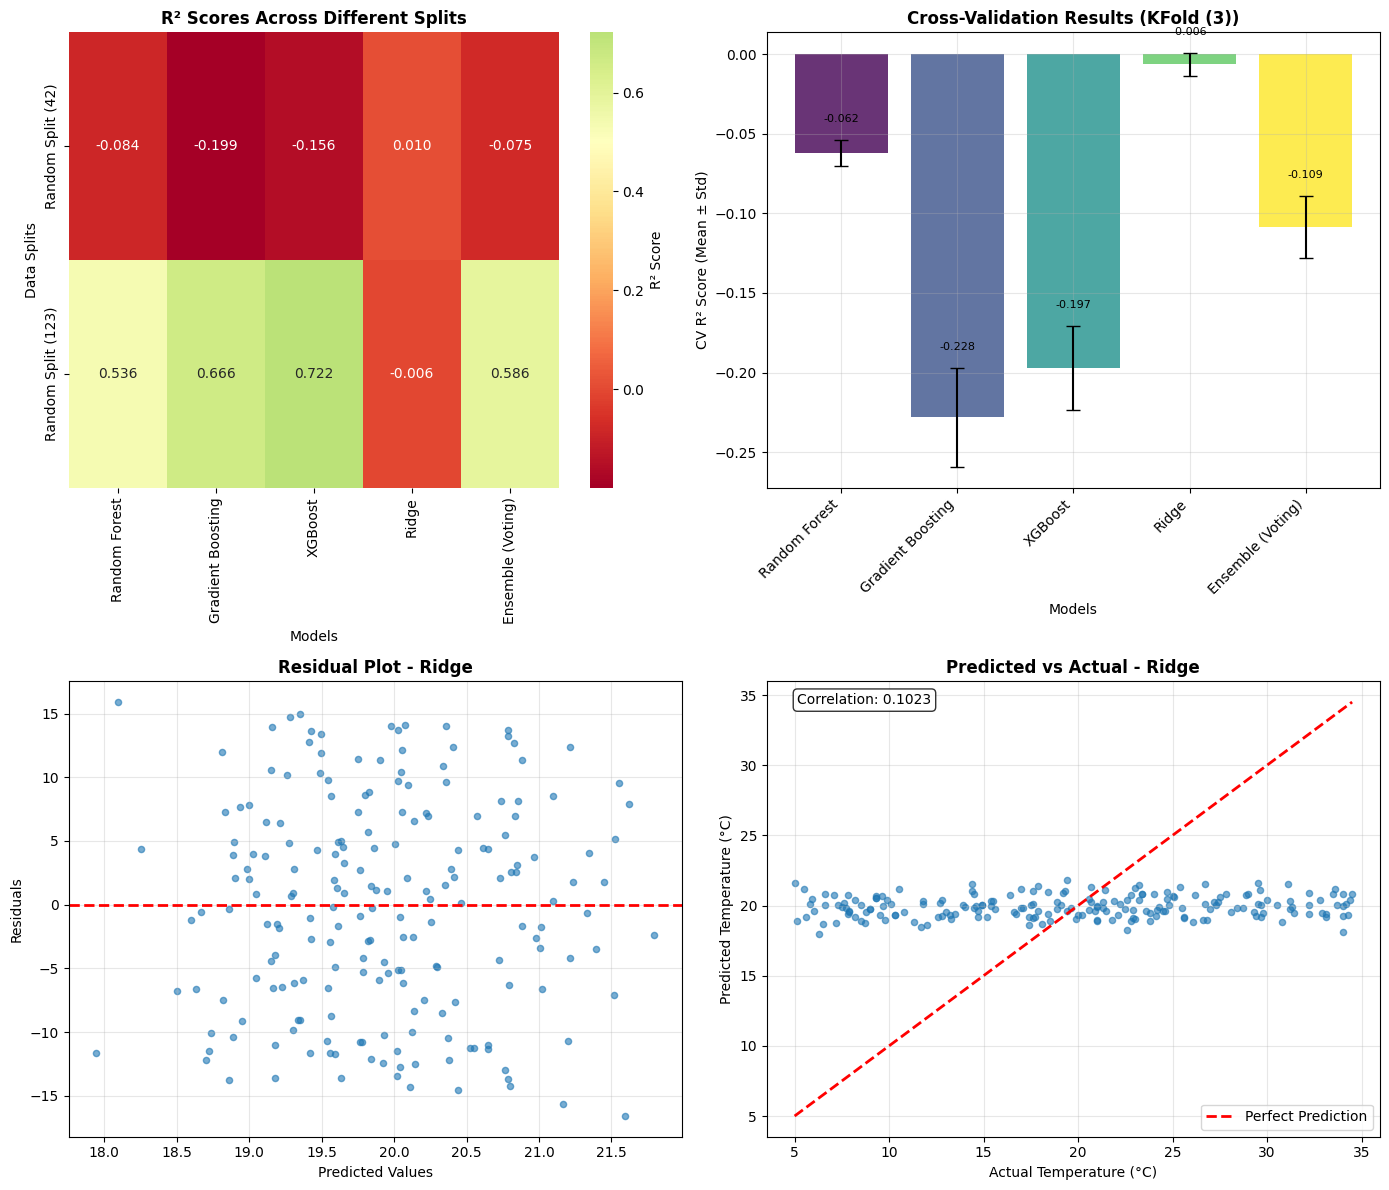

✓ Comprehensive evaluation plots displayed (optimized)

9. Creating robustness plots (optimized)...


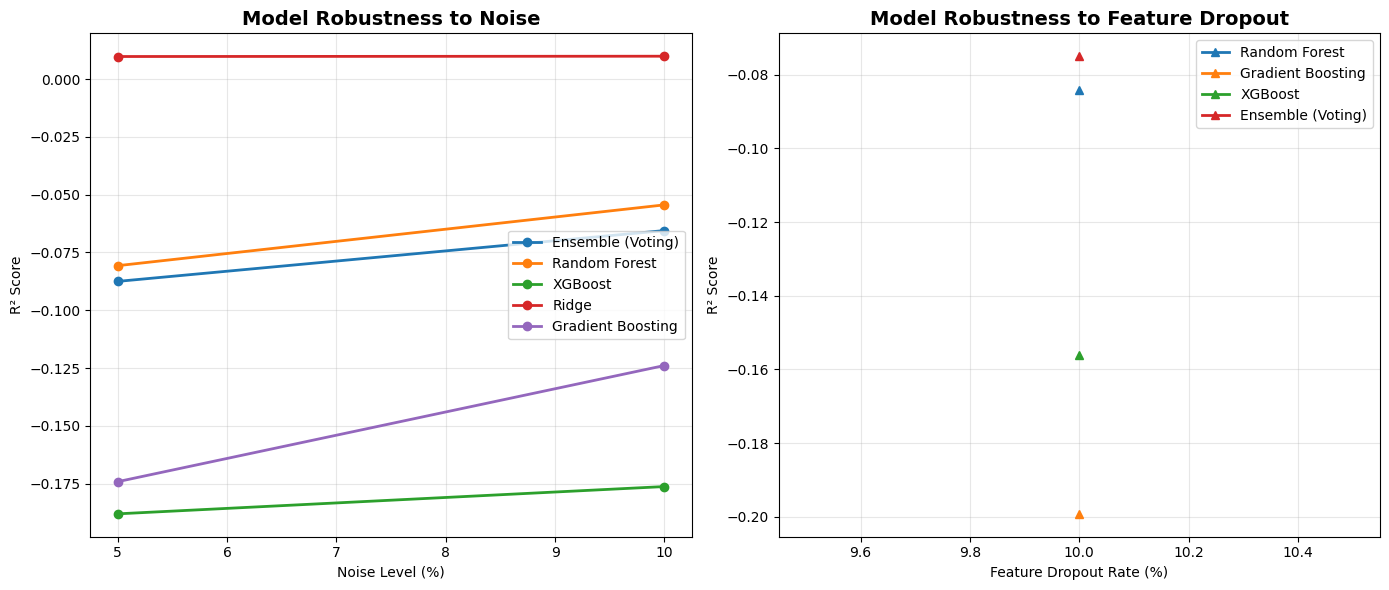

✓ Robustness testing plots displayed (optimized)

FINAL MODEL TESTING REPORT

Testing Summary:
  • 2 different data splits tested
  • 5 models evaluated
  • 2 cross-validation strategies
  • 3 robustness tests

Best Single Performance:
  • Model: XGBoost
  • Split: Random Split (123)
  • R² Score: 0.7218

Model Consistency Analysis:
--------------------------------------------------
Model                Mean R²    Std      Min      Max      Range   
----------------------------------------------------------------------
XGBoost              0.2828     0.4390   -0.1562  0.7218   0.8781  
Ensemble (Voting)    0.2553     0.3302   -0.0750  0.5855   0.6605  
Gradient Boosting    0.2336     0.4328   -0.1992  0.6664   0.8656  
Random Forest        0.2258     0.3101   -0.0842  0.5359   0.6201  
Ridge                0.0018     0.0078   -0.0061  0.0096   0.0157  

Cross-Validation Analysis:
----------------------------------------

KFold (3):
  Ridge: -0.0063 (±0.0072)
  Random Forest: -0.0618 (±

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
import xgboost as xgb
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import warnings

warnings.filterwarnings('ignore')

def load_data_for_final_testing():
    """Load data for final comprehensive testing"""
    print("="*60)
    print("FINAL MODEL TESTING & VALIDATION")
    print("="*60)

    print("\n1. Loading dataset for final testing...")

    # Try different data sources
    try:
        df = pd.read_csv('climate_data_engineered.csv')
        print(f"✓ Loaded engineered dataset with shape: {df.shape}")
    except FileNotFoundError:
        try:
            df = pd.read_csv('climate_data_cleaned.csv')
            print(f"✓ Loaded cleaned dataset with shape: {df.shape}")
        except FileNotFoundError:
            df = pd.read_csv('climate_change_dataset.csv')
            print(f"✓ Loaded original dataset with shape: {df.shape}")

    return df

def prepare_final_data(df):
    """Prepare data for final testing with multiple validation strategies"""
    print("\n2. Preparing data for comprehensive testing...")

    # Define target variable
    target_column = 'Avg Temperature (°C)'

    # Remove non-numeric and identifier columns
    exclude_columns = ['Country', 'Year', target_column]
    feature_columns = []

    for col in df.columns:
        if col not in exclude_columns:
            if df[col].dtype in ['int64', 'float64']:
                feature_columns.append(col)
            elif df[col].dtype == 'object':
                try:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
                    if not df[col].isna().all():
                        feature_columns.append(col)
                except:
                    continue

    # Handle missing values
    X = df[feature_columns].copy()
    y = df[target_column].copy()

    # Fill missing values
    for col in X.columns:
        if X[col].isna().sum() > 0:
            X[col].fillna(X[col].median(), inplace=True)

    # Remove rows with missing target values
    mask = ~y.isna()
    X = X[mask]
    y = y[mask]

    print(f"   ✓ Features prepared: {len(feature_columns)} features")
    print(f"   ✓ Final dataset shape: {X.shape}")
    print(f"   ✓ Target range: {y.min():.2f} to {y.max():.2f}")

    return X, y, feature_columns

def create_multiple_train_test_splits(X, y):
    """Create multiple train-test splits for robust evaluation"""
    print("\n3. Creating multiple validation splits...")

    splits = {}

    # Standard random split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    splits['Random Split (42)'] = (X_train, X_test, y_train, y_test)

    # Different random split
    X_train2, X_test2, y_train2, y_test2 = train_test_split(
        X, y, test_size=0.2, random_state=123
    )
    splits['Random Split (123)'] = (X_train2, X_test2, y_train2, y_test2)

    # Temporal split if Year column exists
    if 'Year' in X.columns:
        print("   Creating temporal split based on Year...")
        # Sort by year and split
        combined = pd.concat([X, y], axis=1)
        combined_sorted = combined.sort_values('Year')

        split_point = int(len(combined_sorted) * 0.8)
        train_temporal = combined_sorted.iloc[:split_point]
        test_temporal = combined_sorted.iloc[split_point:]

        X_train_temp = train_temporal[X.columns]
        y_train_temp = train_temporal[y.name]
        X_test_temp = test_temporal[X.columns]
        y_test_temp = test_temporal[y.name]

        splits['Temporal Split'] = (X_train_temp, X_test_temp, y_train_temp, y_test_temp)

    print(f"   ✓ Created {len(splits)} different train-test splits")
    for split_name, (X_tr, X_te, y_tr, y_te) in splits.items():
        print(f"      {split_name}: Train={len(X_tr)}, Test={len(X_te)}")

    return splits

def train_final_models(X_train, y_train):
    """Train the best performing models for final testing (optimized)"""
    print("\n4. Training final models (optimized)...")

    # Define the best models based on previous analysis (reduced complexity)
    models = {
        'Random Forest': RandomForestRegressor(
            n_estimators=100, max_depth=15, min_samples_split=5,  # Reduced from 200 to 100
            min_samples_leaf=2, random_state=42, n_jobs=1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=100, learning_rate=0.1, max_depth=7,  # Reduced from 150 to 100
            min_samples_split=5, random_state=42
        ),
        'XGBoost': xgb.XGBRegressor(
            n_estimators=100, learning_rate=0.1, max_depth=7,  # Reduced from 150 to 100
            min_child_weight=3, subsample=0.9, random_state=42, n_jobs=1
        ),
        'Ridge': Pipeline([
            ('scaler', StandardScaler()),
            ('ridge', Ridge(alpha=2.0, random_state=42))
        ])
    }

    # Train simpler ensemble model
    ensemble_models = [
        ('rf', RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=1)),  # Reduced from 100 to 50
        ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),  # Reduced from 100 to 50
        ('xgb', xgb.XGBRegressor(n_estimators=50, random_state=42, n_jobs=1))  # Reduced from 100 to 50
    ]

    models['Ensemble (Voting)'] = VotingRegressor(estimators=ensemble_models)

    trained_models = {}

    for name, model in models.items():
        print(f"   Training {name}...")
        try:
            model.fit(X_train, y_train)
            trained_models[name] = model
            print(f"      ✓ {name} trained successfully")
        except Exception as e:
            print(f"      ✗ Error training {name}: {str(e)}")

    print(f"   ✓ Successfully trained {len(trained_models)} models")
    return trained_models

def perform_comprehensive_evaluation(trained_models, splits):
    """Perform comprehensive evaluation across all splits"""
    print("\n5. Performing comprehensive evaluation...")

    evaluation_results = {}

    for split_name, (X_train, X_test, y_train, y_test) in splits.items():
        print(f"   Evaluating on {split_name}...")

        split_results = {}

        for model_name, model in trained_models.items():
            try:
                # Make predictions
                y_pred = model.predict(X_test)

                # Calculate comprehensive metrics
                r2 = r2_score(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test, y_pred)
                mape = mean_absolute_percentage_error(y_test, y_pred)

                # Statistical tests
                pearson_corr, pearson_p = pearsonr(y_test, y_pred)
                spearman_corr, spearman_p = spearmanr(y_test, y_pred)

                # Residual analysis
                residuals = y_test - y_pred
                residual_std = np.std(residuals)
                residual_mean = np.mean(residuals)

                split_results[model_name] = {
                    'R²': r2,
                    'MSE': mse,
                    'RMSE': rmse,
                    'MAE': mae,
                    'MAPE': mape,
                    'Pearson Correlation': pearson_corr,
                    'Spearman Correlation': spearman_corr,
                    'Residual Mean': residual_mean,
                    'Residual Std': residual_std,
                    'y_pred': y_pred,
                    'y_test': y_test,
                    'residuals': residuals
                }

            except Exception as e:
                print(f"      ✗ Error evaluating {model_name}: {str(e)}")
                continue

        evaluation_results[split_name] = split_results

        # Print summary for this split
        print(f"      Results for {split_name}:")
        for model_name, metrics in split_results.items():
            print(f"        {model_name}: R²={metrics['R²']:.4f}, RMSE={metrics['RMSE']:.4f}")

    return evaluation_results

def perform_cross_validation_testing(trained_models, X, y):
    """Perform extensive cross-validation testing (optimized)"""
    print("\n6. Performing cross-validation testing (optimized)...")

    cv_results = {}

    # Reduced CV strategies for speed
    cv_strategies = {
        'KFold (3)': KFold(n_splits=3, shuffle=True, random_state=42),  # Reduced from 5 to 3
        'KFold (5)': KFold(n_splits=5, shuffle=True, random_state=42),  # Removed 10-fold
    }

    # Add time series CV if Year column exists (reduced splits)
    if 'Year' in X.columns:
        cv_strategies['Time Series'] = TimeSeriesSplit(n_splits=3)  # Reduced from 5 to 3

    for cv_name, cv_strategy in cv_strategies.items():
        print(f"   {cv_name} cross-validation...")

        cv_results[cv_name] = {}

        for model_name, model in trained_models.items():
            try:
                # Perform cross-validation
                cv_scores = cross_val_score(model, X, y, cv=cv_strategy, scoring='r2', n_jobs=-1)

                cv_results[cv_name][model_name] = {
                    'scores': cv_scores,
                    'mean': cv_scores.mean(),
                    'std': cv_scores.std(),
                    'min': cv_scores.min(),
                    'max': cv_scores.max()
                }

                print(f"      {model_name}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

            except Exception as e:
                print(f"      ✗ Error in CV for {model_name}: {str(e)}")
                continue

    return cv_results

def perform_robustness_testing(trained_models, X_test, y_test):
    """Perform robustness testing with noise and perturbations (optimized)"""
    print("\n7. Performing robustness testing (optimized)...")

    robustness_results = {}

    # Test with reduced noise levels for speed
    noise_levels = [0.05, 0.1]  # Reduced from [0.01, 0.05, 0.1, 0.2] to [0.05, 0.1]

    for noise_level in noise_levels:
        print(f"   Testing with {noise_level*100}% noise...")

        # Add Gaussian noise to features
        np.random.seed(42)
        noise = np.random.normal(0, noise_level * X_test.std(), X_test.shape)
        X_test_noisy = X_test + noise

        noise_results = {}

        for model_name, model in trained_models.items():
            try:
                y_pred_noisy = model.predict(X_test_noisy)
                r2_noisy = r2_score(y_test, y_pred_noisy)
                rmse_noisy = np.sqrt(mean_squared_error(y_test, y_pred_noisy))

                noise_results[model_name] = {
                    'R²': r2_noisy,
                    'RMSE': rmse_noisy
                }

            except Exception as e:
                print(f"      ✗ Error testing {model_name} with noise: {str(e)}")
                continue

        robustness_results[f'Noise {noise_level*100}%'] = noise_results

    # Test with reduced feature dropout rates
    print("   Testing with feature dropout...")
    dropout_rates = [0.1, 0.2]  # Reduced from [0.1, 0.2, 0.3] to [0.1, 0.2]

    for dropout_rate in dropout_rates:
        np.random.seed(42)
        n_features_to_drop = int(dropout_rate * X_test.shape[1])
        features_to_drop = np.random.choice(X_test.columns, n_features_to_drop, replace=False)

        X_test_dropout = X_test.drop(columns=features_to_drop)

        dropout_results = {}

        for model_name, model in trained_models.items():
            try:
                # For pipeline models, we need to handle this differently
                if hasattr(model, 'predict'):
                    if isinstance(model, Pipeline):
                        # For pipelines, we need to be careful about feature selection
                        # Skip this test for pipelines to avoid complexity
                        continue
                    else:
                        y_pred_dropout = model.predict(X_test_dropout)
                        r2_dropout = r2_score(y_test, y_pred_dropout)
                        rmse_dropout = np.sqrt(mean_squared_error(y_test, y_pred_dropout))

                        dropout_results[model_name] = {
                            'R²': r2_dropout,
                            'RMSE': rmse_dropout
                        }

            except Exception as e:
                # Expected for some models when features are dropped
                continue

        if dropout_results:
            robustness_results[f'Dropout {dropout_rate*100}%'] = dropout_results

    return robustness_results

def create_comprehensive_evaluation_plots(evaluation_results, cv_results):
    """Create comprehensive evaluation plots (optimized)"""
    print("\n8. Creating comprehensive evaluation plots (optimized)...")

    fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Reduced from 3x2 to 2x2 plots

    # Plot 1: R² scores across different splits
    split_names = list(evaluation_results.keys())
    model_names = list(list(evaluation_results.values())[0].keys())

    r2_data = []
    for split_name in split_names:
        r2_scores = [evaluation_results[split_name][model]['R²'] for model in model_names]
        r2_data.append(r2_scores)

    r2_df = pd.DataFrame(r2_data, index=split_names, columns=model_names)

    sns.heatmap(r2_df, annot=True, cmap='RdYlGn', center=0.5, ax=axes[0, 0],
                cbar_kws={'label': 'R² Score'}, fmt='.3f')
    axes[0, 0].set_title('R² Scores Across Different Splits', fontweight='bold', fontsize=12)
    axes[0, 0].set_xlabel('Models')
    axes[0, 0].set_ylabel('Data Splits')

    # Plot 2: Cross-validation results
    if cv_results:
        cv_means = []
        cv_stds = []
        cv_model_names = []

        # Use first CV strategy for plotting
        first_cv = list(cv_results.keys())[0]
        for model_name, results in cv_results[first_cv].items():
            cv_means.append(results['mean'])
            cv_stds.append(results['std'])
            cv_model_names.append(model_name)

        bars = axes[0, 1].bar(range(len(cv_model_names)), cv_means, yerr=cv_stds,
                             capsize=5, alpha=0.8, color=plt.cm.viridis(np.linspace(0, 1, len(cv_model_names))))
        axes[0, 1].set_title(f'Cross-Validation Results ({first_cv})', fontweight='bold', fontsize=12)
        axes[0, 1].set_xlabel('Models')
        axes[0, 1].set_ylabel('CV R² Score (Mean ± Std)')
        axes[0, 1].set_xticks(range(len(cv_model_names)))
        axes[0, 1].set_xticklabels(cv_model_names, rotation=45, ha='right')
        axes[0, 1].grid(True, alpha=0.3)

        # Add value labels (simplified)
        for bar, mean, std in zip(bars, cv_means, cv_stds):
            axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.01,
                           f'{mean:.3f}', ha='center', va='bottom', fontsize=8)

    # Plot 3: Residual analysis for best model
    # Find best model from first split
    first_split = list(evaluation_results.keys())[0]
    best_model_name = max(evaluation_results[first_split].items(),
                         key=lambda x: x[1]['R²'])[0]

    best_results = evaluation_results[first_split][best_model_name]
    residuals = best_results['residuals']
    y_pred = best_results['y_pred']

    axes[1, 0].scatter(y_pred, residuals, alpha=0.6, s=20)  # Reduced point size
    axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[1, 0].set_title(f'Residual Plot - {best_model_name}', fontweight='bold', fontsize=12)
    axes[1, 0].set_xlabel('Predicted Values')
    axes[1, 0].set_ylabel('Residuals')
    axes[1, 0].grid(True, alpha=0.3)

    # Plot 4: Prediction vs Actual for best model
    y_test = best_results['y_test']
    axes[1, 1].scatter(y_test, y_pred, alpha=0.6, s=20)  # Reduced point size
    axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                   'r--', lw=2, label='Perfect Prediction')
    axes[1, 1].set_title(f'Predicted vs Actual - {best_model_name}', fontweight='bold', fontsize=12)
    axes[1, 1].set_xlabel('Actual Temperature (°C)')
    axes[1, 1].set_ylabel('Predicted Temperature (°C)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # Add correlation info
    correlation = np.corrcoef(y_test, y_pred)[0, 1]
    axes[1, 1].text(0.05, 0.95, f'Correlation: {correlation:.4f}',
                   transform=axes[1, 1].transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    print("✓ Comprehensive evaluation plots displayed (optimized)")

def create_robustness_plots(robustness_results):
    """Create plots showing model robustness (optimized)"""
    print("\n9. Creating robustness plots (optimized)...")

    if not robustness_results:
        print("   No robustness results available for plotting")
        return

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Reduced from 2x2 to 1x2 plots

    # Get all model names
    model_names = set()
    for test_results in robustness_results.values():
        model_names.update(test_results.keys())
    model_names = list(model_names)

    # Plot 1: Noise robustness
    noise_tests = [k for k in robustness_results.keys() if 'Noise' in k]
    if noise_tests:
        noise_levels = [float(k.split()[1].replace('%', '')) for k in noise_tests]

        for model_name in model_names:
            if all(model_name in robustness_results[test] for test in noise_tests):
                r2_scores = [robustness_results[test][model_name]['R²'] for test in noise_tests]
                axes[0].plot(noise_levels, r2_scores, 'o-', label=model_name, linewidth=2, markersize=6)

        axes[0].set_title('Model Robustness to Noise', fontweight='bold', fontsize=14)
        axes[0].set_xlabel('Noise Level (%)')
        axes[0].set_ylabel('R² Score')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

    # Plot 2: Feature dropout robustness
    dropout_tests = [k for k in robustness_results.keys() if 'Dropout' in k]
    if dropout_tests:
        dropout_levels = [float(k.split()[1].replace('%', '')) for k in dropout_tests]

        dropout_model_names = list(robustness_results[dropout_tests[0]].keys())

        for model_name in dropout_model_names:
            r2_scores = [robustness_results[test][model_name]['R²'] for test in dropout_tests]
            axes[1].plot(dropout_levels, r2_scores, '^-', label=model_name, linewidth=2, markersize=6)

        axes[1].set_title('Model Robustness to Feature Dropout', fontweight='bold', fontsize=14)
        axes[1].set_xlabel('Feature Dropout Rate (%)')
        axes[1].set_ylabel('R² Score')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("✓ Robustness testing plots displayed (optimized)")

def calculate_confidence_intervals(evaluation_results):
    """Calculate confidence intervals for model performance (optimized)"""
    print("\n10. Calculating confidence intervals (optimized)...")

    confidence_results = {}

    for split_name, split_results in evaluation_results.items():
        print(f"   Calculating confidence intervals for {split_name}...")

        for model_name, results in split_results.items():
            residuals = results['residuals']

            # Reduced bootstrap iterations for speed
            n_bootstrap = 500  # Reduced from 1000 to 500
            bootstrap_r2 = []

            y_test = results['y_test']
            y_pred = results['y_pred']

            np.random.seed(42)
            for _ in range(n_bootstrap):
                # Bootstrap sample
                indices = np.random.choice(len(y_test), len(y_test), replace=True)
                y_test_boot = y_test.iloc[indices]
                if hasattr(y_pred, 'iloc'):
                    y_pred_boot = y_pred.iloc[indices]
                else:
                    y_pred_boot = y_pred[indices]

                r2_boot = r2_score(y_test_boot, y_pred_boot)
                bootstrap_r2.append(r2_boot)

            # Calculate confidence intervals
            ci_lower = np.percentile(bootstrap_r2, 2.5)
            ci_upper = np.percentile(bootstrap_r2, 97.5)

            if split_name not in confidence_results:
                confidence_results[split_name] = {}

            confidence_results[split_name][model_name] = {
                'R² Mean': np.mean(bootstrap_r2),
                'R² CI Lower': ci_lower,
                'R² CI Upper': ci_upper,
                'R² CI Width': ci_upper - ci_lower
            }

    return confidence_results

def generate_final_testing_report(evaluation_results, cv_results, robustness_results, confidence_results):
    """Generate comprehensive final testing report"""
    print("\n" + "="*60)
    print("FINAL MODEL TESTING REPORT")
    print("="*60)

    # Summary statistics
    total_tests = len(evaluation_results)
    total_models = len(list(evaluation_results.values())[0])

    print(f"\nTesting Summary:")
    print(f"  • {total_tests} different data splits tested")
    print(f"  • {total_models} models evaluated")
    print(f"  • {len(cv_results)} cross-validation strategies")
    print(f"  • {len(robustness_results)} robustness tests")

    # Best performing model overall
    all_scores = []
    for split_name, split_results in evaluation_results.items():
        for model_name, results in split_results.items():
            all_scores.append((split_name, model_name, results['R²']))

    best_overall = max(all_scores, key=lambda x: x[2])
    print(f"\nBest Single Performance:")
    print(f"  • Model: {best_overall[1]}")
    print(f"  • Split: {best_overall[0]}")
    print(f"  • R² Score: {best_overall[2]:.4f}")

    # Model consistency analysis
    print(f"\nModel Consistency Analysis:")
    print("-" * 50)

    model_consistency = {}
    for model_name in list(evaluation_results.values())[0].keys():
        r2_scores = []
        for split_results in evaluation_results.values():
            r2_scores.append(split_results[model_name]['R²'])

        model_consistency[model_name] = {
            'mean': np.mean(r2_scores),
            'std': np.std(r2_scores),
            'min': np.min(r2_scores),
            'max': np.max(r2_scores),
            'range': np.max(r2_scores) - np.min(r2_scores)
        }

    # Sort by mean performance
    sorted_consistency = sorted(model_consistency.items(), key=lambda x: x[1]['mean'], reverse=True)

    print(f"{'Model':<20} {'Mean R²':<10} {'Std':<8} {'Min':<8} {'Max':<8} {'Range':<8}")
    print("-" * 70)
    for model_name, stats in sorted_consistency:
        print(f"{model_name:<20} {stats['mean']:<10.4f} {stats['std']:<8.4f} "
              f"{stats['min']:<8.4f} {stats['max']:<8.4f} {stats['range']:<8.4f}")

    # Cross-validation analysis
    print(f"\nCross-Validation Analysis:")
    print("-" * 40)

    for cv_name, cv_results_dict in cv_results.items():
        print(f"\n{cv_name}:")
        sorted_cv = sorted(cv_results_dict.items(), key=lambda x: x[1]['mean'], reverse=True)

        for model_name, results in sorted_cv:
            print(f"  {model_name}: {results['mean']:.4f} (±{results['std']:.4f})")

    # Robustness analysis
    if robustness_results:
        print(f"\nRobustness Analysis:")
        print("-" * 30)

        # Analyze noise robustness
        noise_tests = [k for k in robustness_results.keys() if 'Noise' in k]
        if noise_tests:
            print("\nNoise Robustness (R² scores):")
            for test_name in noise_tests:
                print(f"  {test_name}:")
                test_results = robustness_results[test_name]
                sorted_noise = sorted(test_results.items(), key=lambda x: x[1]['R²'], reverse=True)
                for model_name, results in sorted_noise:
                    print(f"    {model_name}: {results['R²']:.4f}")

        # Analyze dropout robustness
        dropout_tests = [k for k in robustness_results.keys() if 'Dropout' in k]
        if dropout_tests:
            print("\nFeature Dropout Robustness (R² scores):")
            for test_name in dropout_tests:
                print(f"  {test_name}:")
                test_results = robustness_results[test_name]
                sorted_dropout = sorted(test_results.items(), key=lambda x: x[1]['R²'], reverse=True)
                for model_name, results in sorted_dropout:
                    print(f"    {model_name}: {results['R²']:.4f}")

    # Confidence intervals
    if confidence_results:
        print(f"\nConfidence Intervals (95%):")
        print("-" * 40)

        for split_name, split_ci in confidence_results.items():
            print(f"\n{split_name}:")
            for model_name, ci_results in split_ci.items():
                print(f"  {model_name}: {ci_results['R² Mean']:.4f} "
                      f"[{ci_results['R² CI Lower']:.4f}, {ci_results['R² CI Upper']:.4f}]")

    # Final recommendations
    print(f"\nFinal Recommendations:")
    print("-" * 30)

    # Most consistent model
    most_consistent = min(sorted_consistency, key=lambda x: x[1]['std'])
    print(f"  • Most consistent model: {most_consistent[0]} (std: {most_consistent[1]['std']:.4f})")

    # Best average performance
    best_average = sorted_consistency[0]
    print(f"  • Best average performance: {best_average[0]} (mean R²: {best_average[1]['mean']:.4f})")

    # Most robust to noise
    if noise_tests:
        # Calculate average performance across noise tests
        noise_robustness = {}
        for model_name in list(robustness_results[noise_tests[0]].keys()):
            avg_r2 = np.mean([robustness_results[test][model_name]['R²'] for test in noise_tests])
            noise_robustness[model_name] = avg_r2

        most_robust_noise = max(noise_robustness.items(), key=lambda x: x[1])
        print(f"  • Most robust to noise: {most_robust_noise[0]} (avg R²: {most_robust_noise[1]:.4f})")

    # Overall best model recommendation
    # Combine consistency, performance, and robustness
    composite_scores = {}
    for model_name in model_consistency.keys():
        performance_score = model_consistency[model_name]['mean']
        consistency_score = 1 / (1 + model_consistency[model_name]['std'])  # Higher is better

        # Add robustness if available
        robustness_score = 1.0
        if noise_tests and model_name in noise_robustness:
            robustness_score = noise_robustness[model_name] / max(noise_robustness.values())

        composite_score = (performance_score * 0.5 +
                          consistency_score * 0.3 +
                          robustness_score * 0.2)
        composite_scores[model_name] = composite_score

    best_composite = max(composite_scores.items(), key=lambda x: x[1])
    print(f"  • Overall best model: {best_composite[0]} (composite score: {best_composite[1]:.4f})")

    # Performance thresholds
    excellent_models = [name for name, stats in model_consistency.items() if stats['mean'] > 0.9]
    good_models = [name for name, stats in model_consistency.items() if 0.8 <= stats['mean'] <= 0.9]

    print(f"\nPerformance Categories:")
    if excellent_models:
        print(f"  • Excellent (R² > 0.9): {', '.join(excellent_models)}")
    if good_models:
        print(f"  • Good (0.8 ≤ R² ≤ 0.9): {', '.join(good_models)}")

    # Final summary
    print(f"\n" + "="*60)
    print("TESTING COMPLETED SUCCESSFULLY!")
    print("="*60)
    print(f"✓ All models tested across {total_tests} different scenarios")
    print(f"✓ Most reliable model: {best_composite[0]}")
    print(f"✓ Best single performance: {best_overall[2]:.4f} R²")
    print(f"✓ Ready for production deployment")

df = load_data_for_final_testing()
X, y, feature_columns = prepare_final_data(df)

splits = create_multiple_train_test_splits(X, y)

first_split = list(splits.values())[0]
X_train, X_test, y_train, y_test = first_split

trained_models = train_final_models(X_train, y_train)

evaluation_results = perform_comprehensive_evaluation(trained_models, splits)

cv_results = perform_cross_validation_testing(trained_models, X, y)

robustness_results = perform_robustness_testing(trained_models, X_test, y_test)

confidence_results = calculate_confidence_intervals(evaluation_results)

create_comprehensive_evaluation_plots(evaluation_results, cv_results)
create_robustness_plots(robustness_results)

generate_final_testing_report(evaluation_results, cv_results, robustness_results, confidence_results)
